In [1]:
from efficient_kan import KAN
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
import numpy as np
import torch
import mplhep as hep
hep.style.use("CMS")
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
torch.cuda.empty_cache()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# device = 'cpu'

In [2]:
grid_range=[-6, 6]

In [3]:
X_train=torch.from_numpy(np.load('data/X_train_val.npy')).float().to(device)
y_train=torch.from_numpy(np.load('data/y_train_val.npy')).float().to(device).argmax(dim=1)
X_test=torch.from_numpy(np.load('data/X_test.npy')).float().to(device)
y_test=torch.from_numpy(np.load('data/y_test.npy')).float().to(device).argmax(dim=1)

# Create TensorDataset objects
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoader objects
batch_size = 64  # Adjust this based on your available memory
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = KAN([16,4,5], grid_size=30, spline_order=3, grid_eps=0.05, base_activation=nn.GELU, grid_range=grid_range)
print(sum(p.numel() for p in model.parameters()))

model.to(device)
# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
# Define learning rate scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

training_loss = []
testing_loss = []

# Define loss
criterion = nn.CrossEntropyLoss()
for epoch in range(1):
    # Train
    model.train()
    epoch_train_loss = 0  # Initialize loss for the epoch
    total_batches = 0
    with tqdm(trainloader) as pbar:
        for i, (inputs, labels) in enumerate(pbar):
            inputs = inputs.to(device)
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, labels.to(device))
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()
            total_batches += 1

            accuracy = (output.argmax(dim=1) == labels.to(device)).float().mean()
            pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item(), lr=optimizer.param_groups[0]['lr'])
    
    average_train_loss = epoch_train_loss / total_batches
    training_loss.append(average_train_loss)  # Record the average training loss

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs = inputs.to(device)
            output = model(inputs)
            val_loss += criterion(output, labels.to(device)).item()
            val_accuracy += (
                (output.argmax(dim=1) == labels.to(device)).float().mean().item()
            )
    val_loss /= len(testloader)
    val_accuracy /= len(testloader)
    testing_loss.append(val_loss)

    # Update learning rate
    scheduler.step()

    print(
        f"Epoch {epoch + 1}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}"
    )

2940


100%|██████████| 10375/10375 [00:16<00:00, 644.24it/s, accuracy=0.719, loss=0.924, lr=0.0001]


Epoch 1, Val Loss: 0.803803961324802, Val Accuracy: 0.7197278174144448


Grid Range:  [-6, 6]
Layer:  0
(256,)
(256, 16)


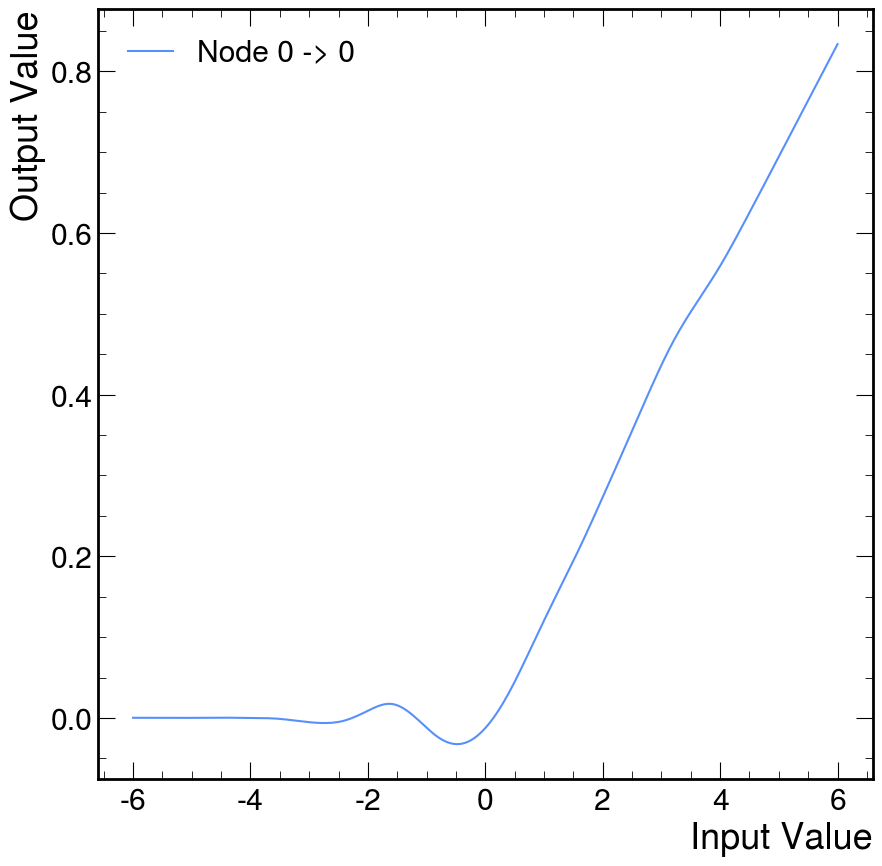

(256,)
(256, 16)


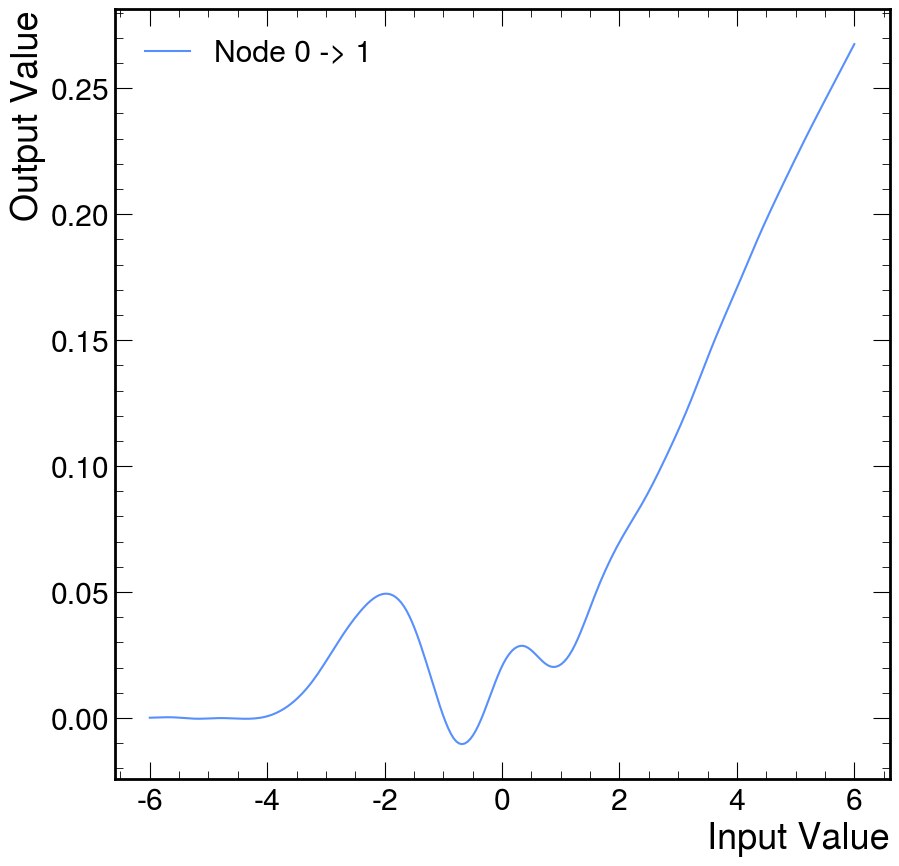

(256,)
(256, 16)


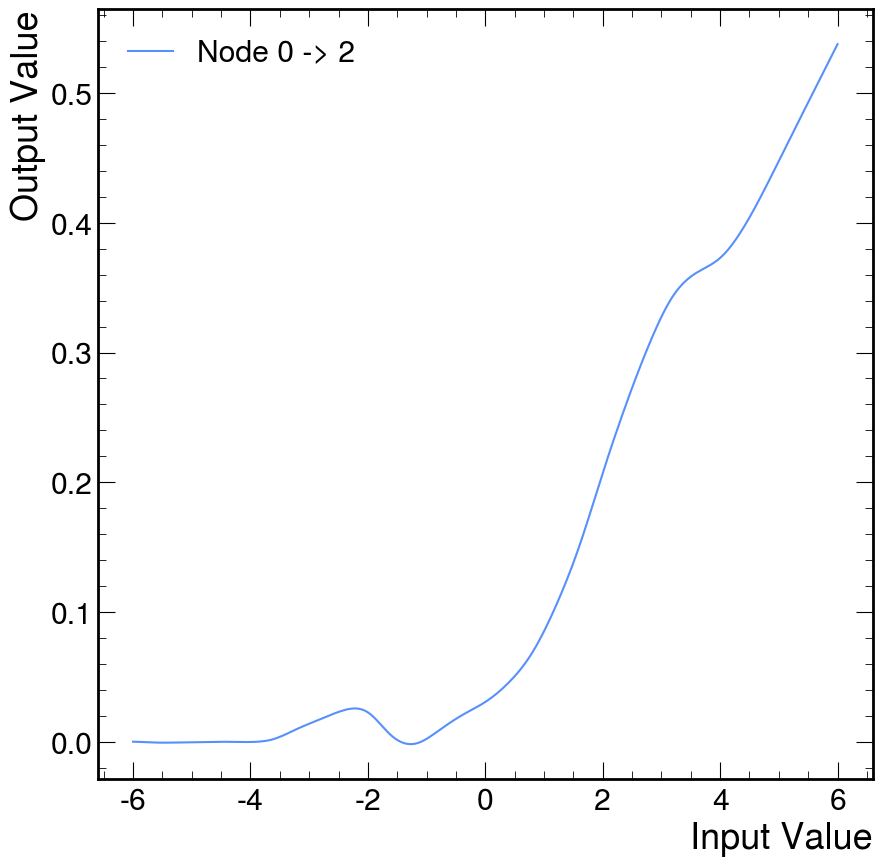

(256,)
(256, 16)


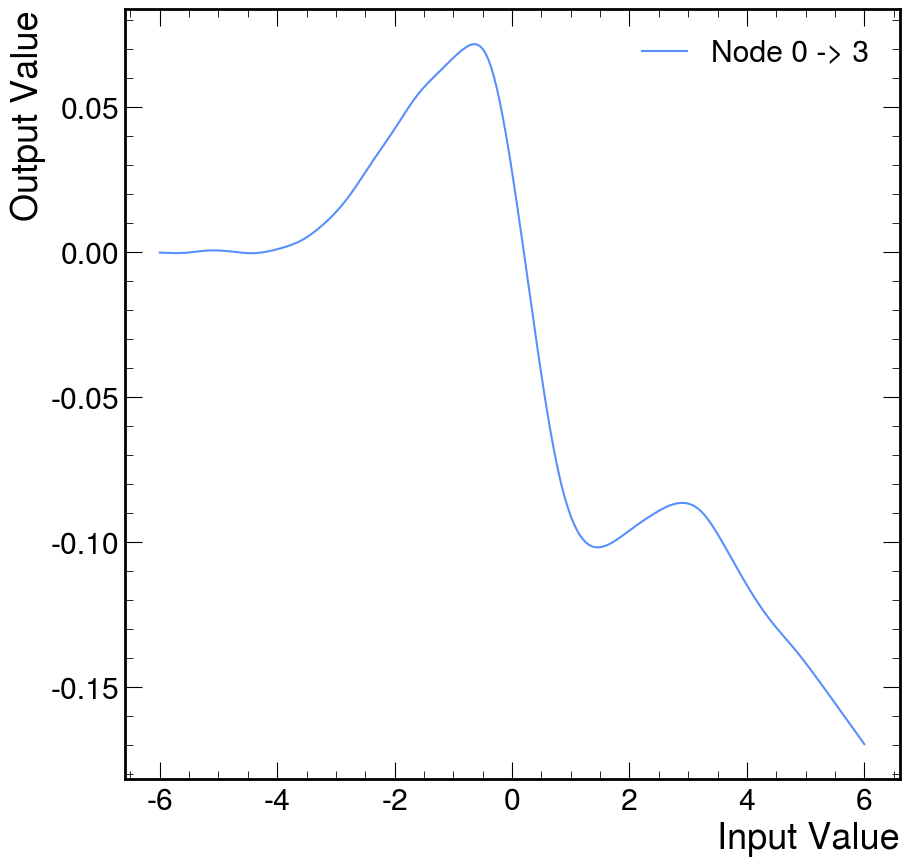

(256,)
(256, 16)


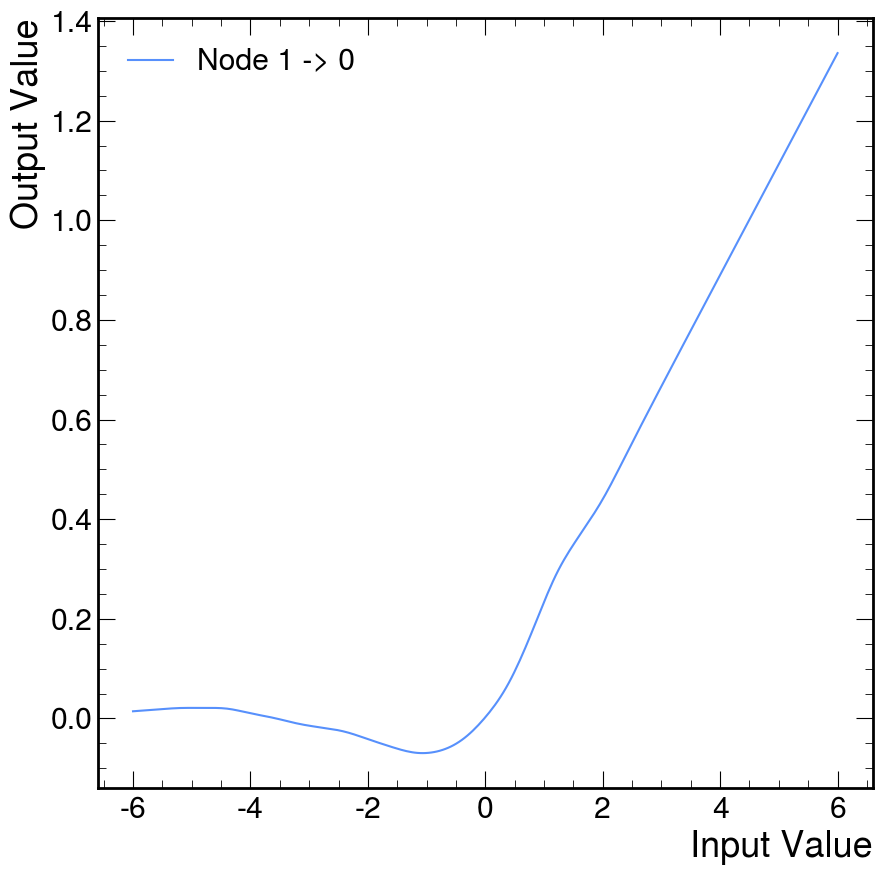

(256,)
(256, 16)


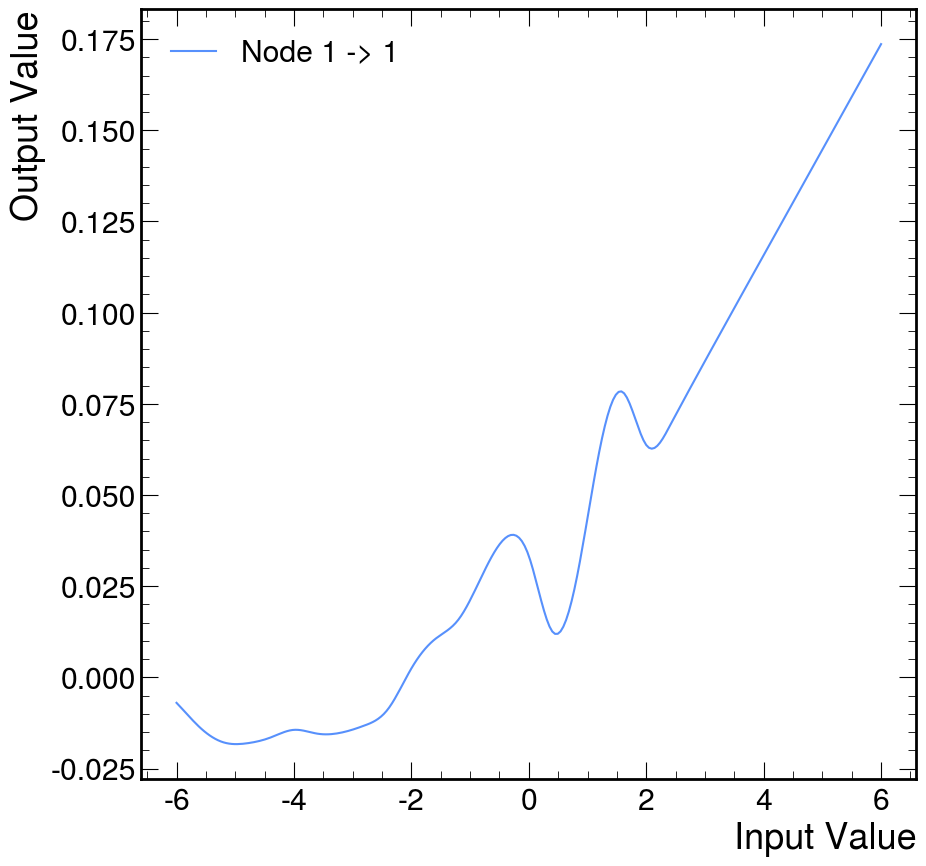

(256,)
(256, 16)


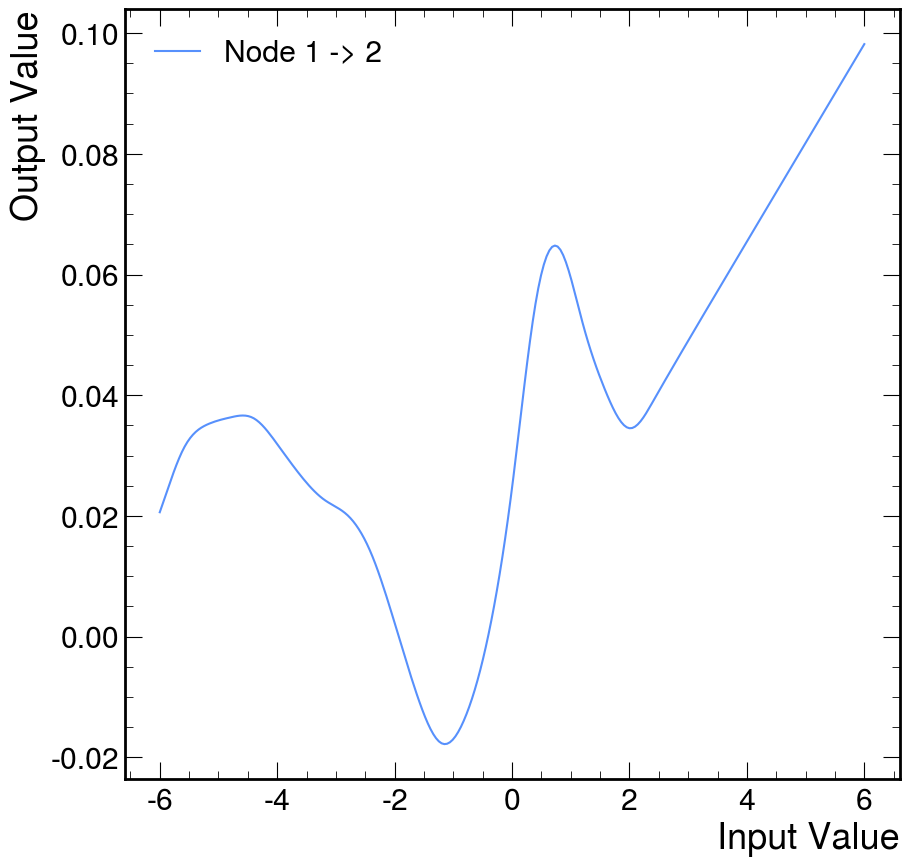

(256,)
(256, 16)


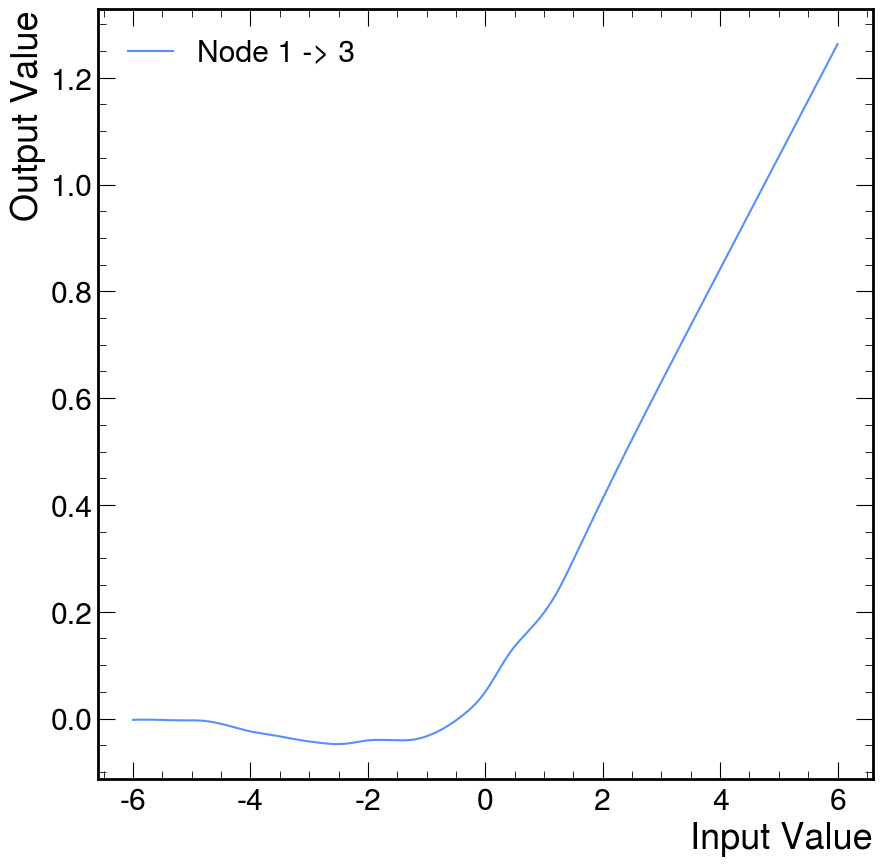

(256,)
(256, 16)


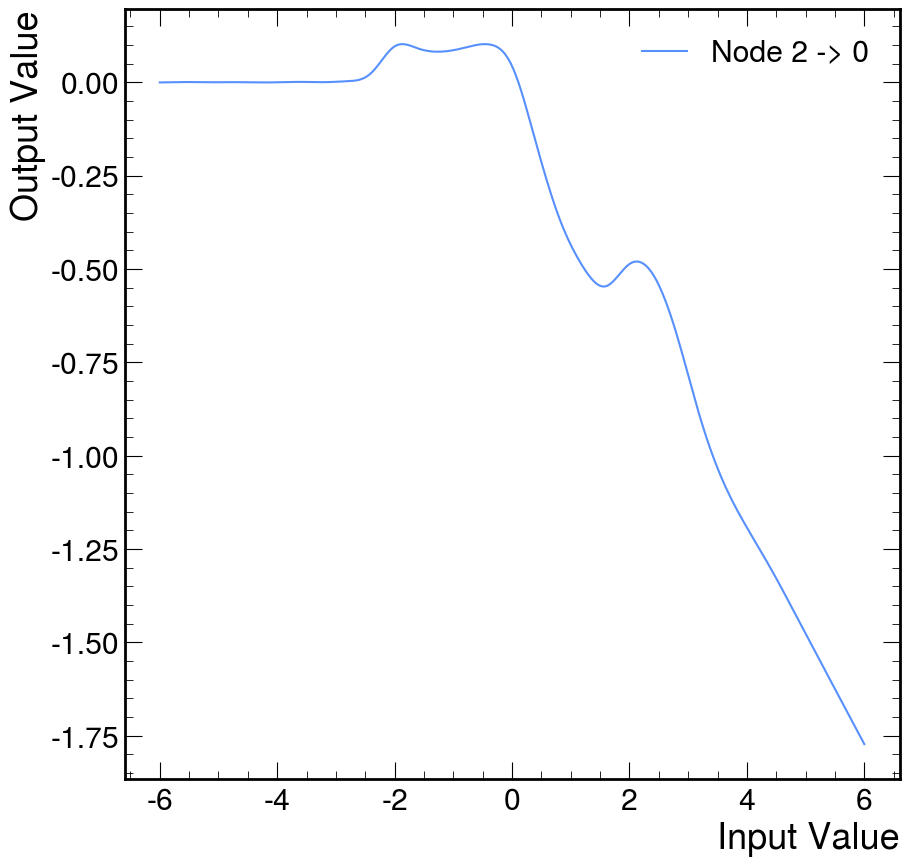

(256,)
(256, 16)


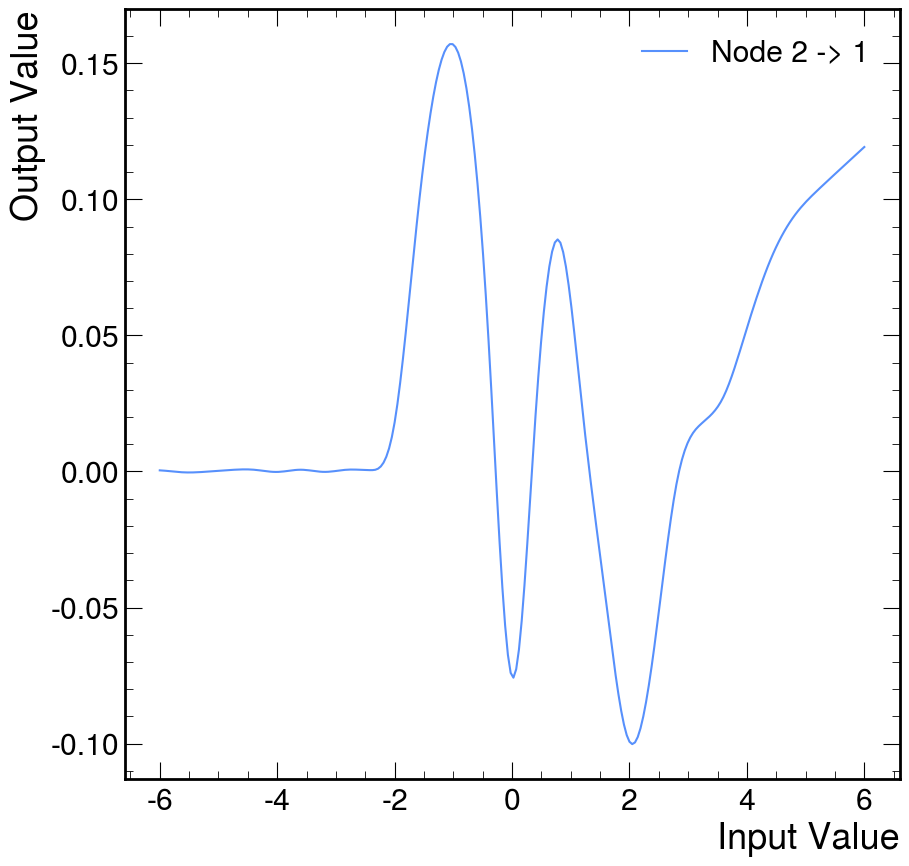

(256,)
(256, 16)


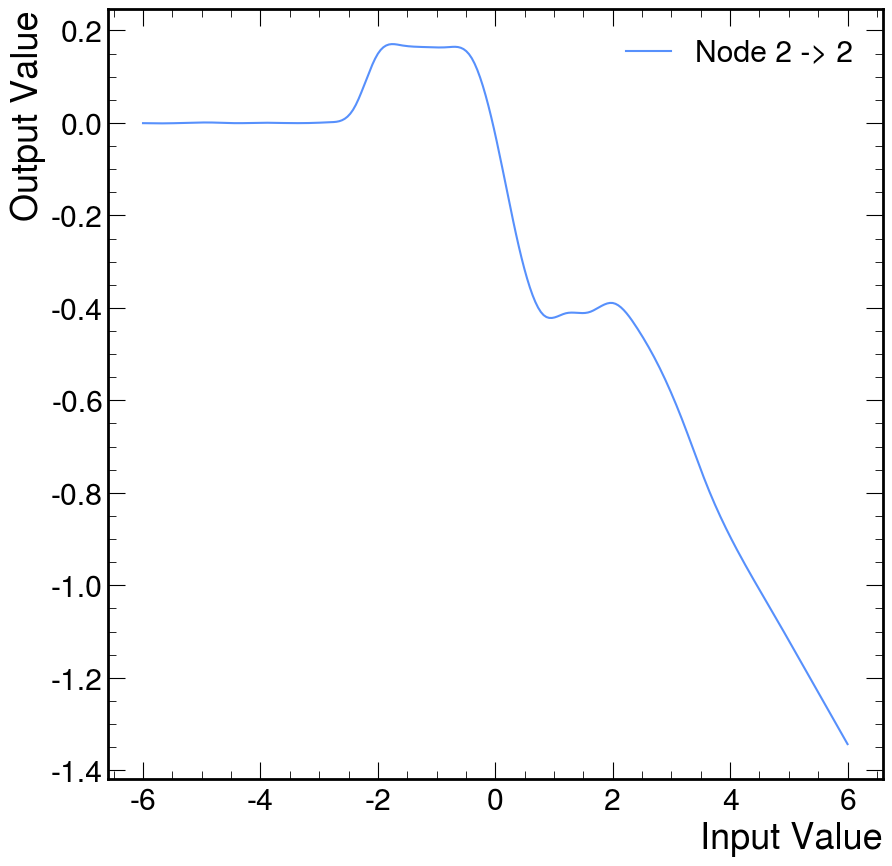

(256,)
(256, 16)


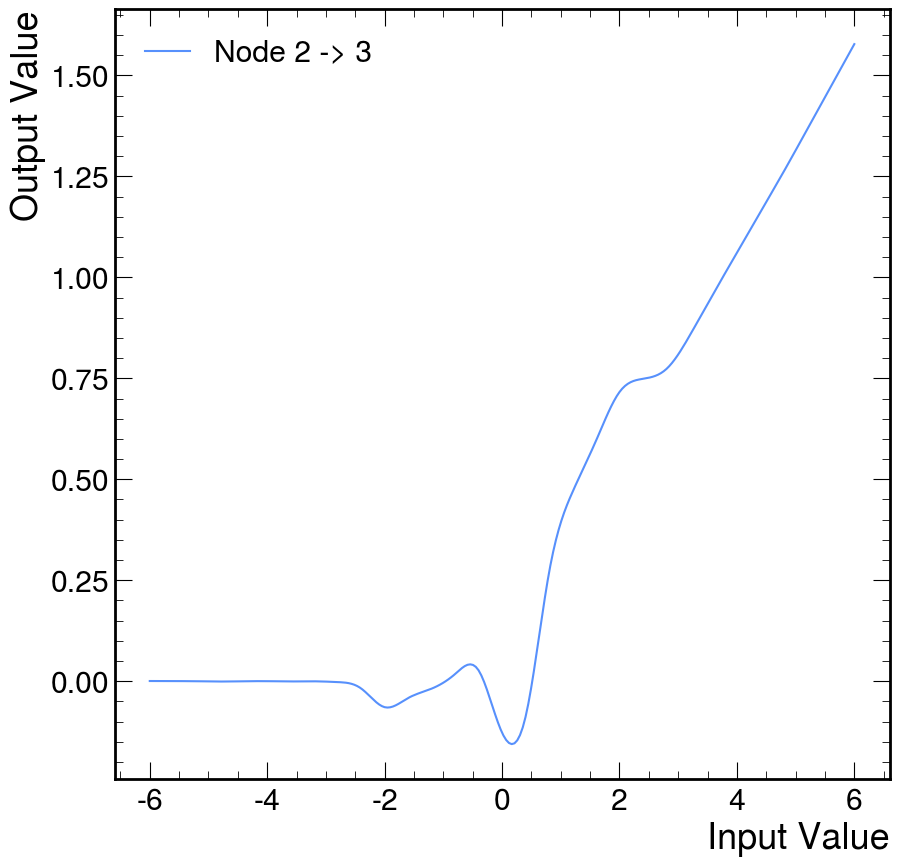

(256,)
(256, 16)


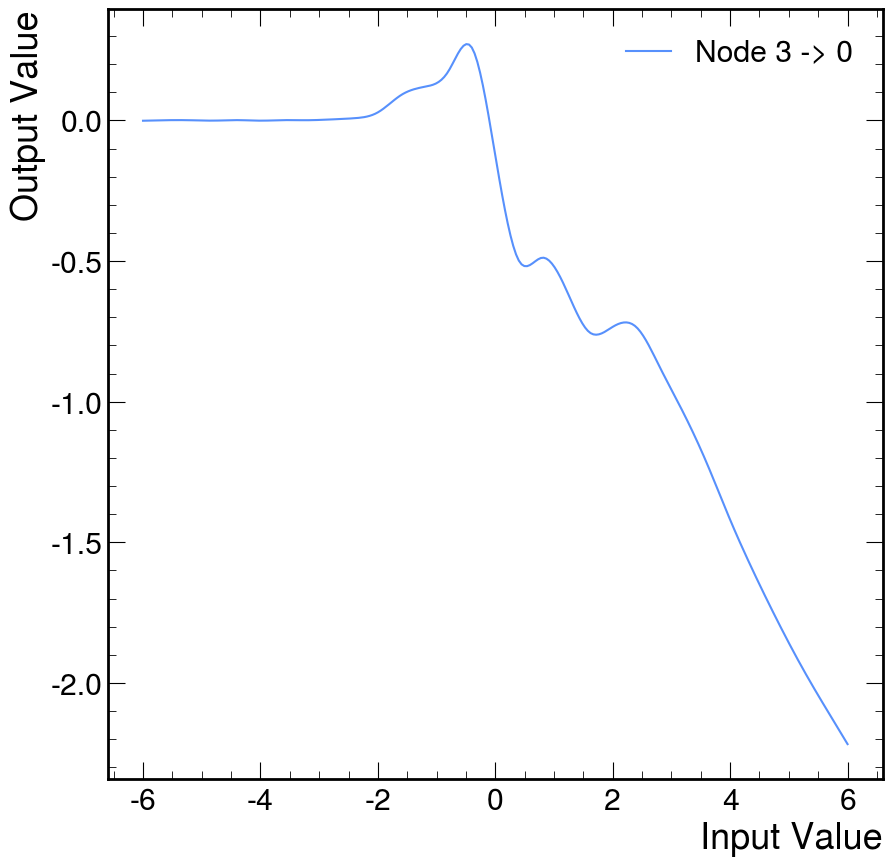

(256,)
(256, 16)


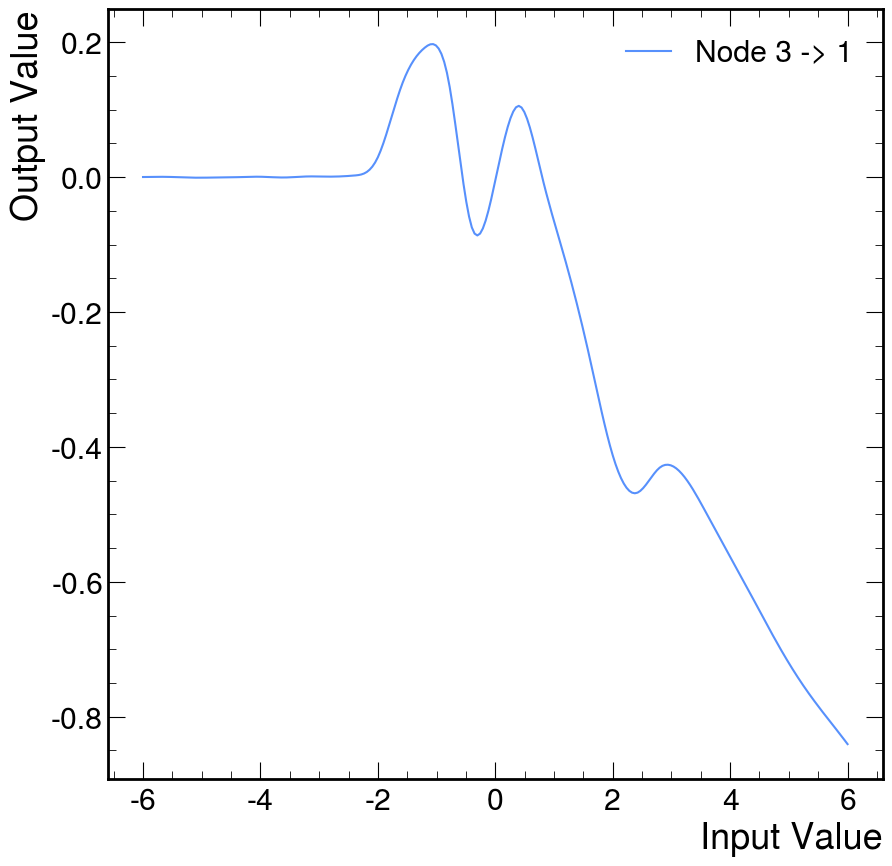

(256,)
(256, 16)


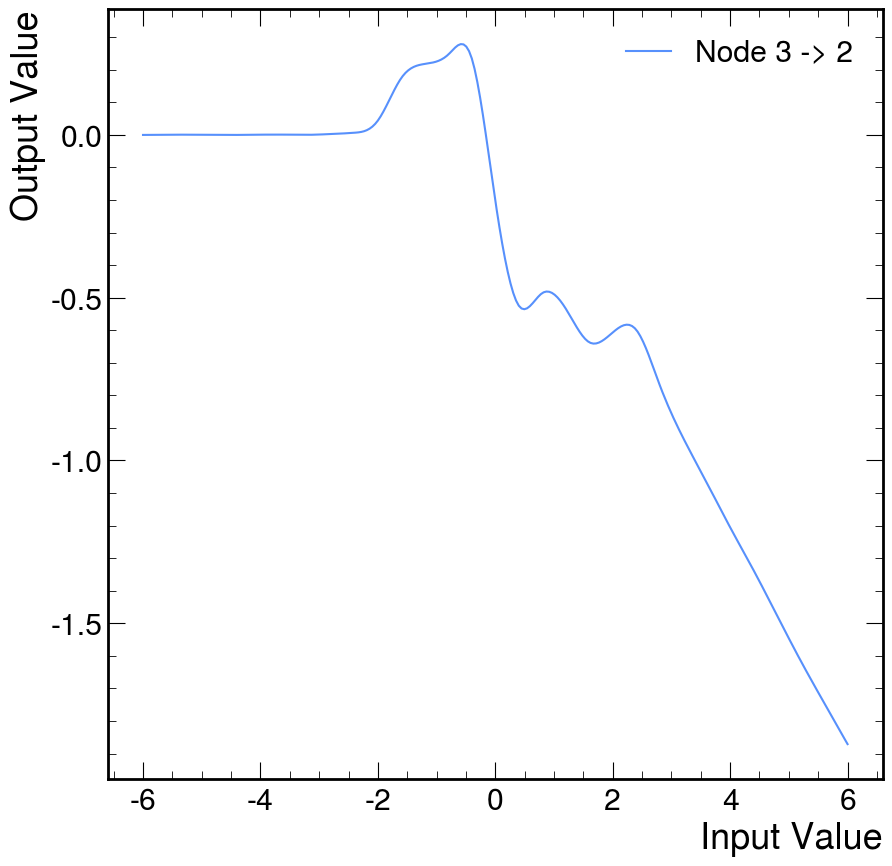

(256,)
(256, 16)


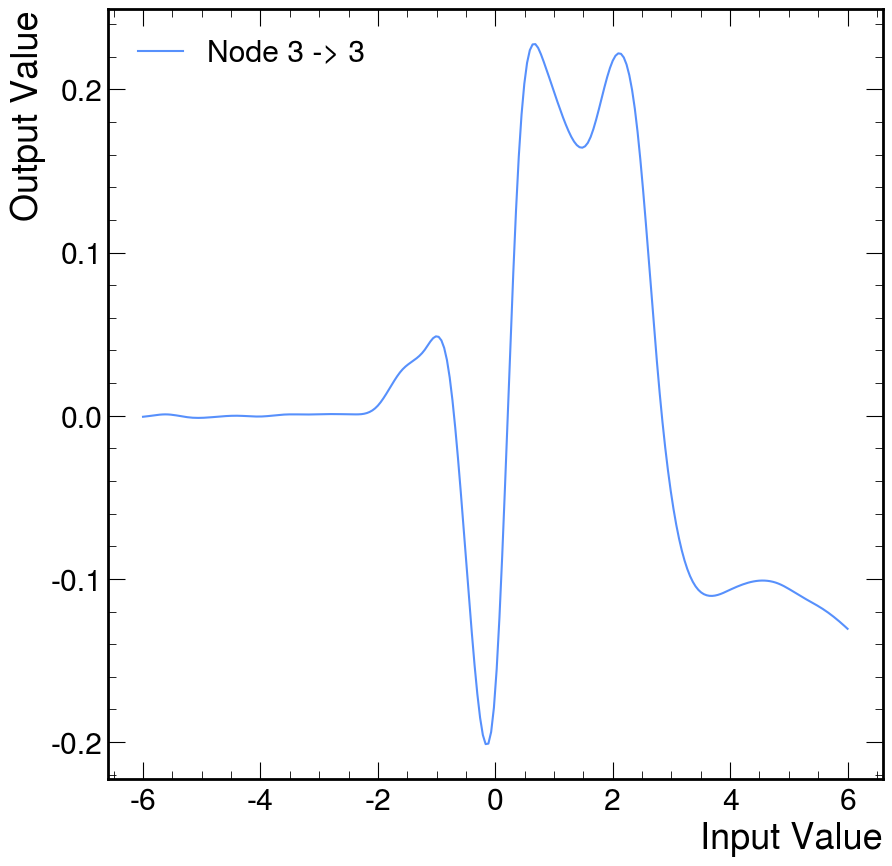

(256,)
(256, 16)


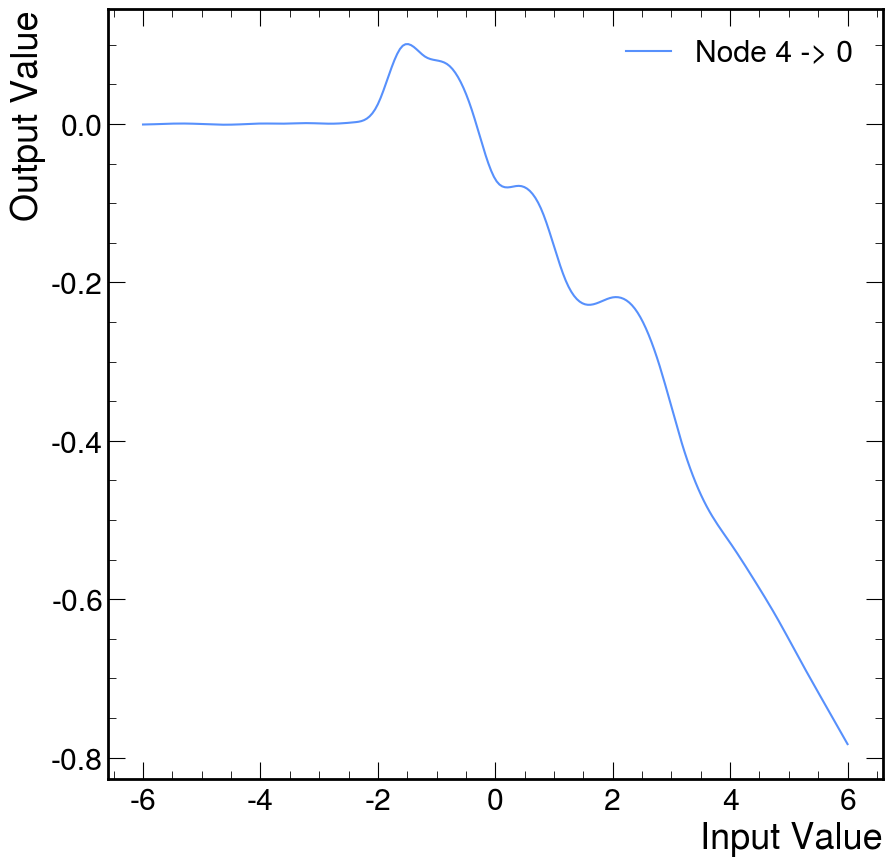

(256,)
(256, 16)


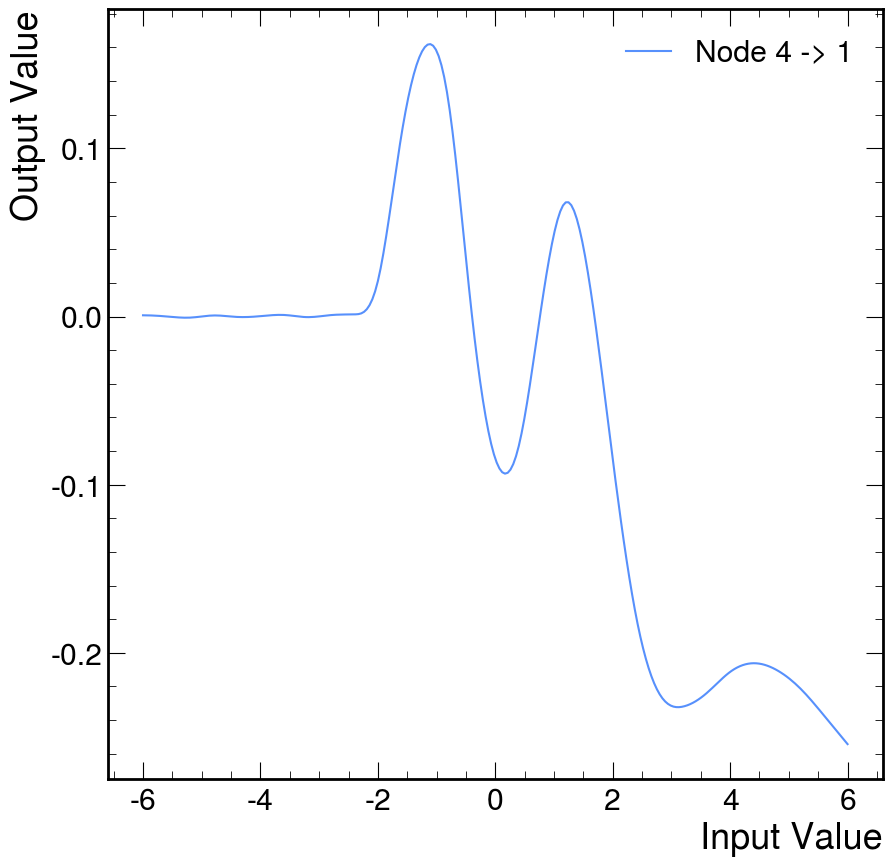

(256,)
(256, 16)


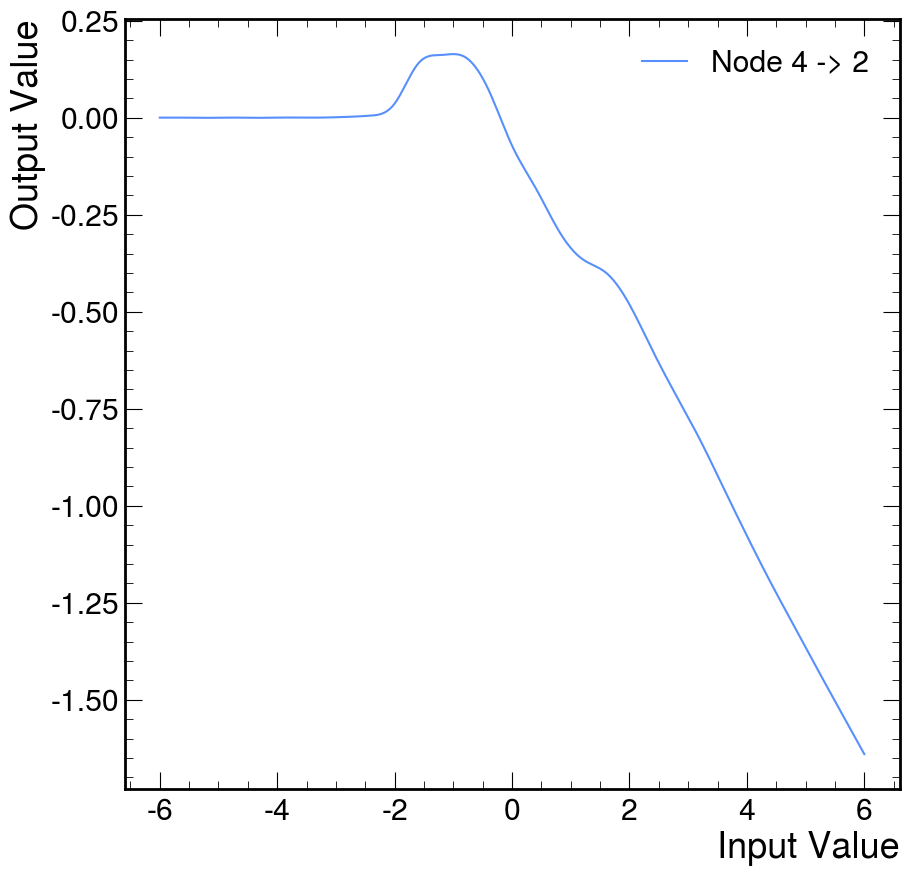

(256,)
(256, 16)


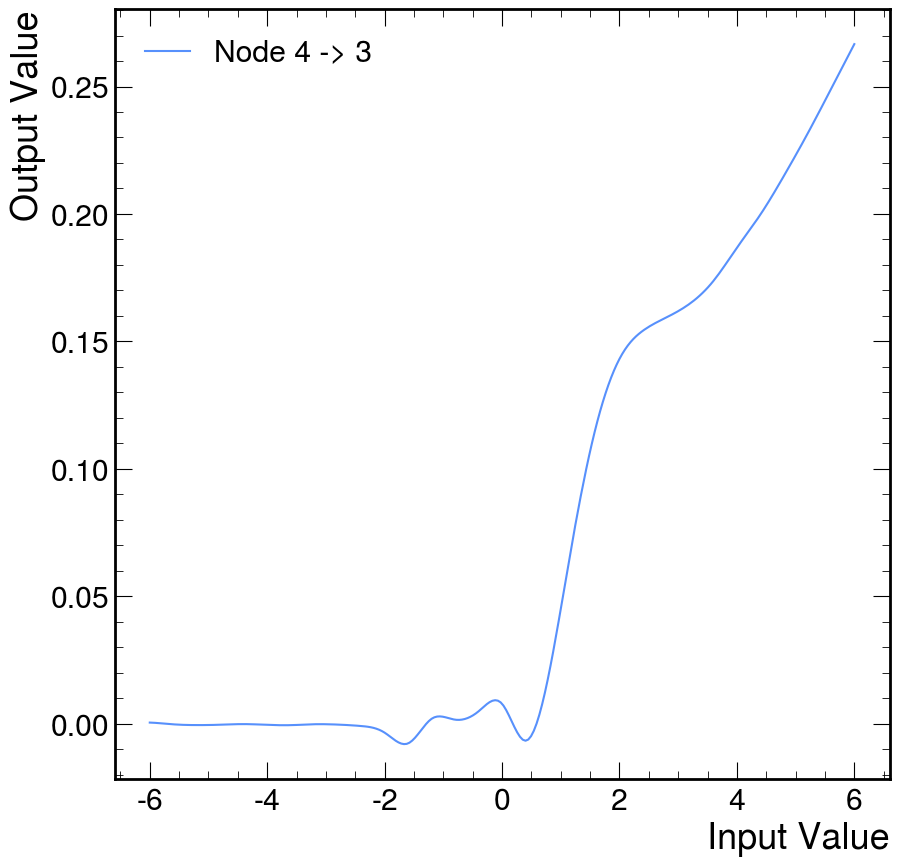

(256,)
(256, 16)


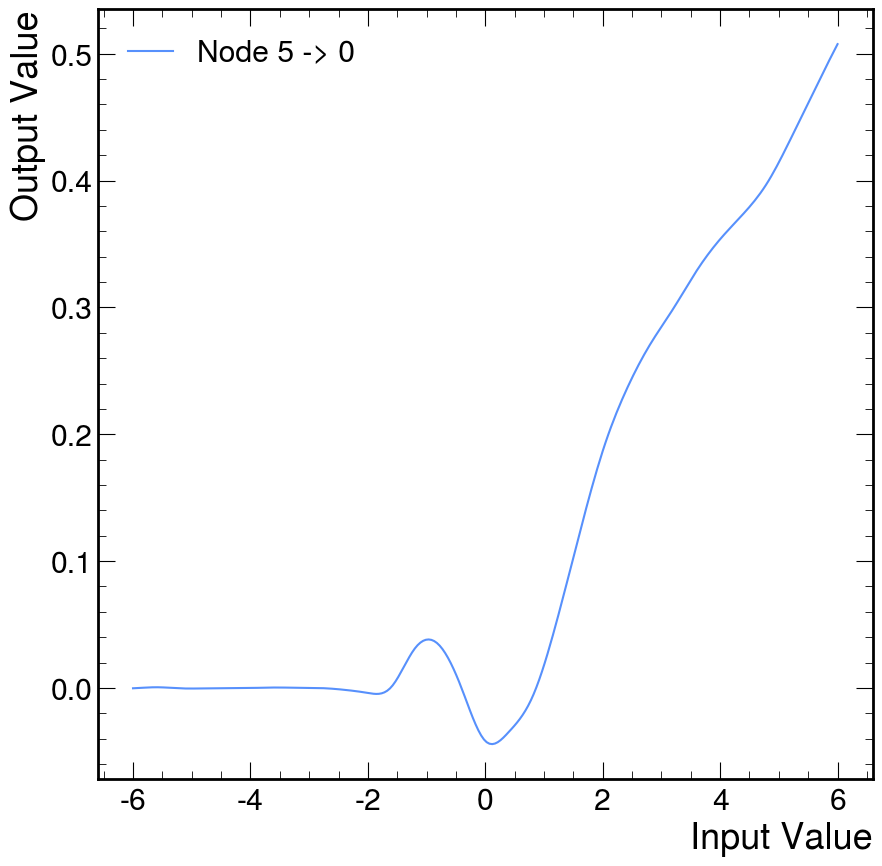

(256,)
(256, 16)


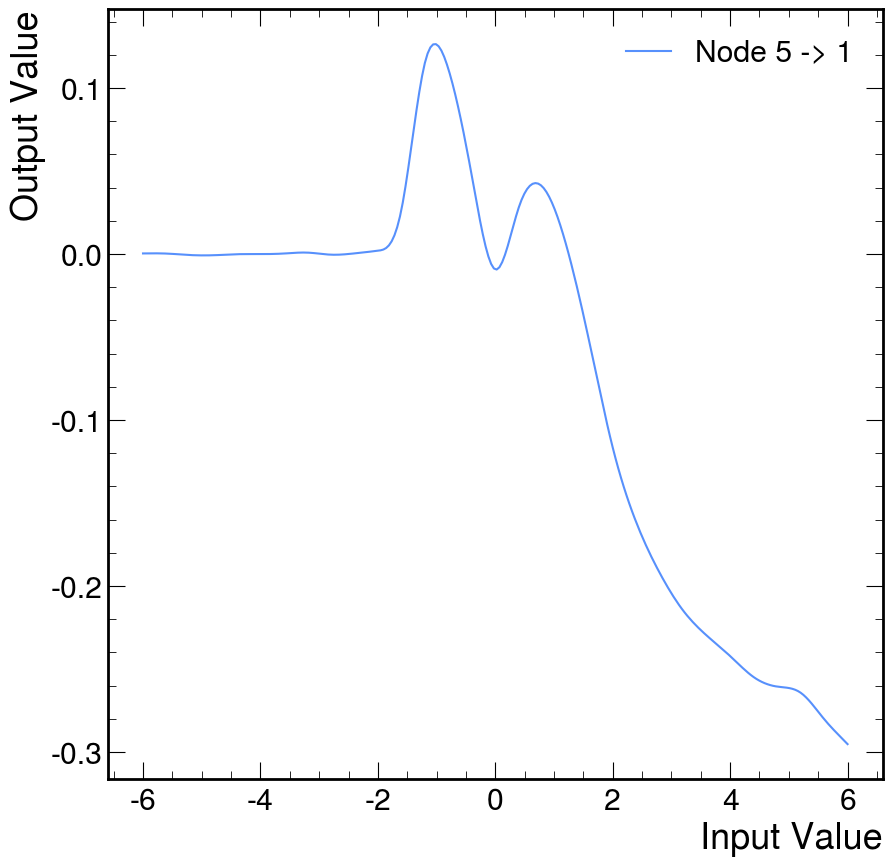

(256,)
(256, 16)


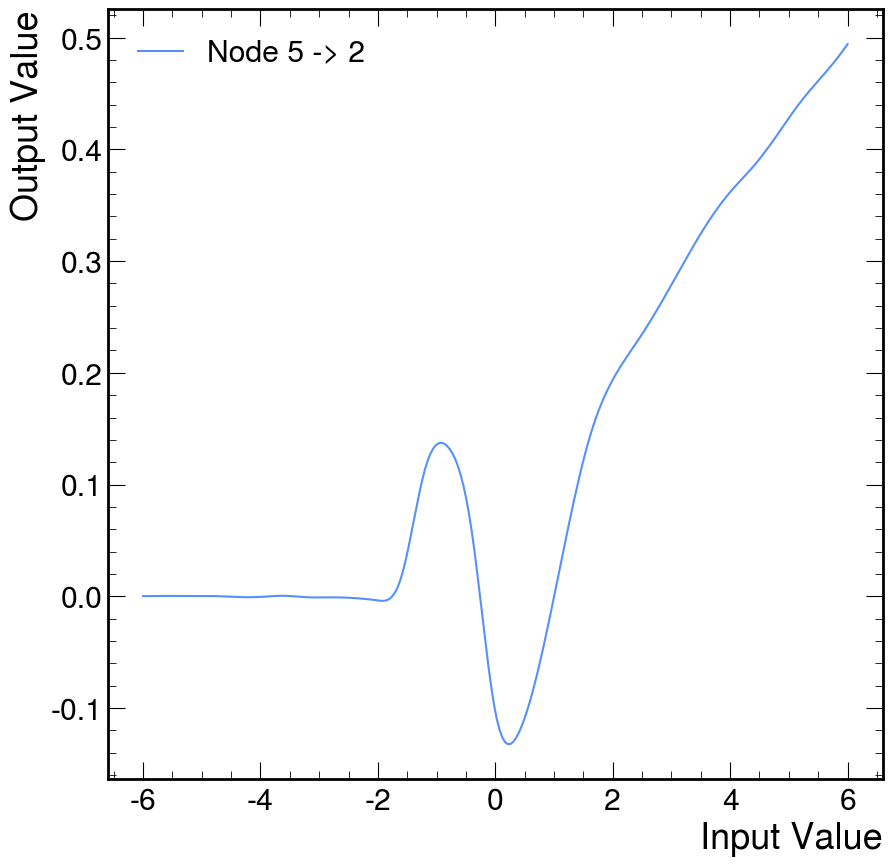

(256,)
(256, 16)


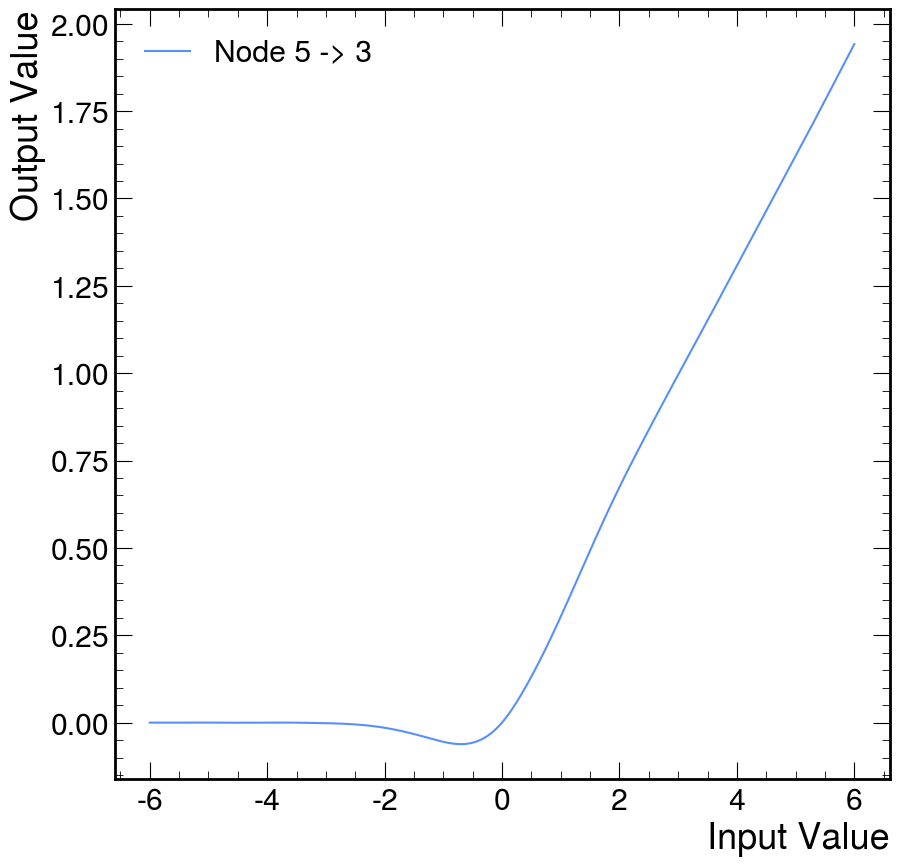

(256,)
(256, 16)


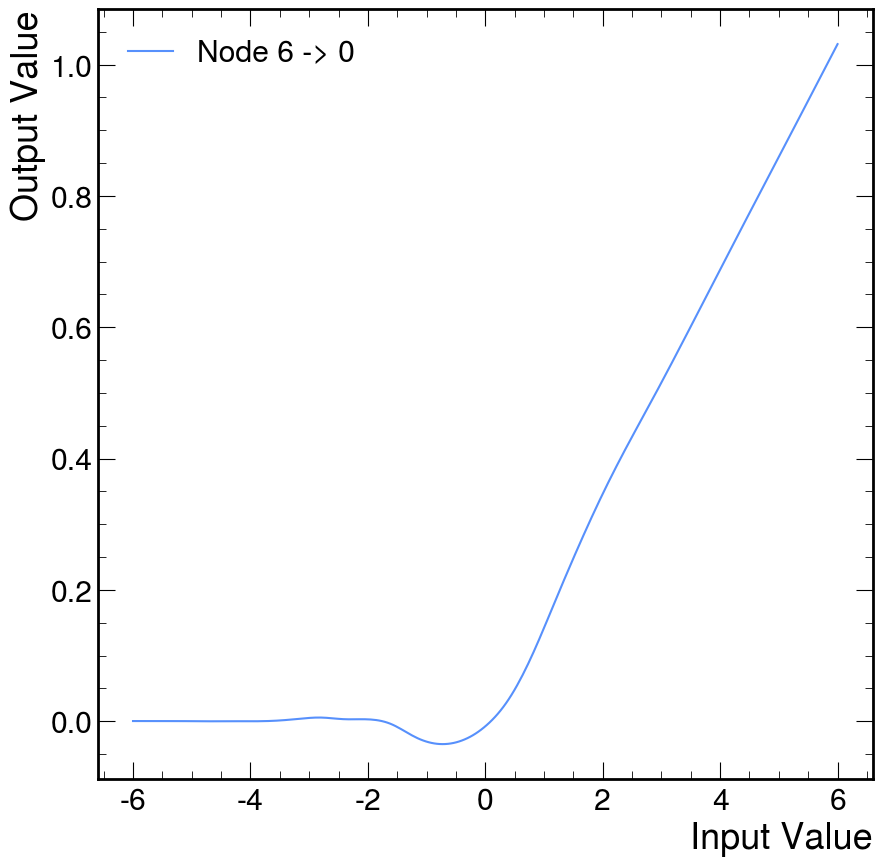

(256,)
(256, 16)


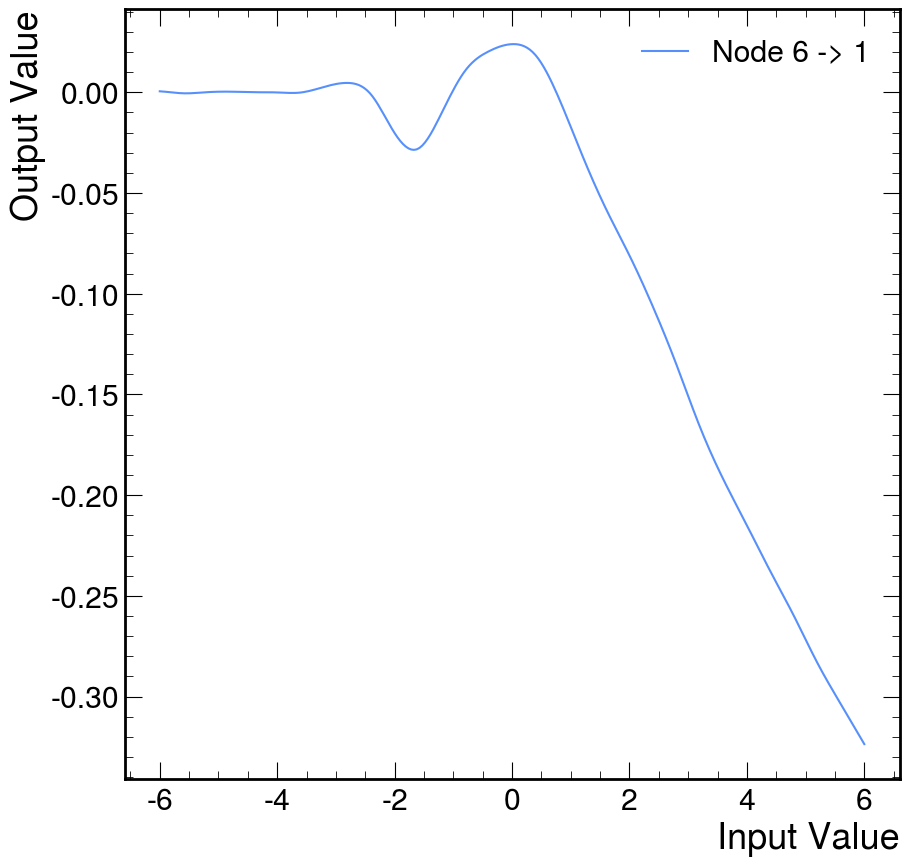

(256,)
(256, 16)


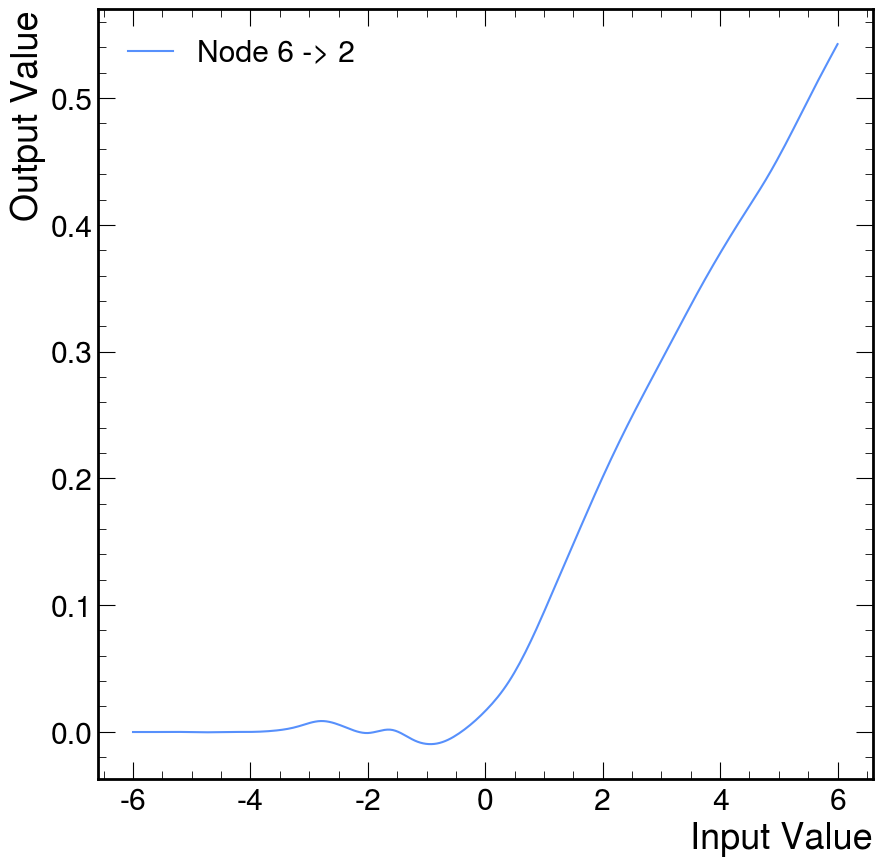

(256,)
(256, 16)


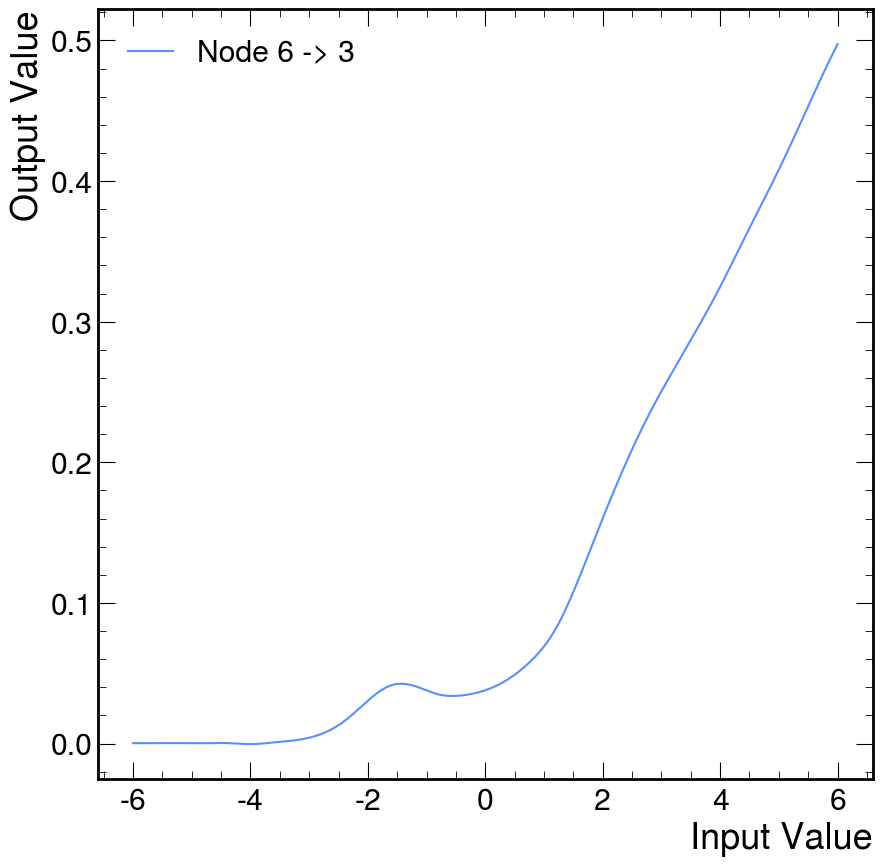

(256,)
(256, 16)


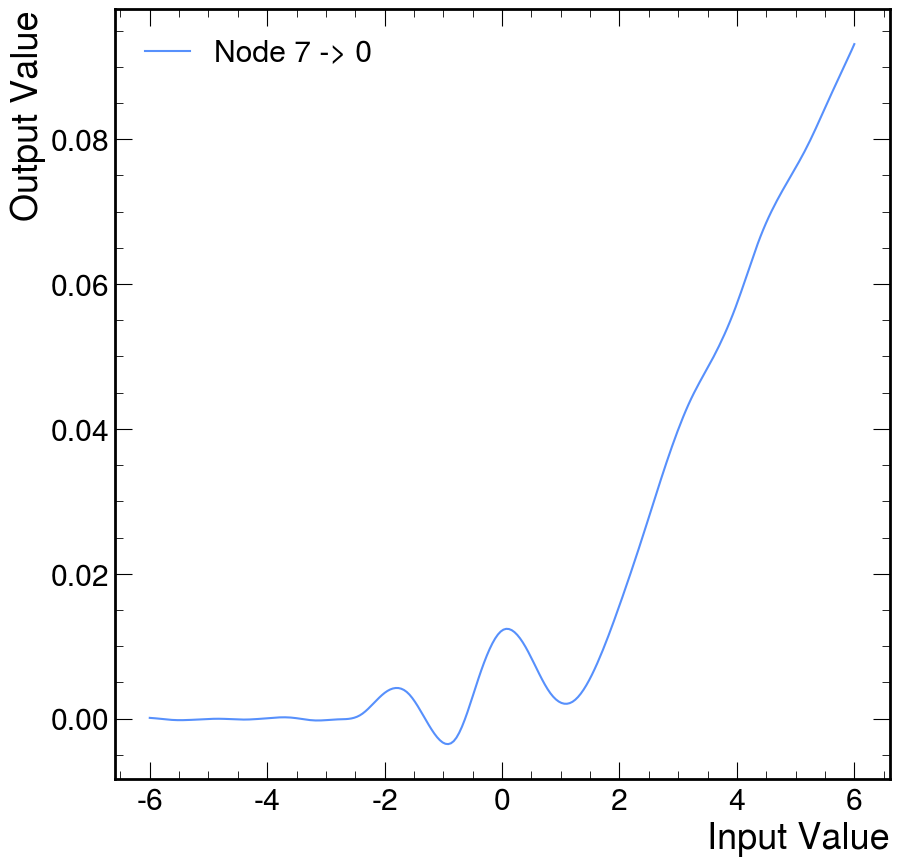

(256,)
(256, 16)


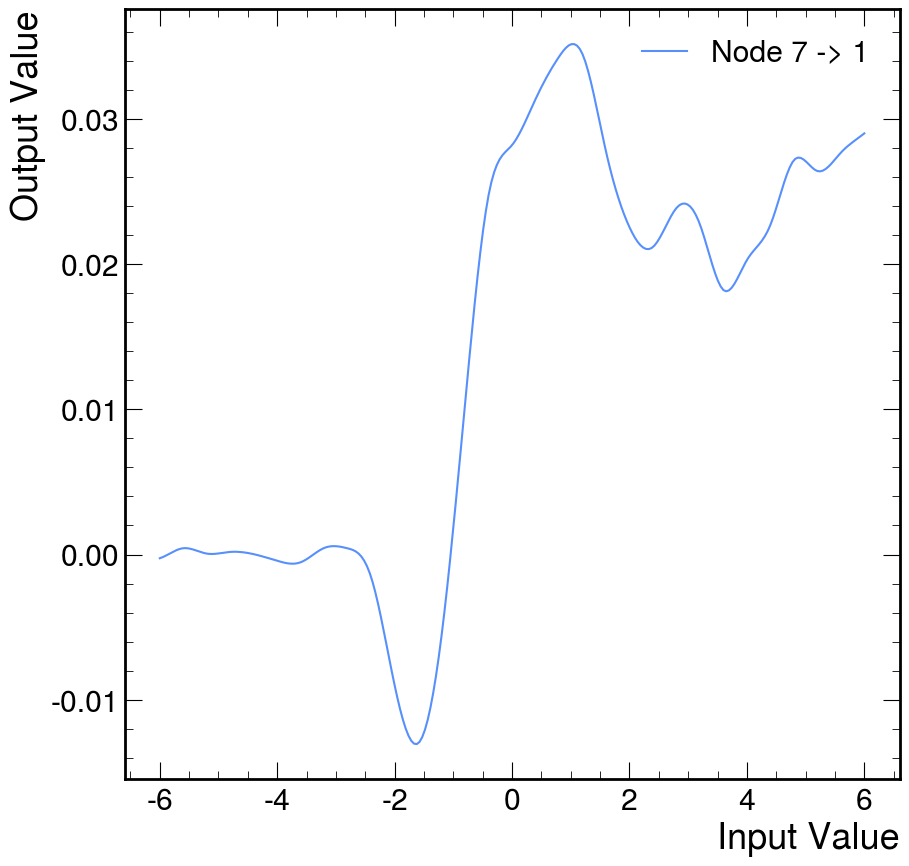

(256,)
(256, 16)


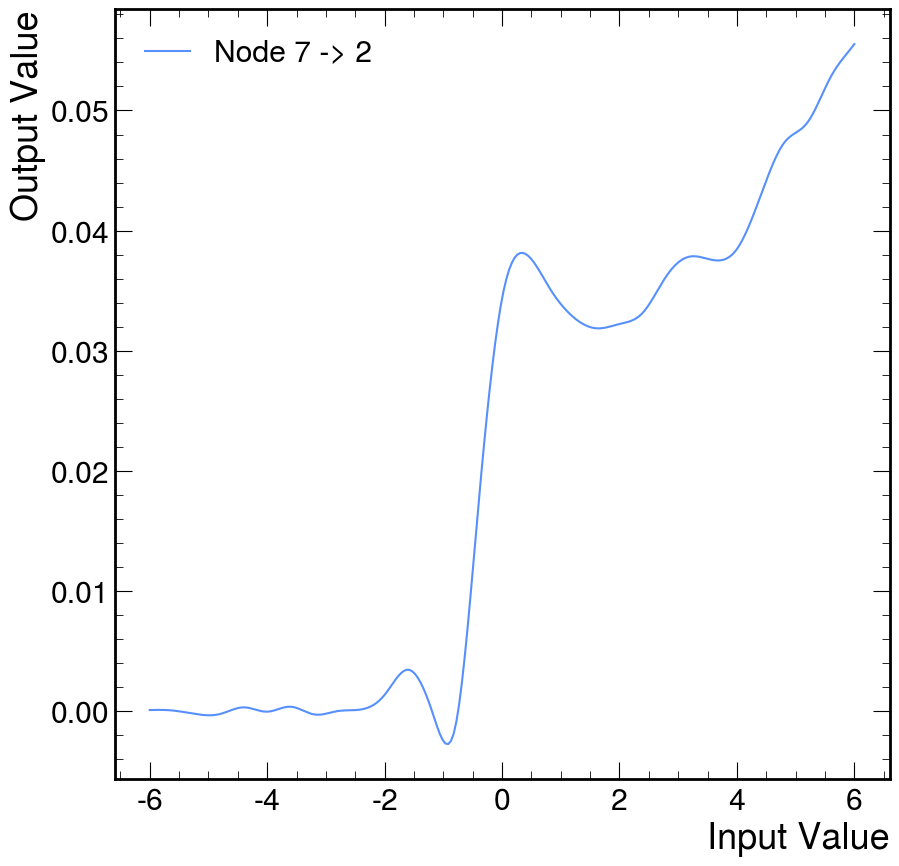

(256,)
(256, 16)


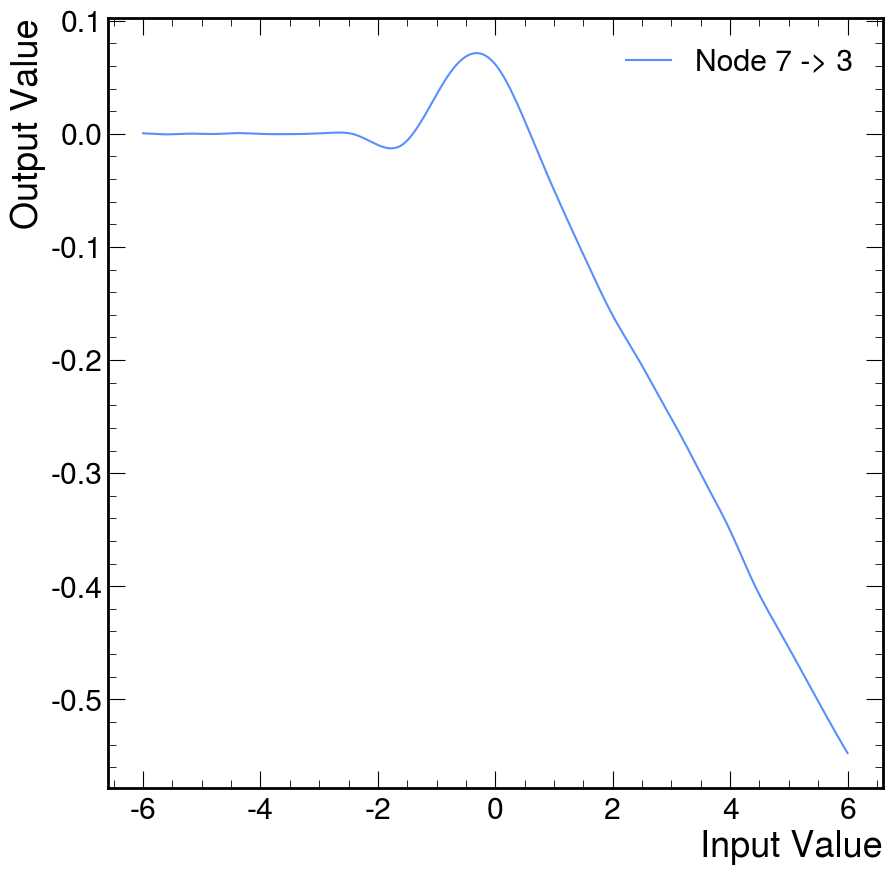

(256,)
(256, 16)


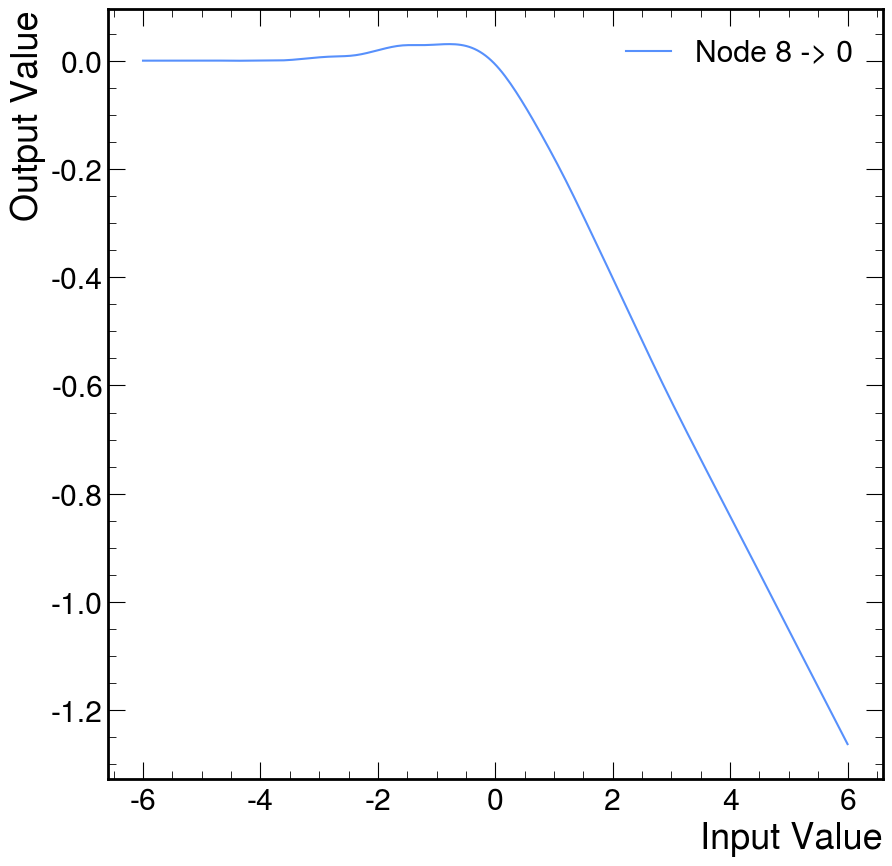

(256,)
(256, 16)


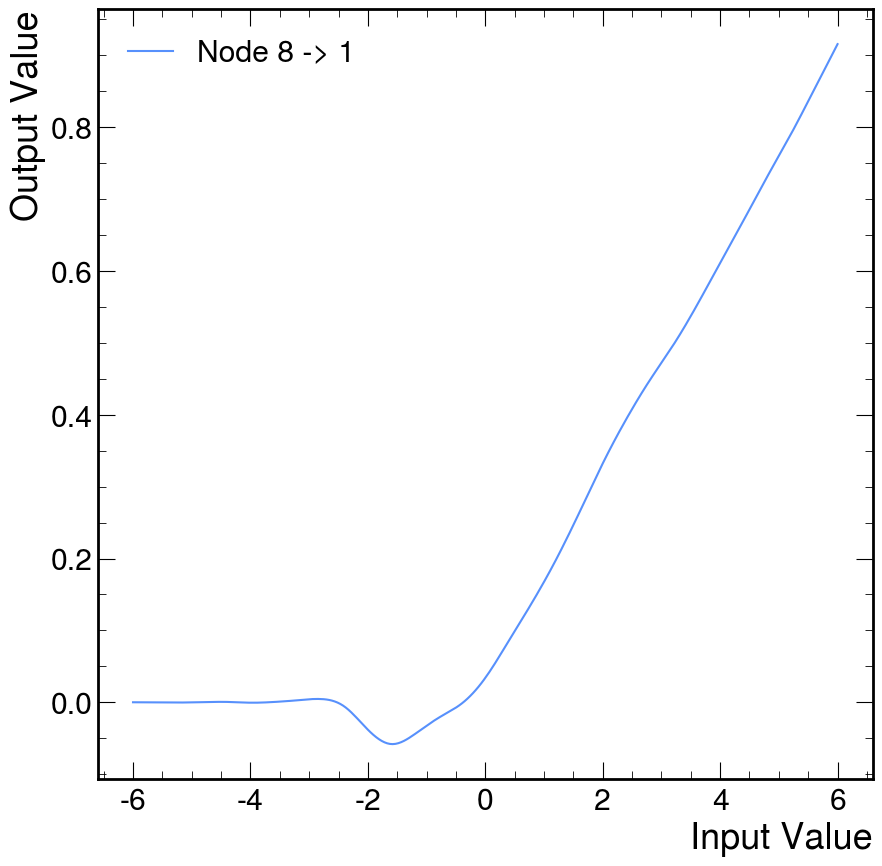

(256,)
(256, 16)


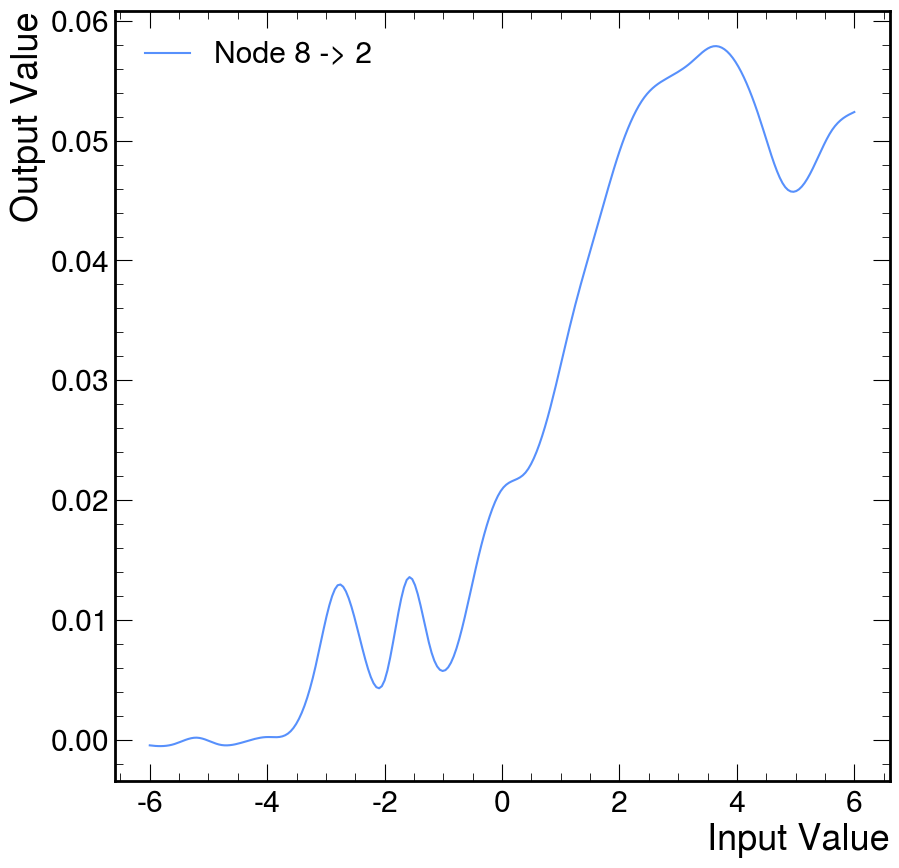

(256,)
(256, 16)


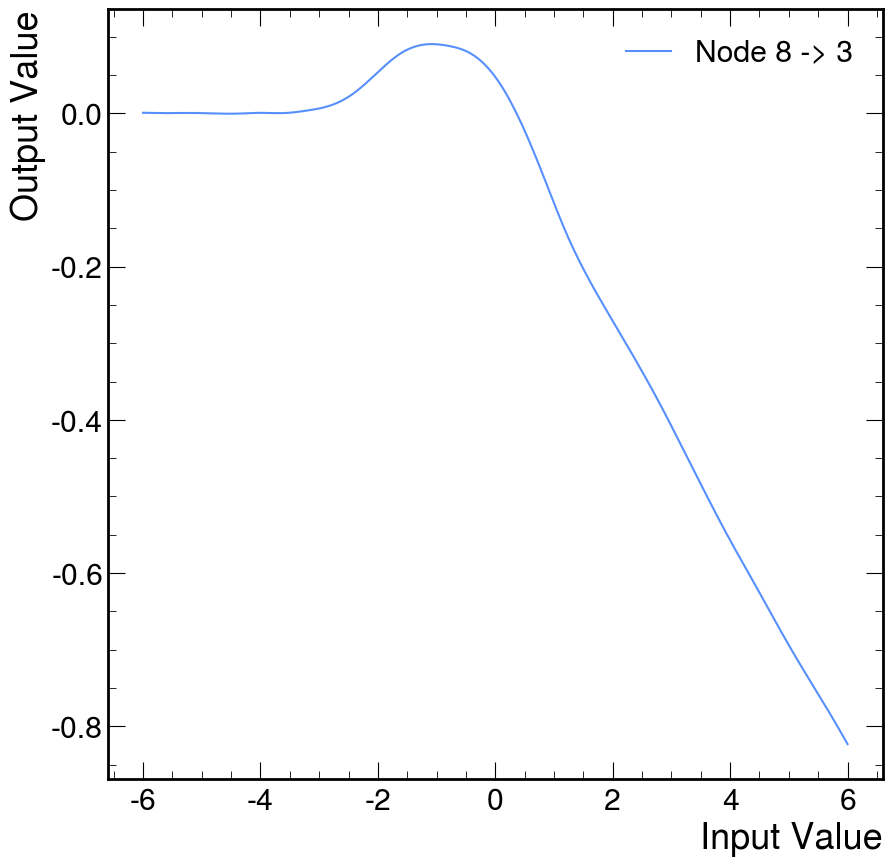

(256,)
(256, 16)


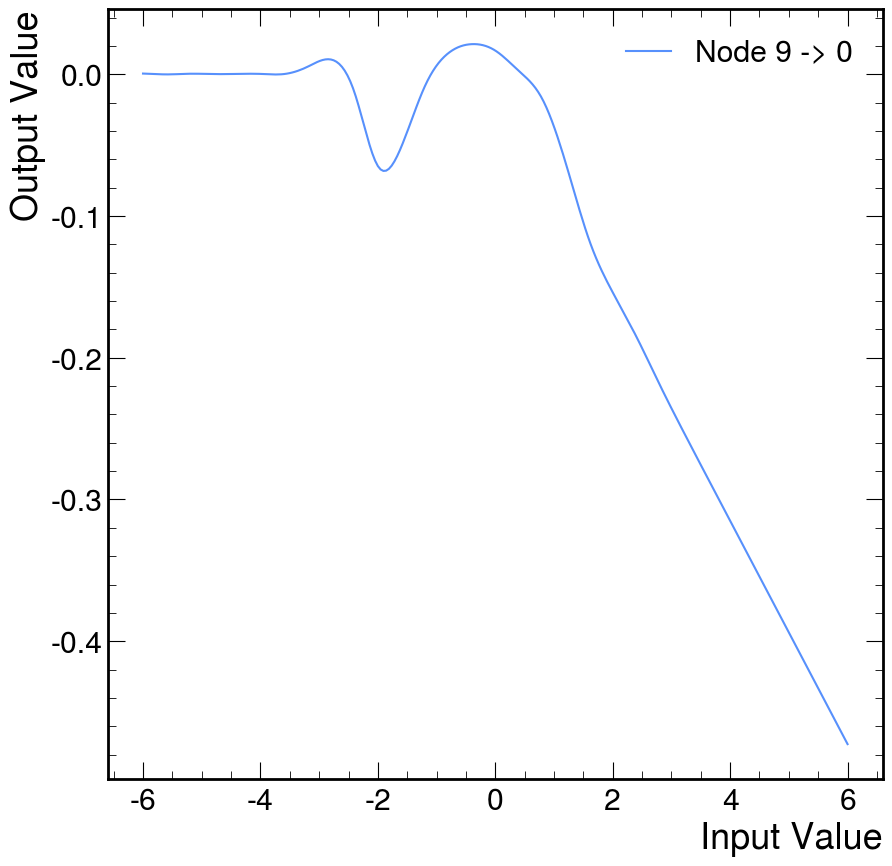

(256,)
(256, 16)


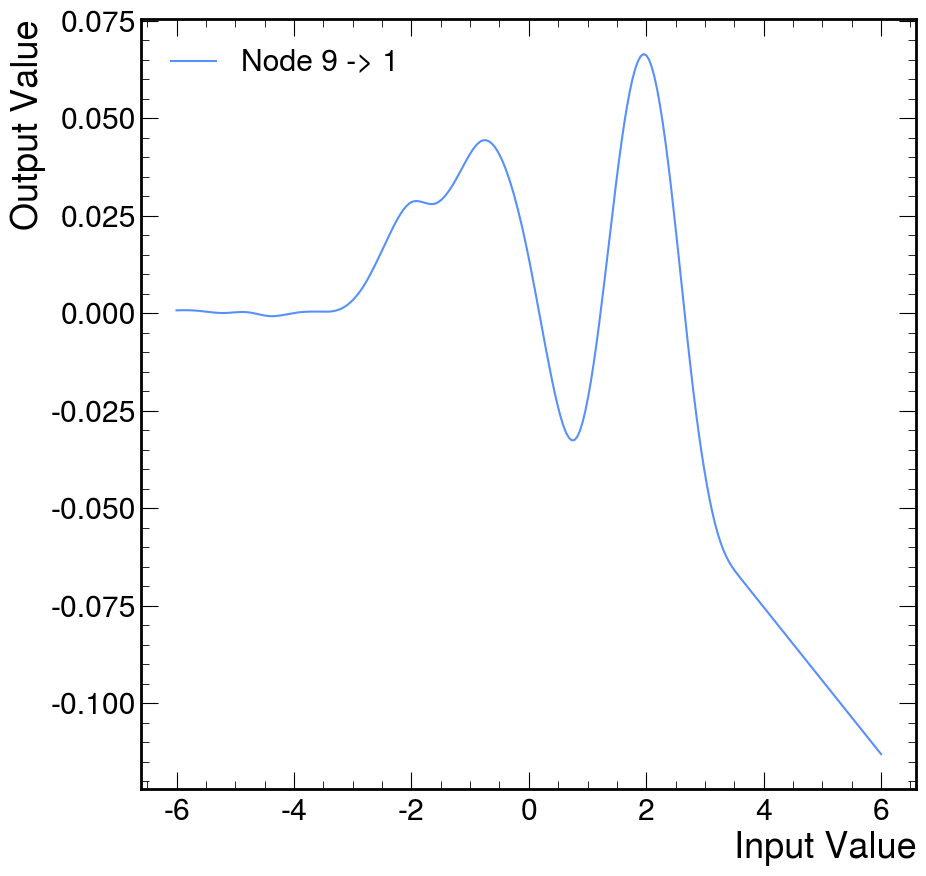

(256,)
(256, 16)


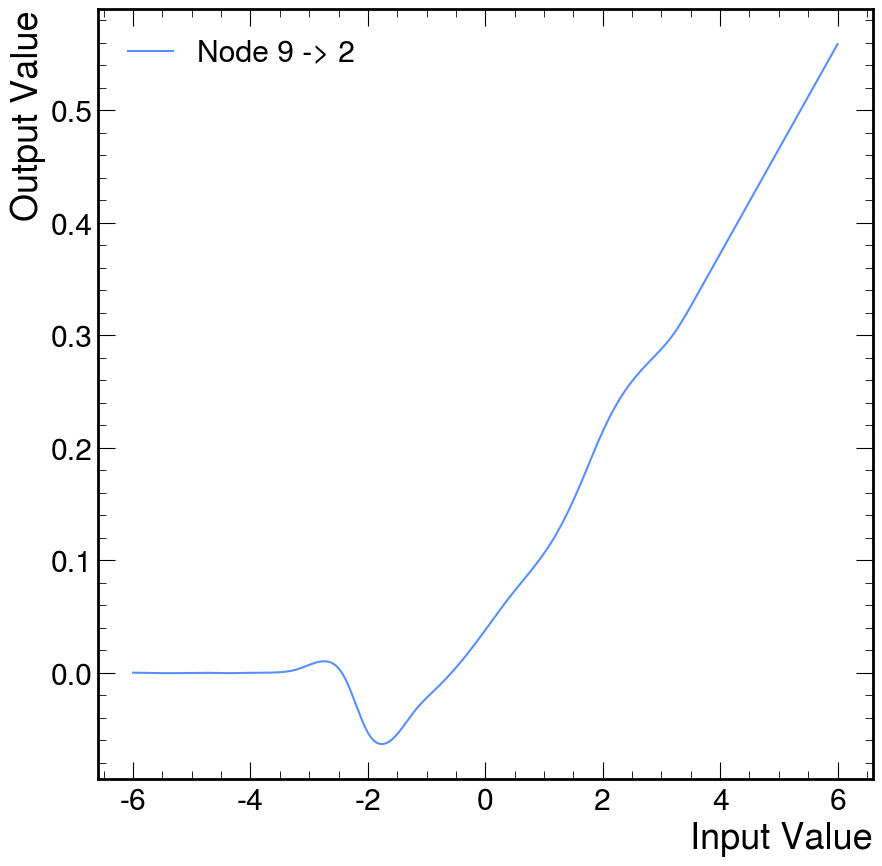

(256,)
(256, 16)


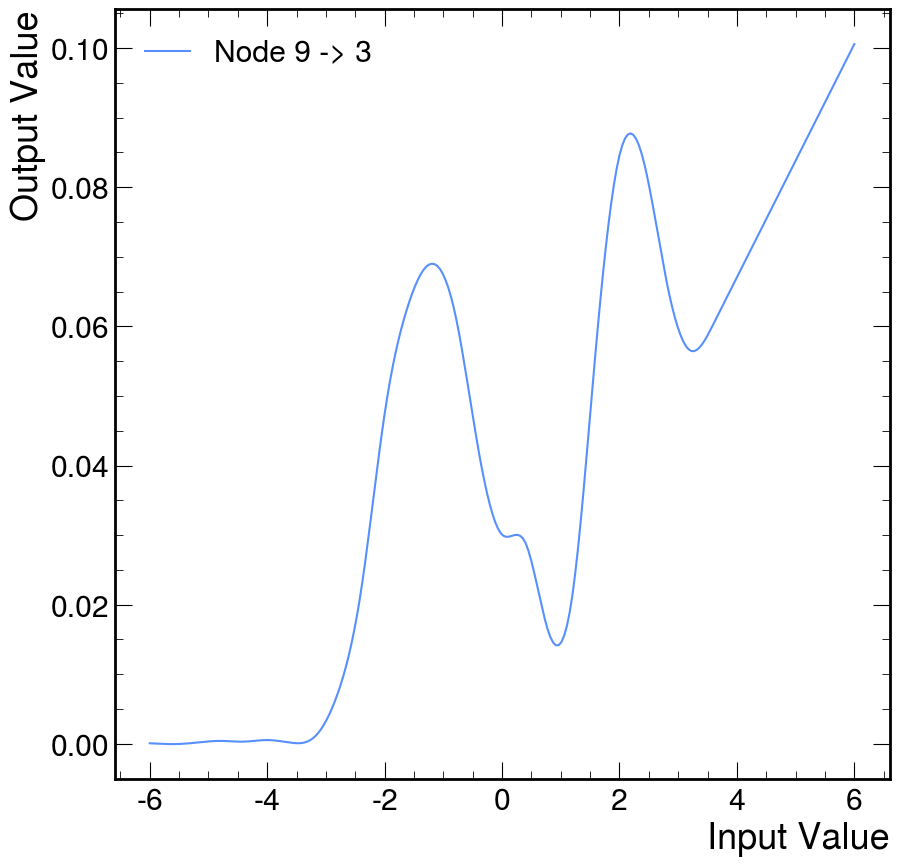

(256,)
(256, 16)


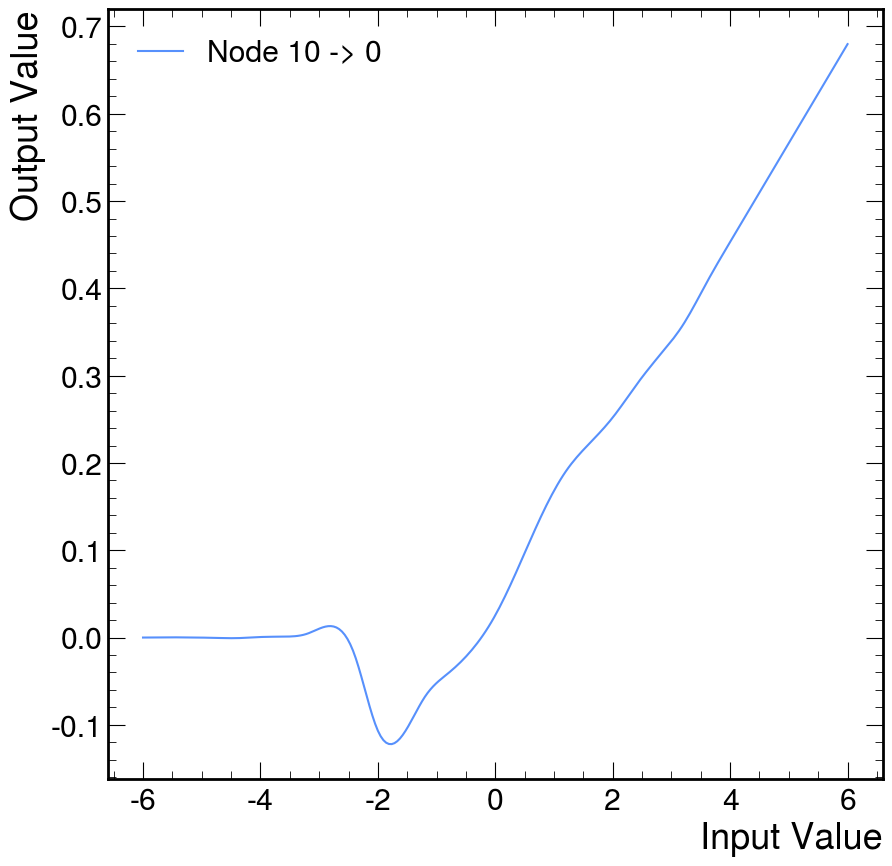

(256,)
(256, 16)


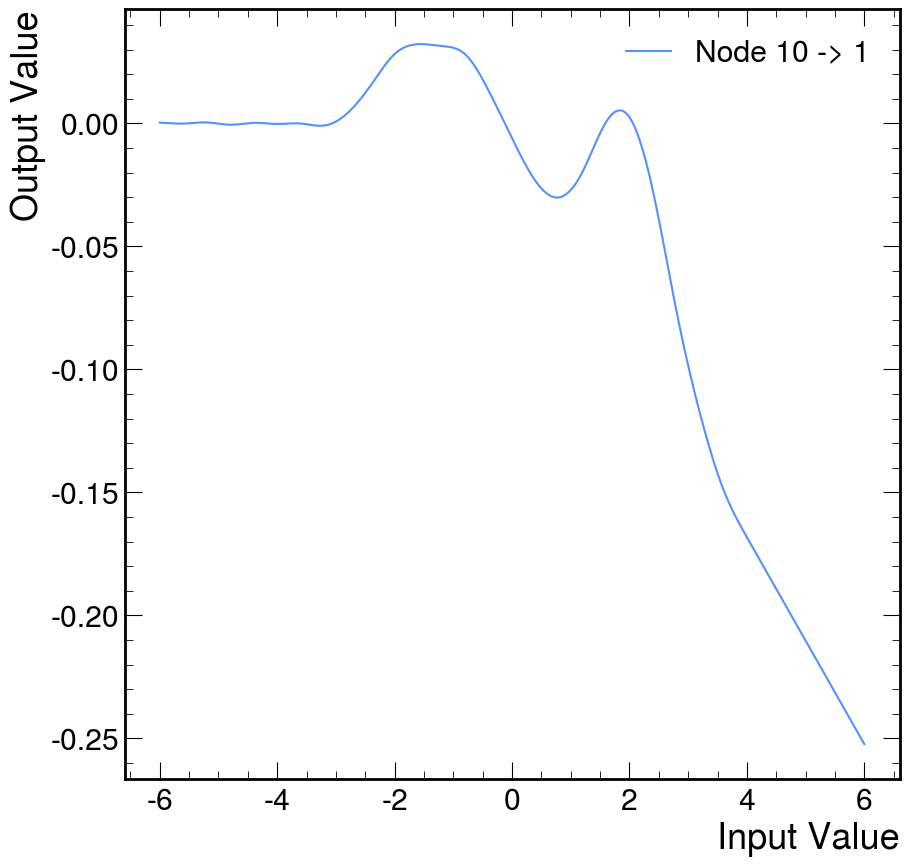

(256,)
(256, 16)


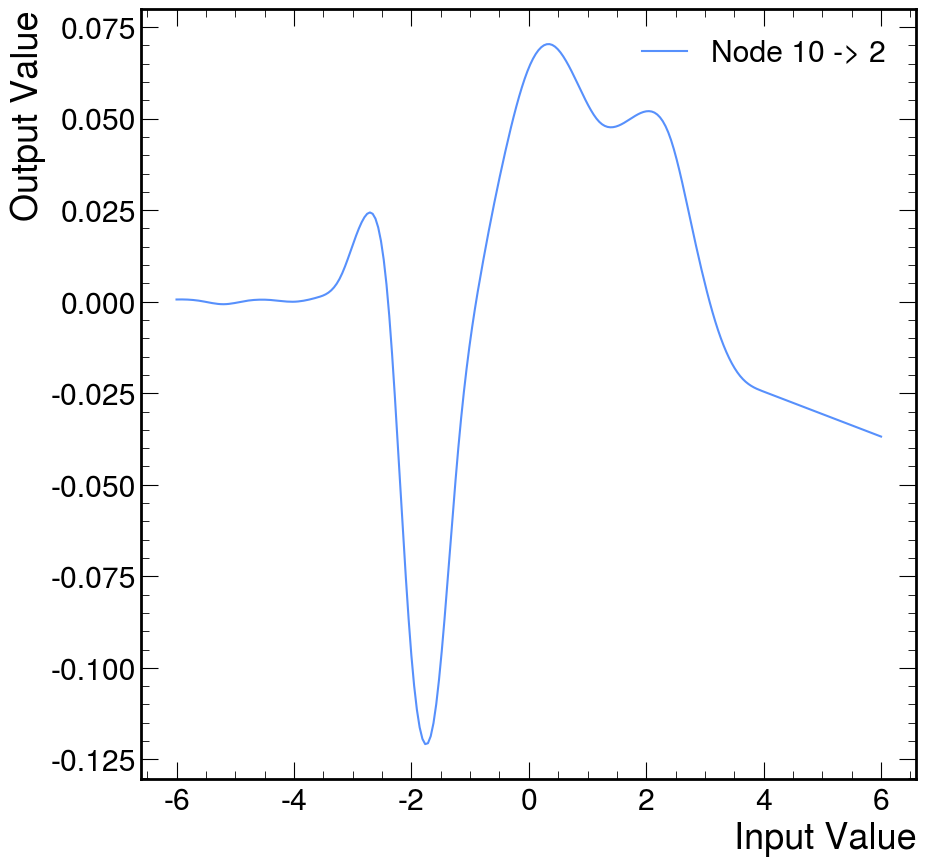

(256,)
(256, 16)


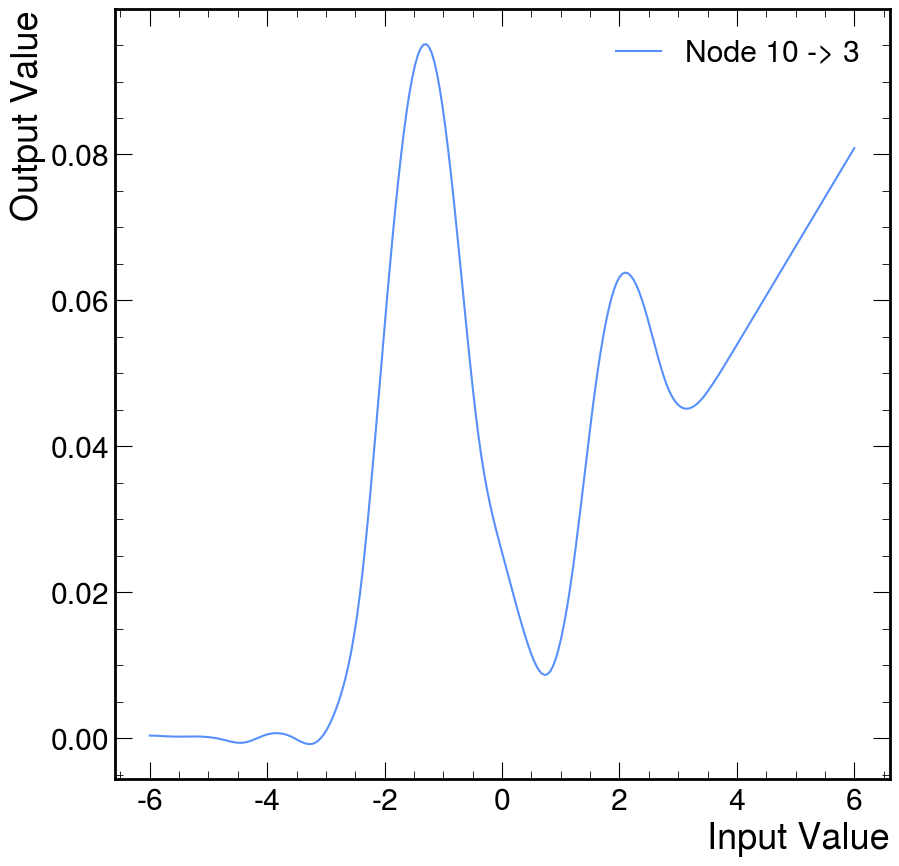

(256,)
(256, 16)


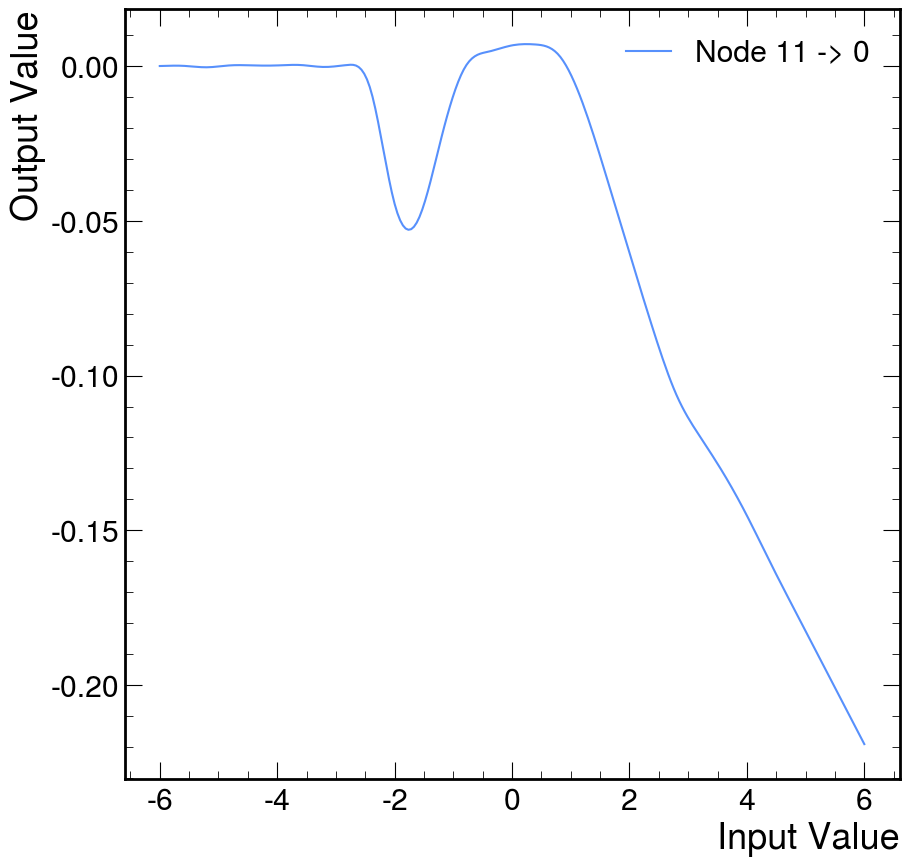

(256,)
(256, 16)


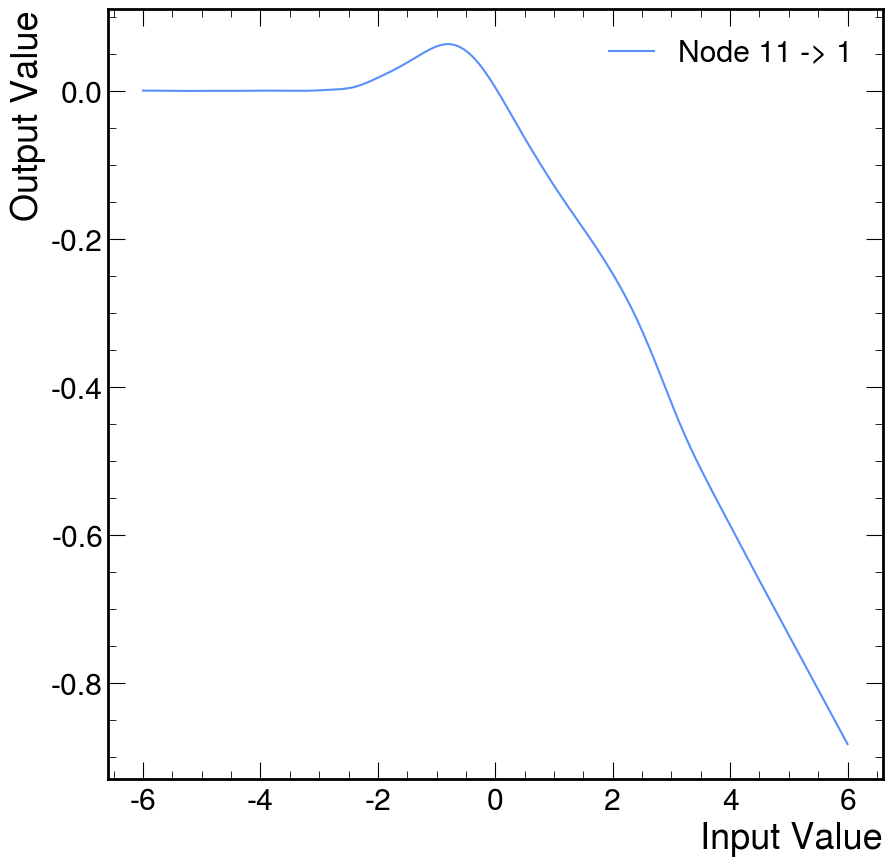

(256,)
(256, 16)


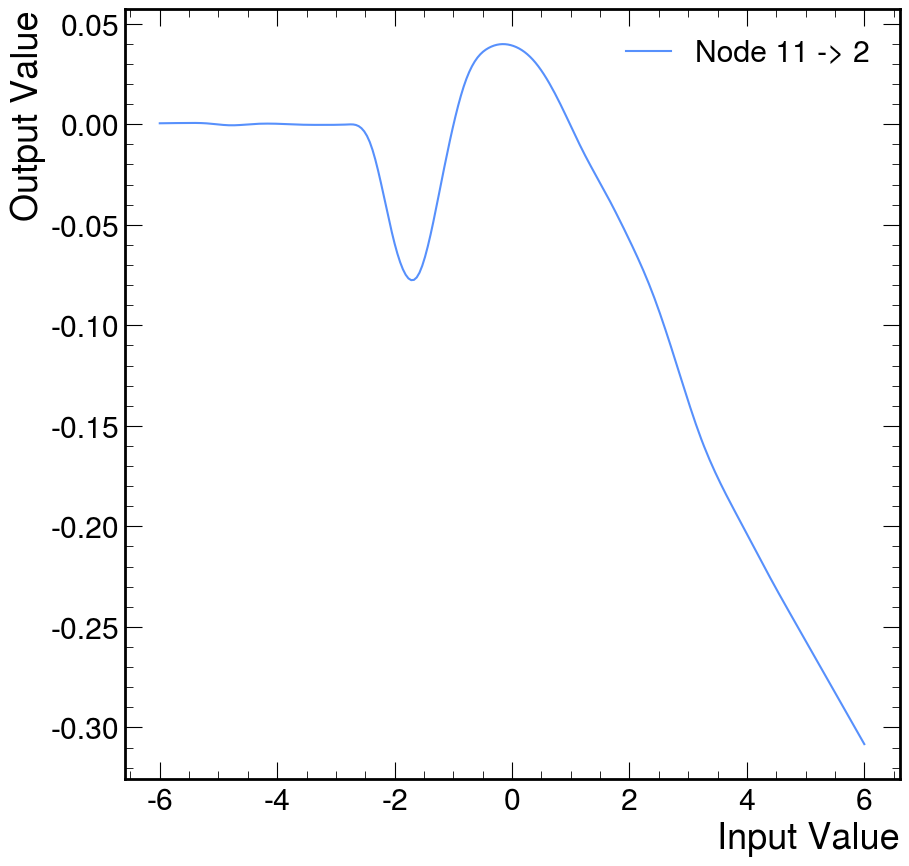

(256,)
(256, 16)


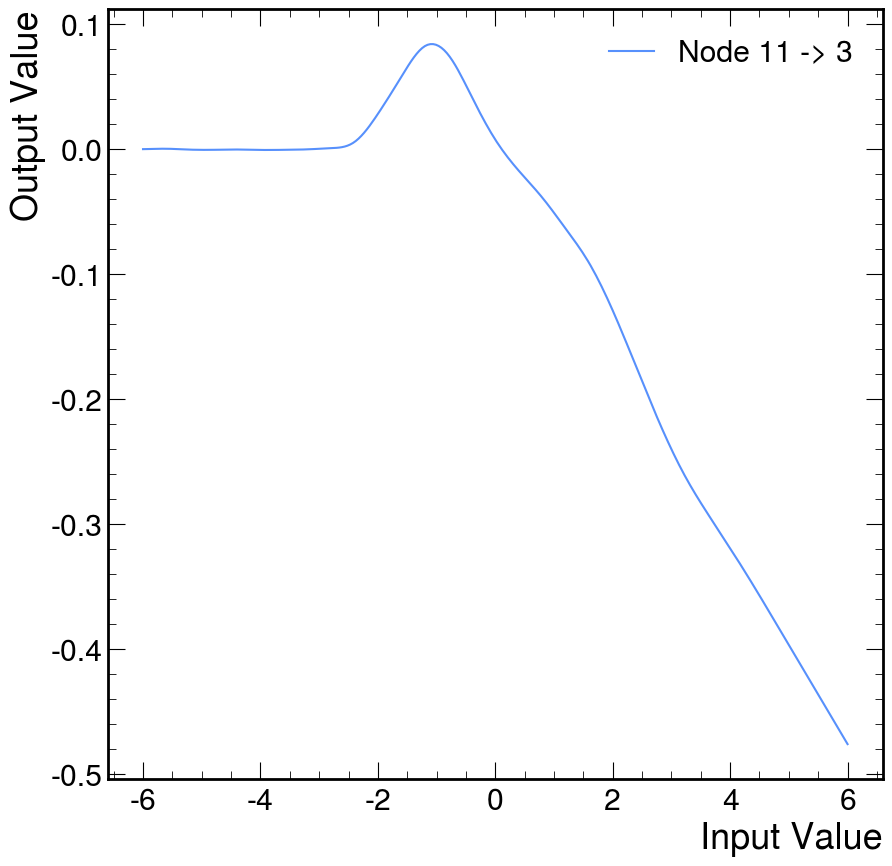

(256,)
(256, 16)


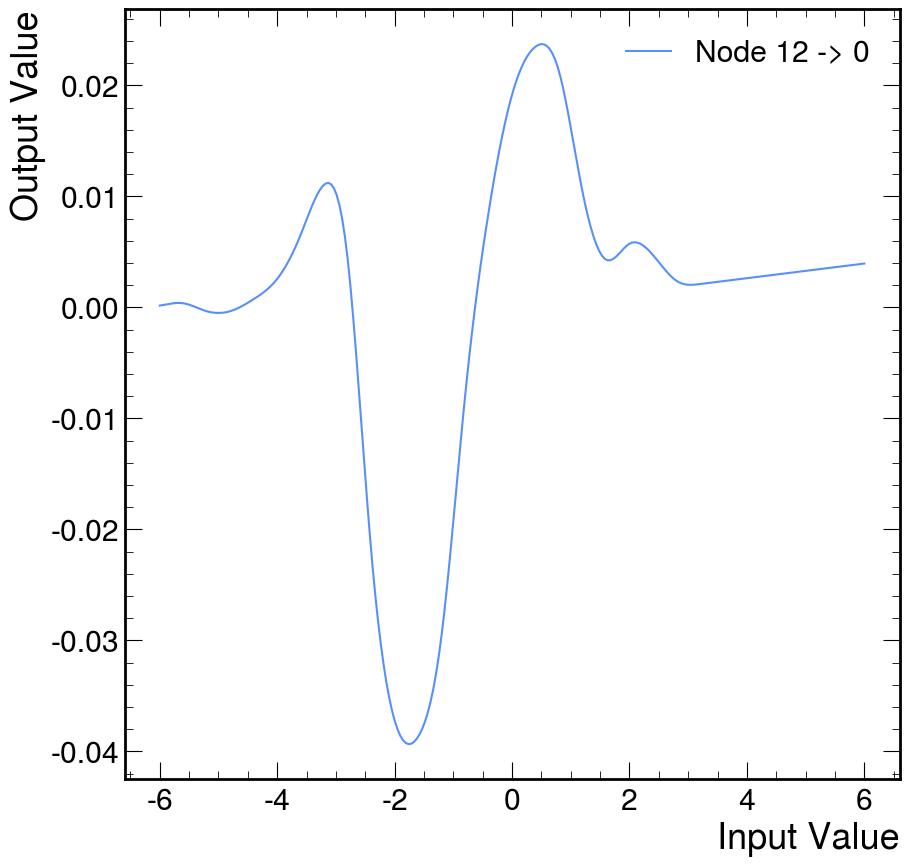

(256,)
(256, 16)


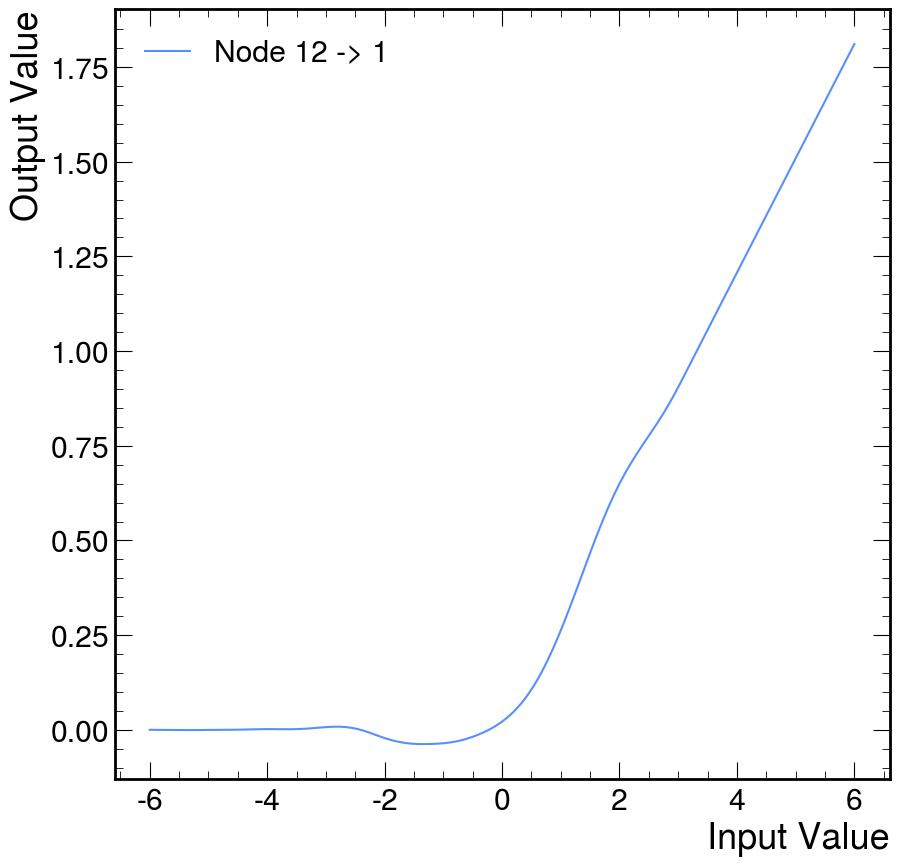

(256,)
(256, 16)


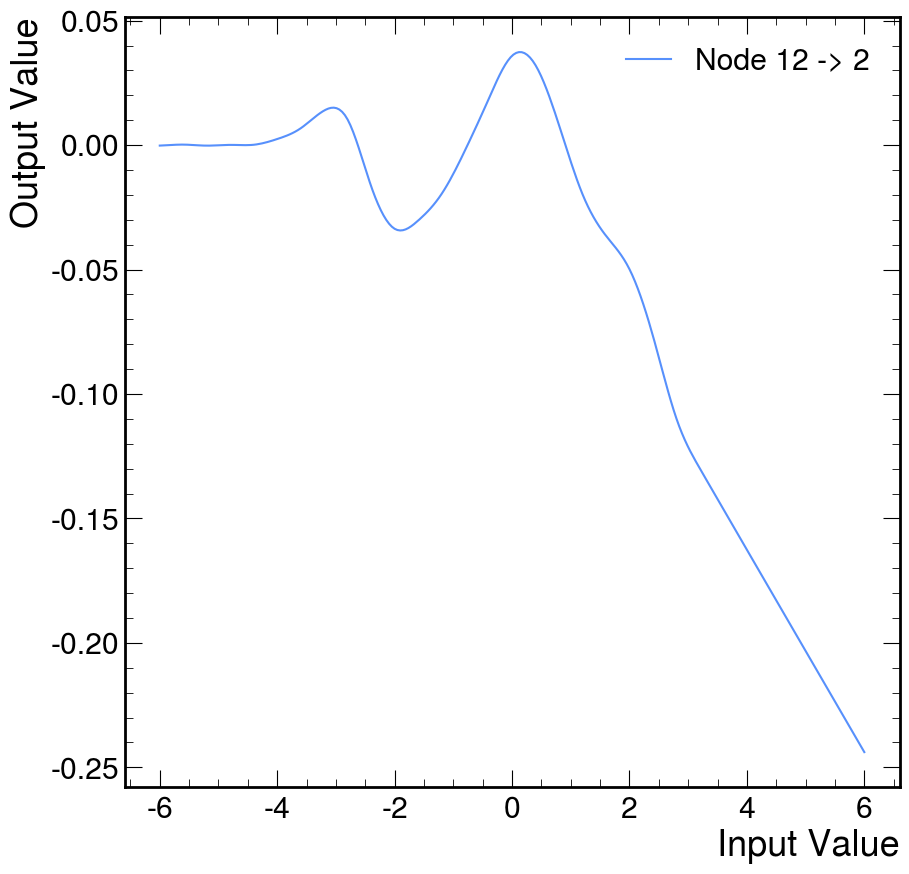

(256,)
(256, 16)


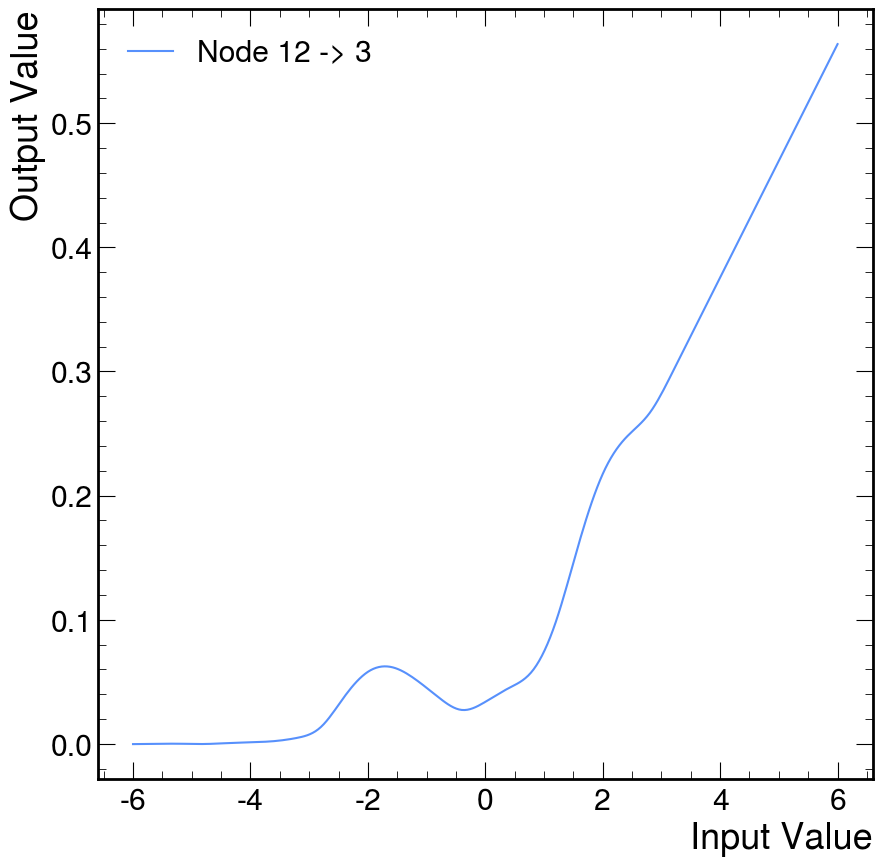

(256,)
(256, 16)


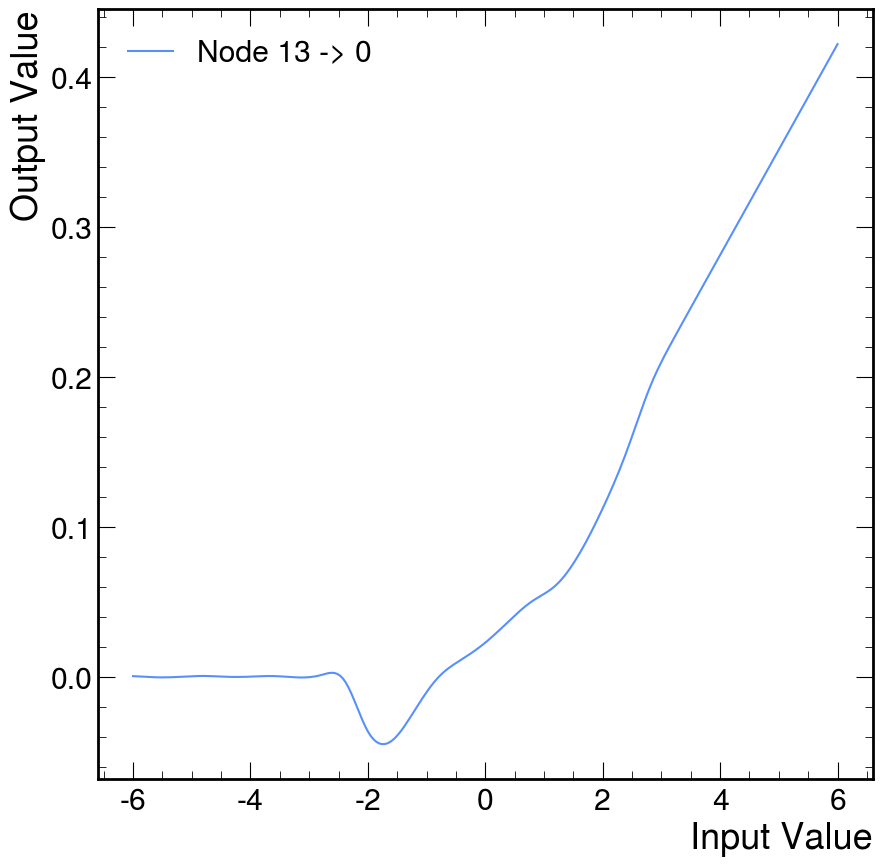

(256,)
(256, 16)


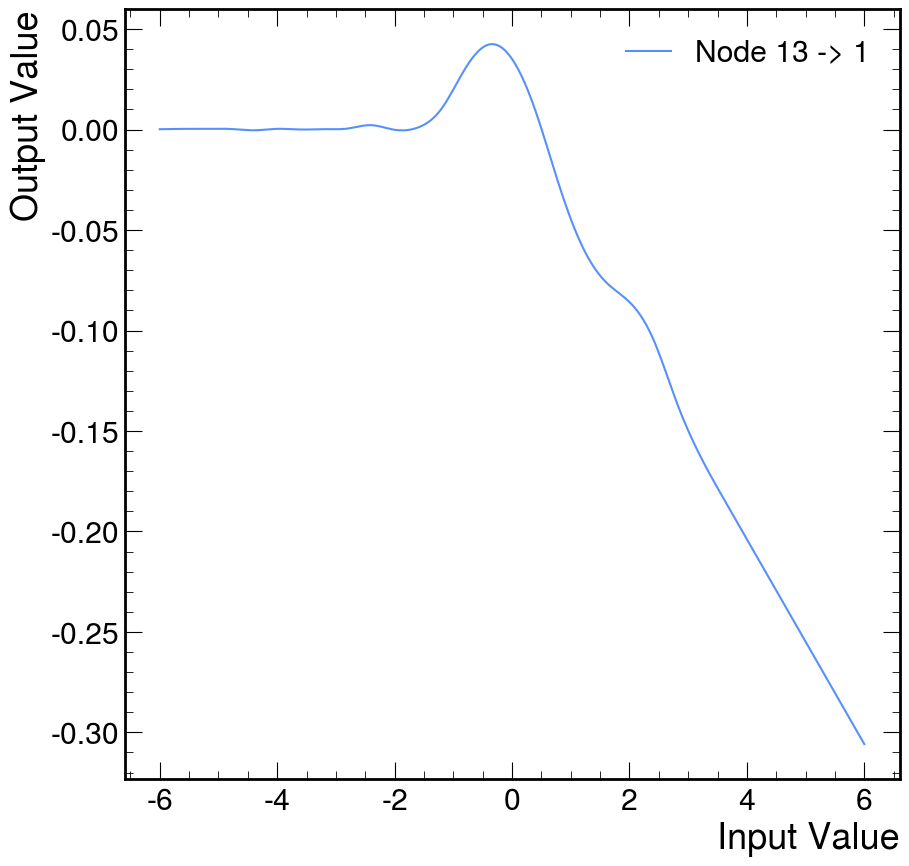

(256,)
(256, 16)


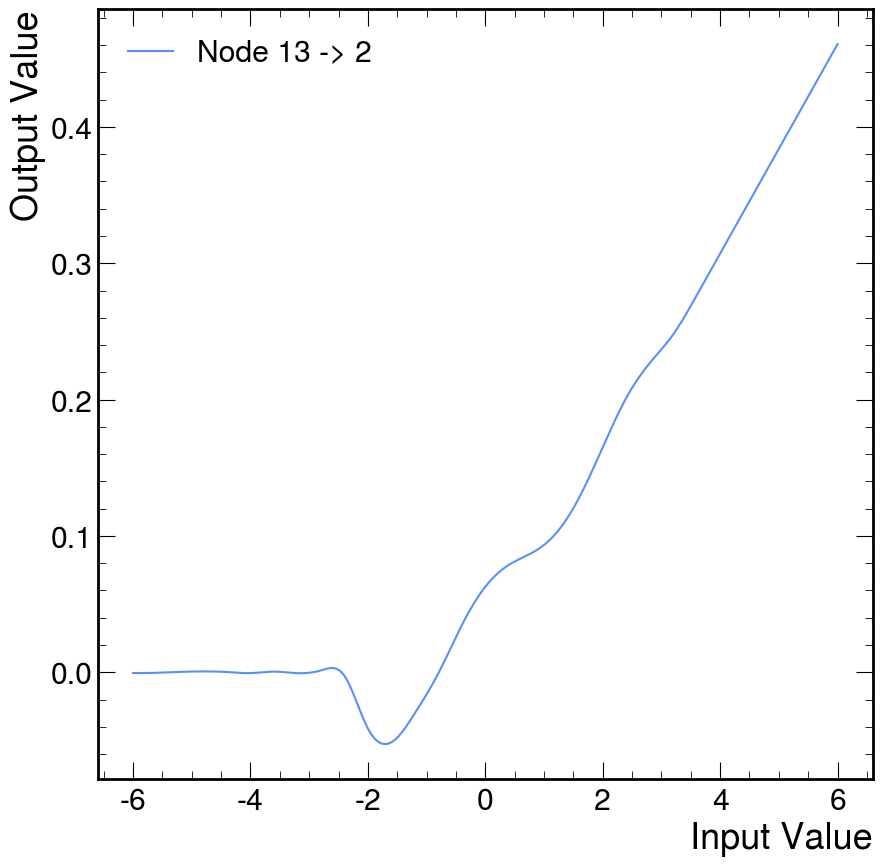

(256,)
(256, 16)


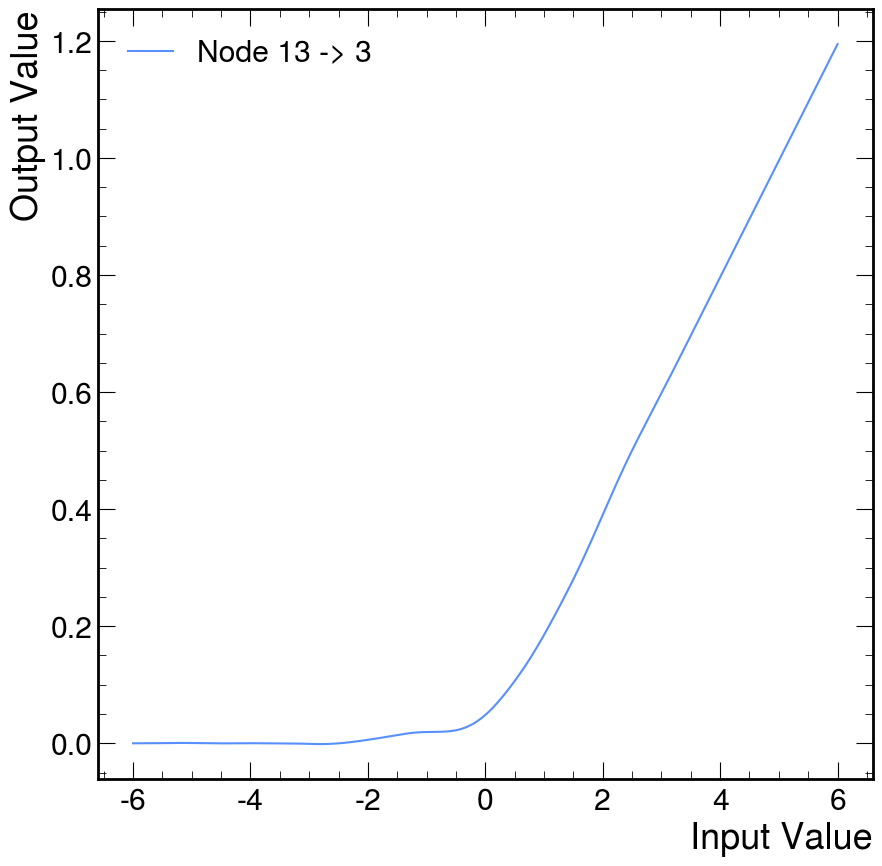

(256,)
(256, 16)


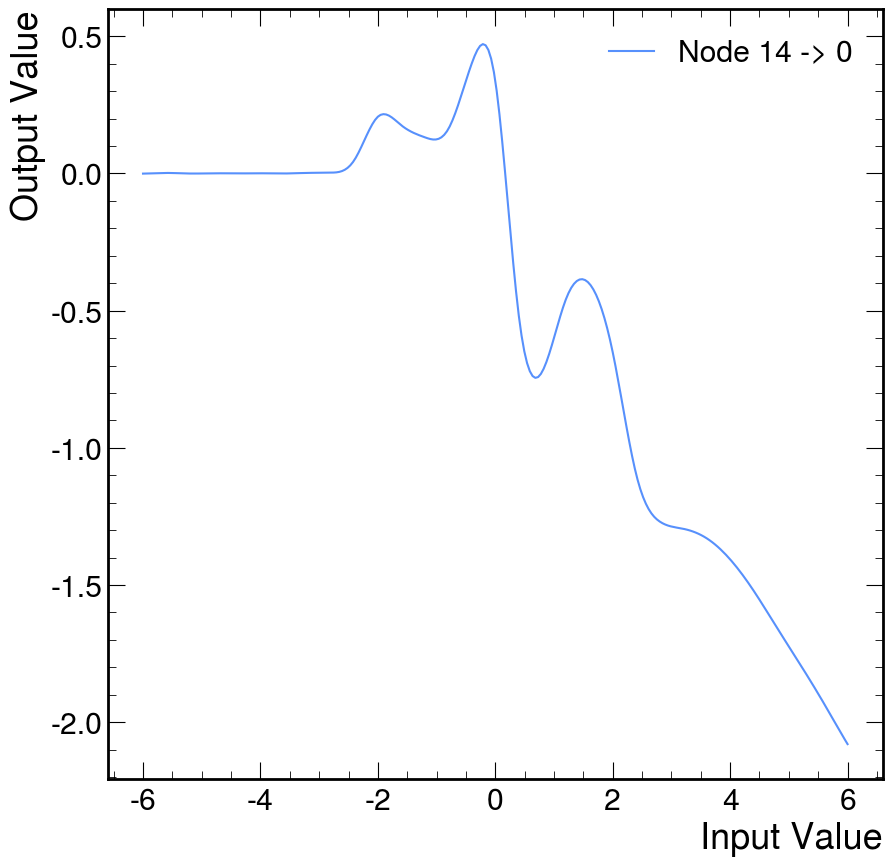

(256,)
(256, 16)


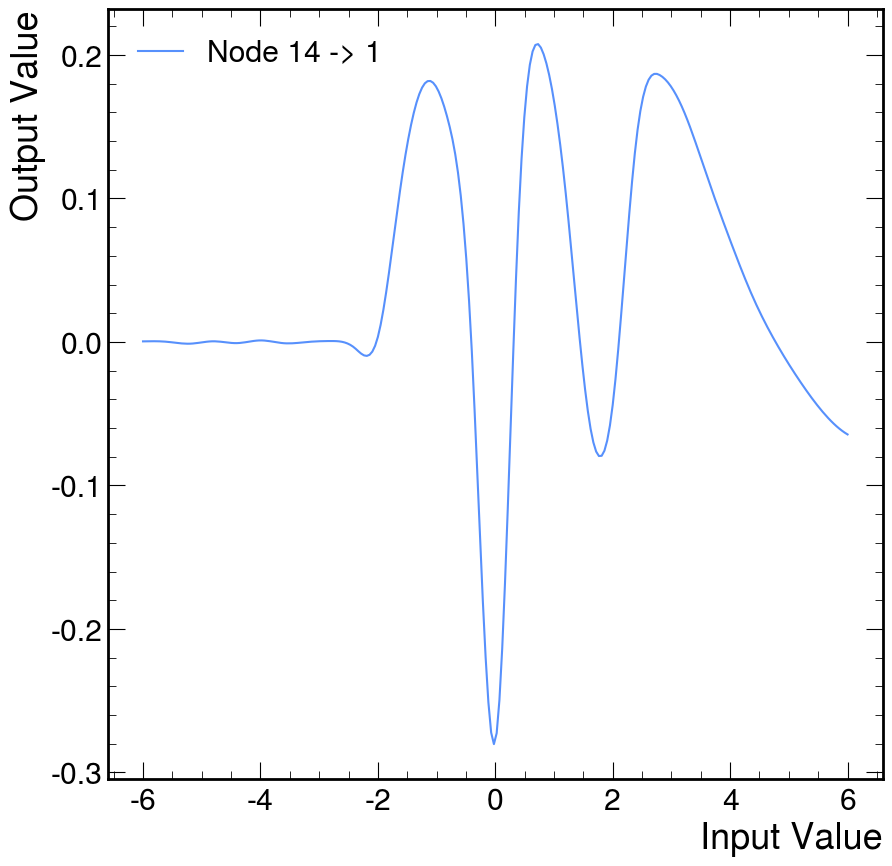

(256,)
(256, 16)


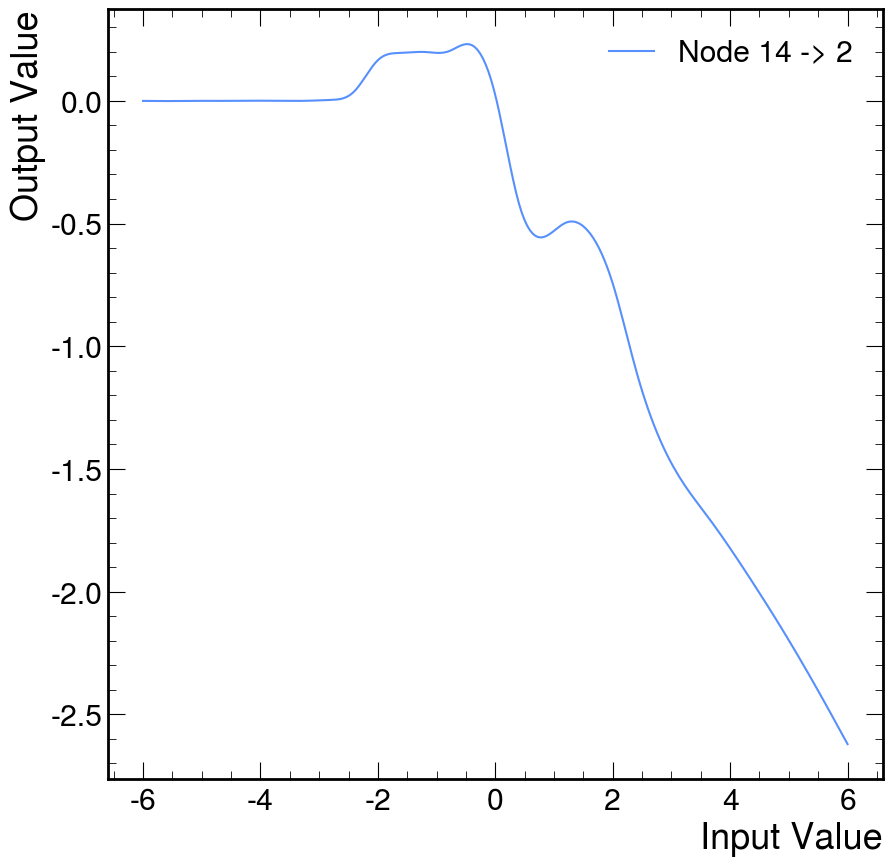

(256,)
(256, 16)


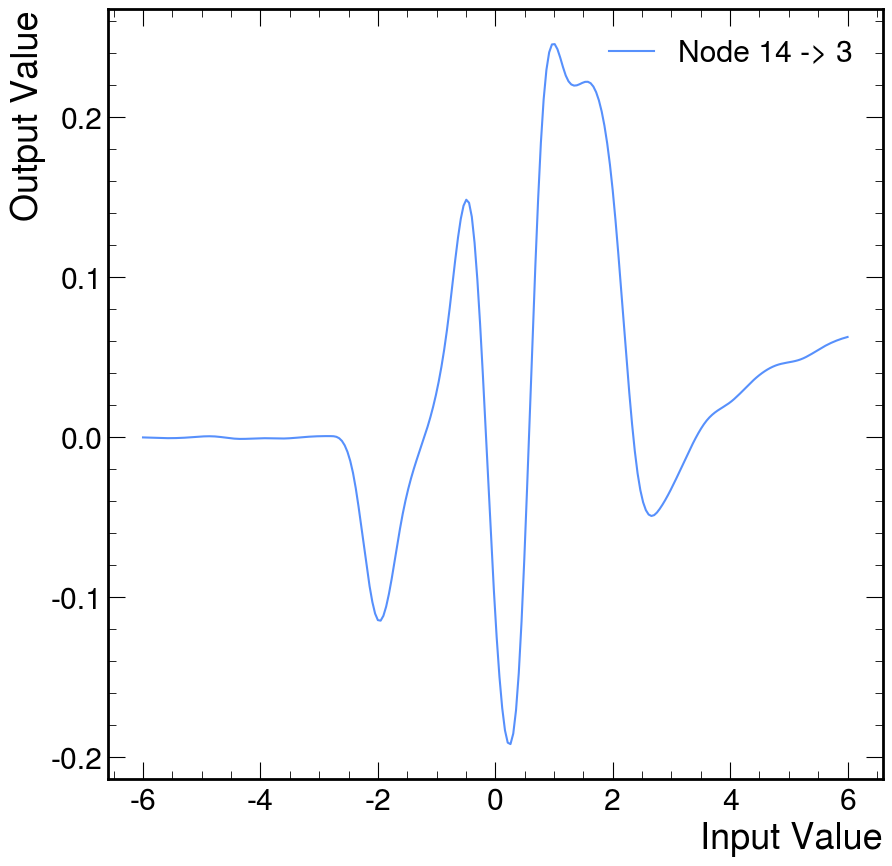

(256,)
(256, 16)


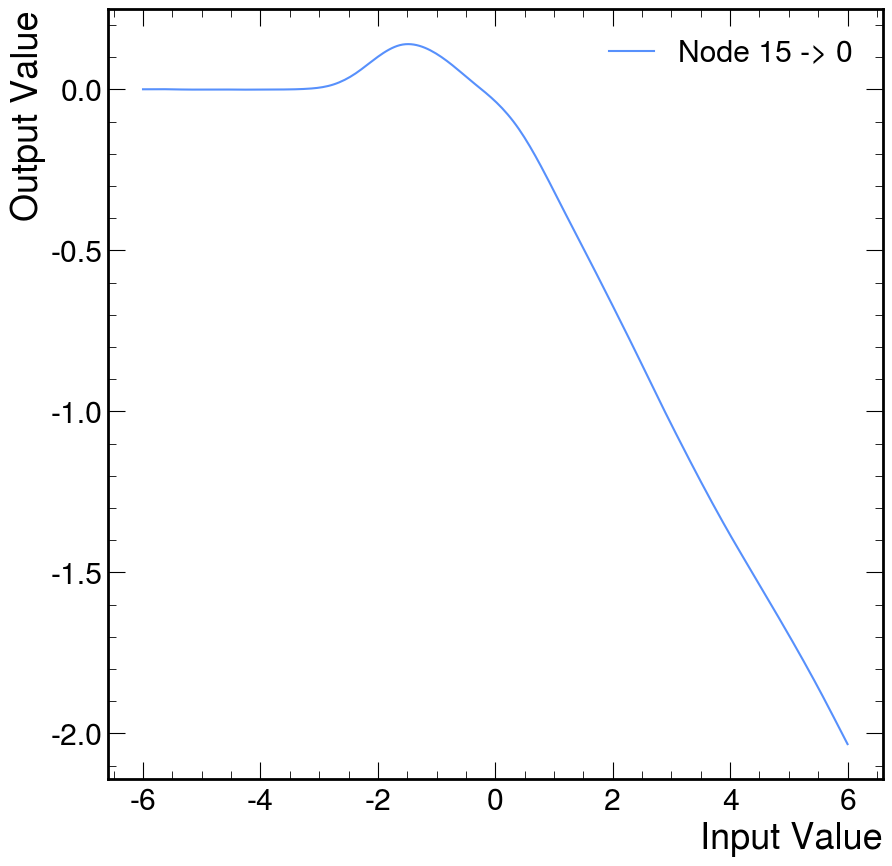

(256,)
(256, 16)


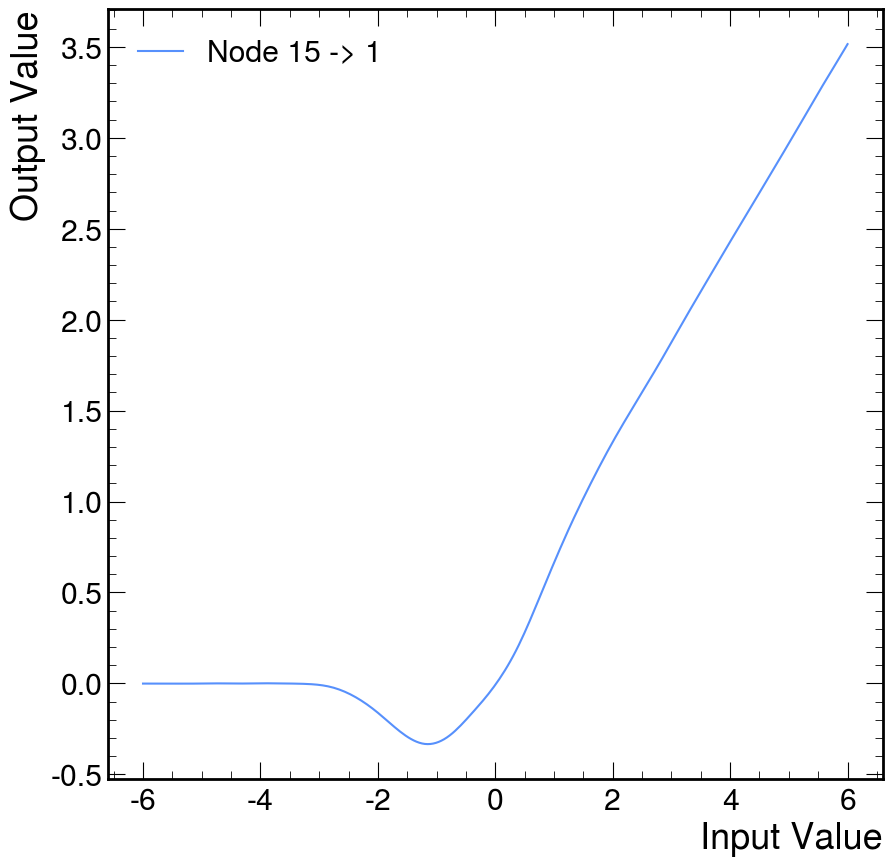

(256,)
(256, 16)


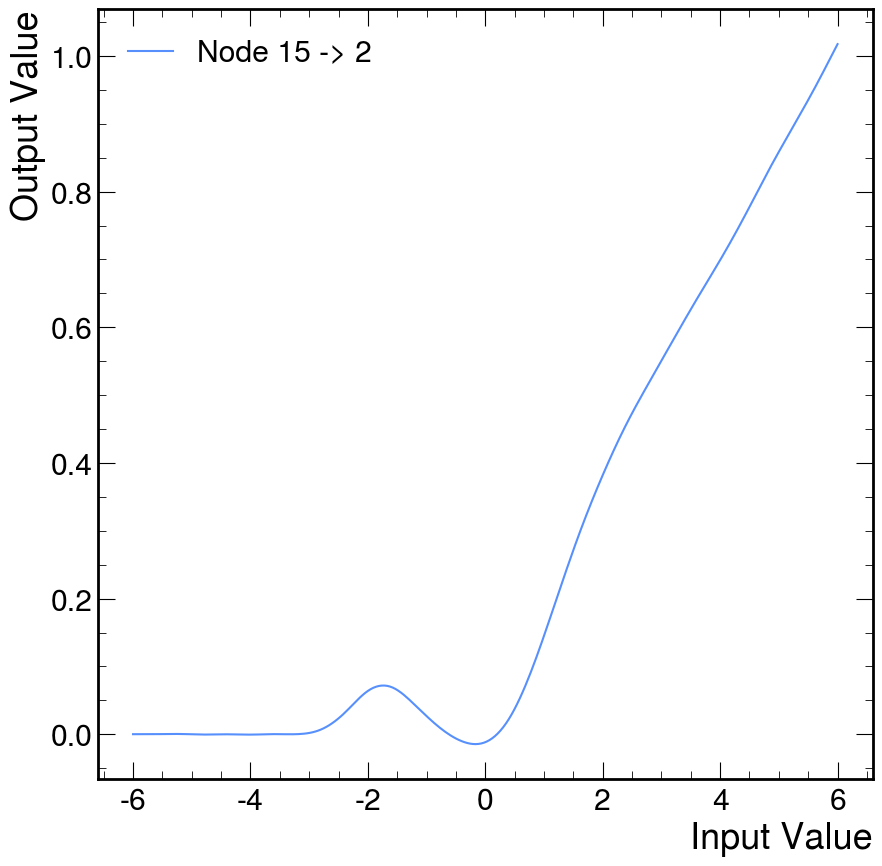

(256,)
(256, 16)


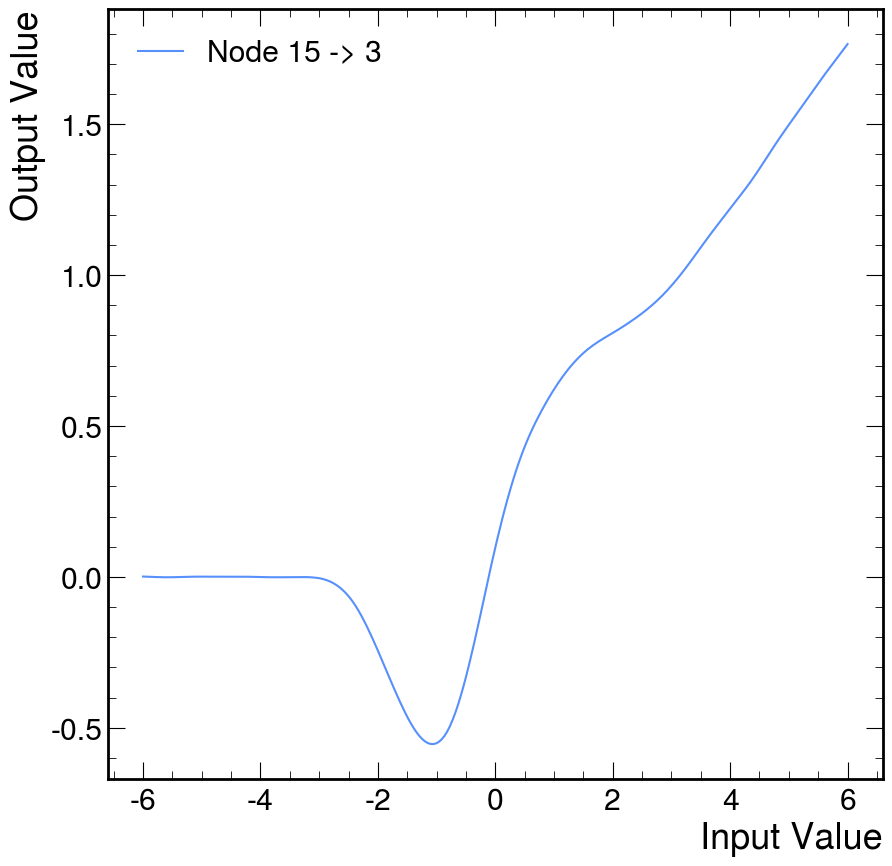

Layer:  1
(256,)
(256, 4)


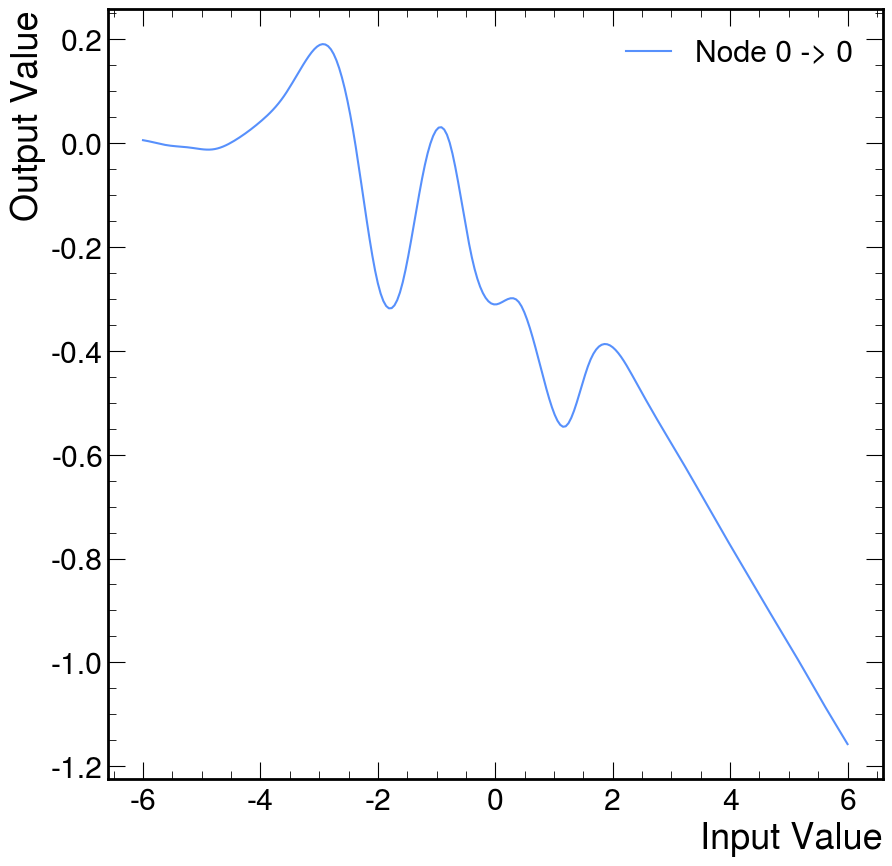

(256,)
(256, 4)


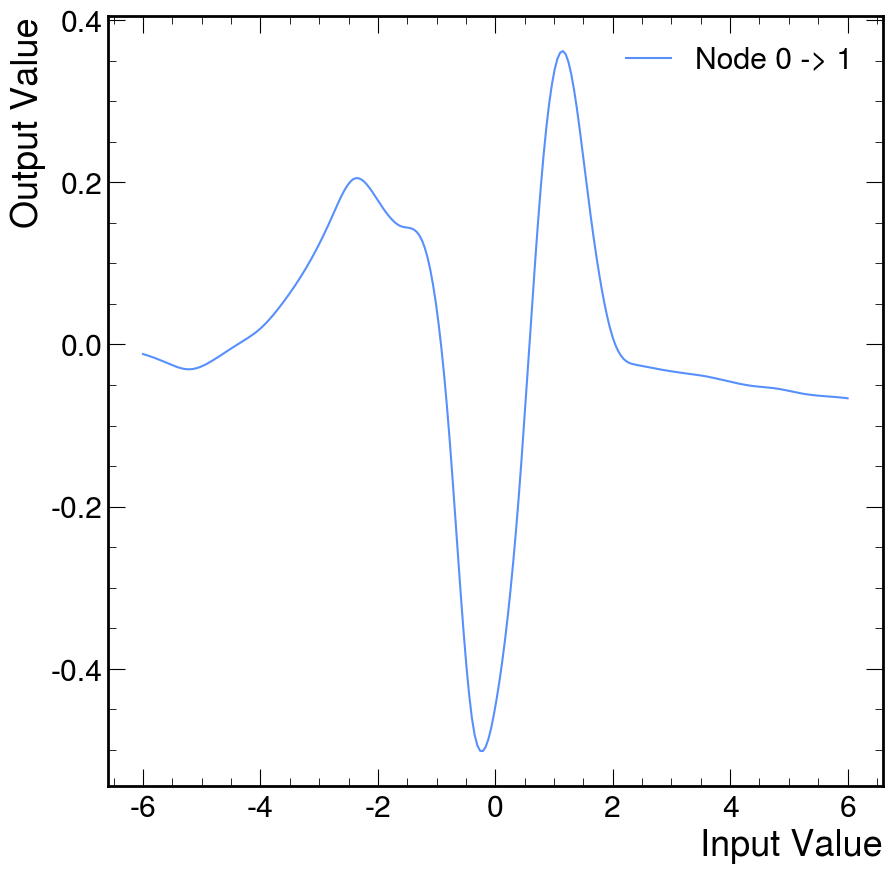

(256,)
(256, 4)


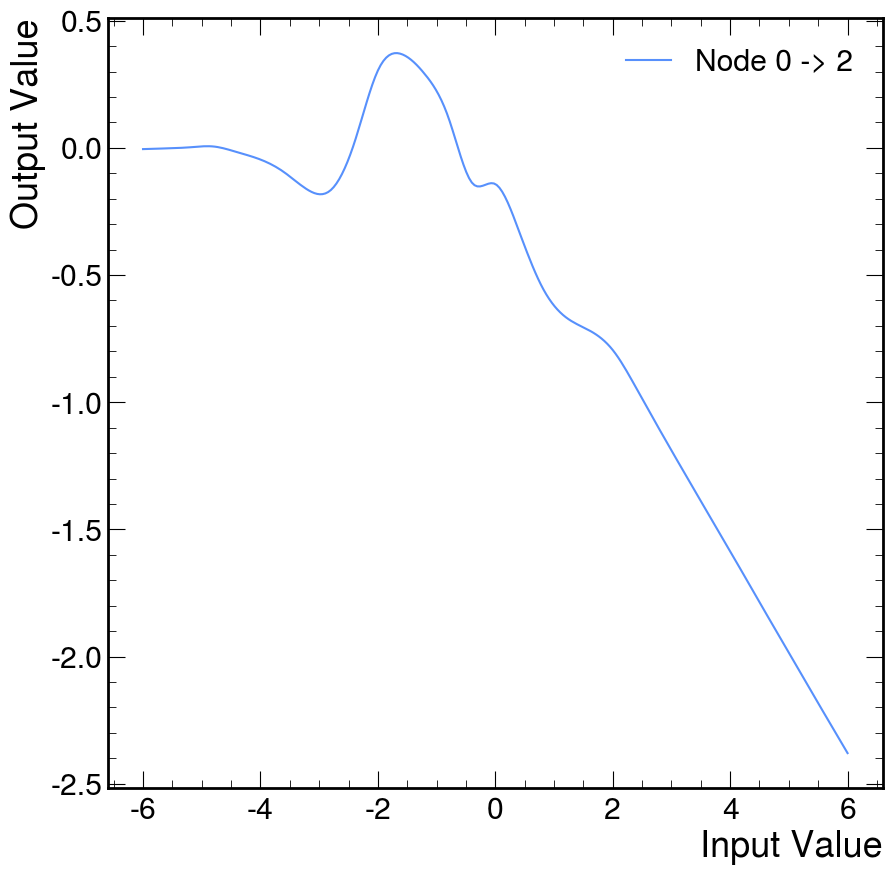

(256,)
(256, 4)


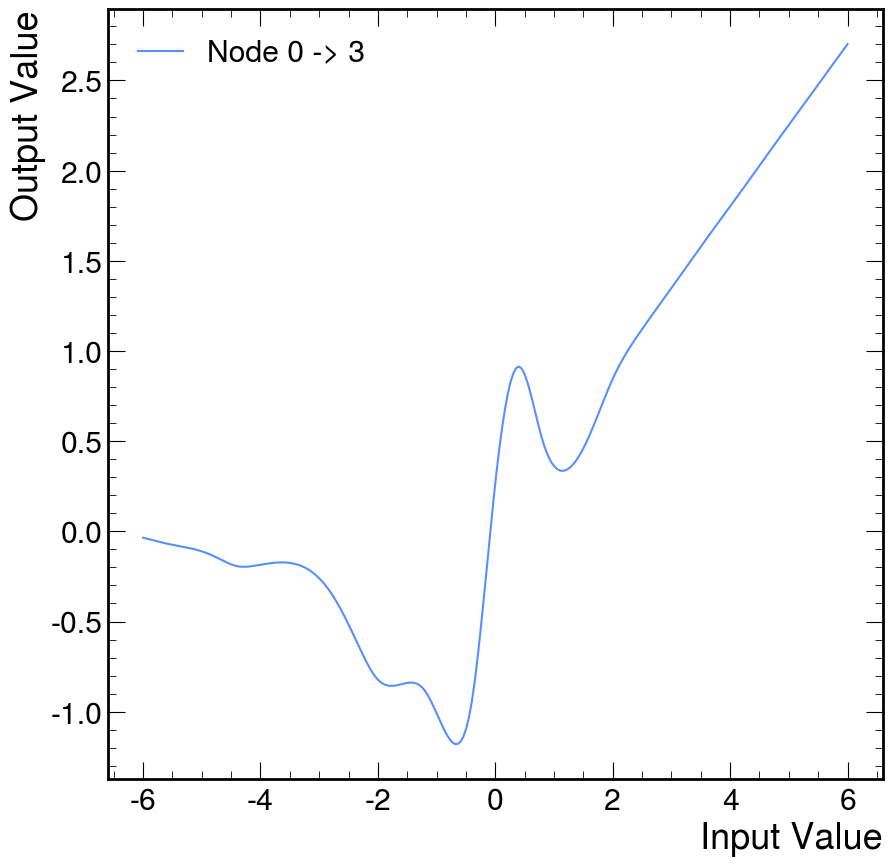

(256,)
(256, 4)


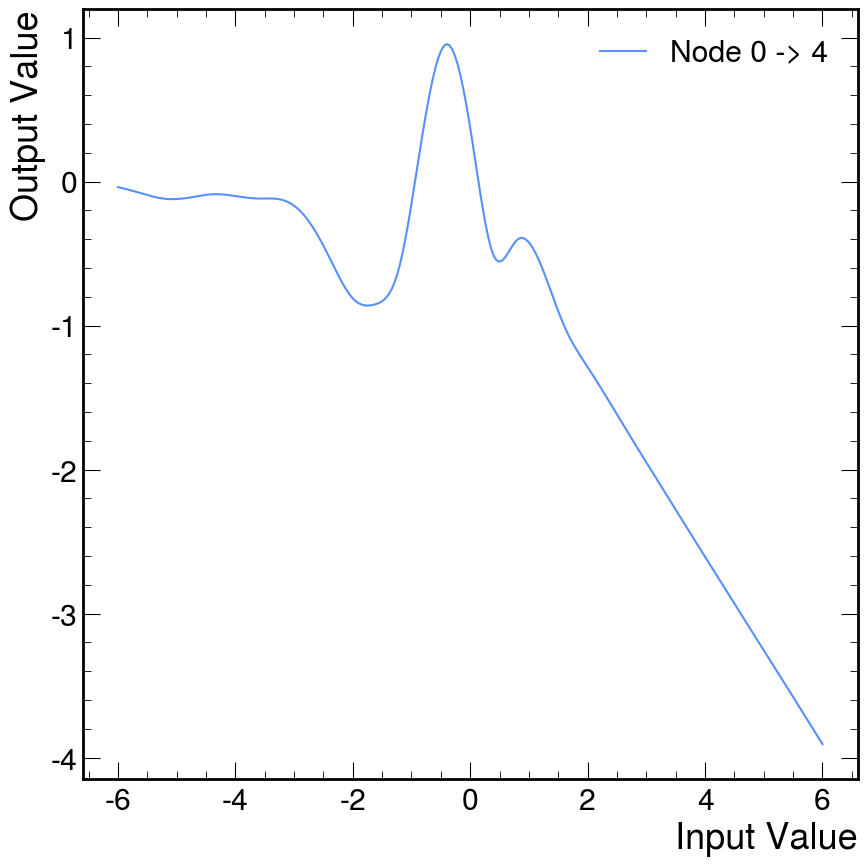

(256,)
(256, 4)


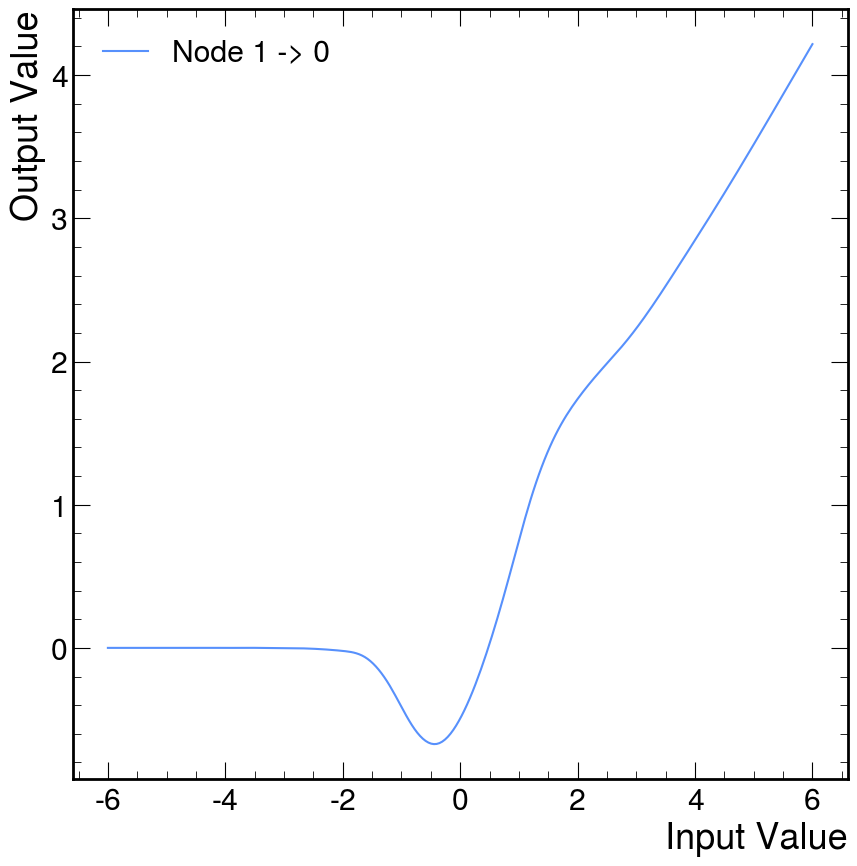

(256,)
(256, 4)


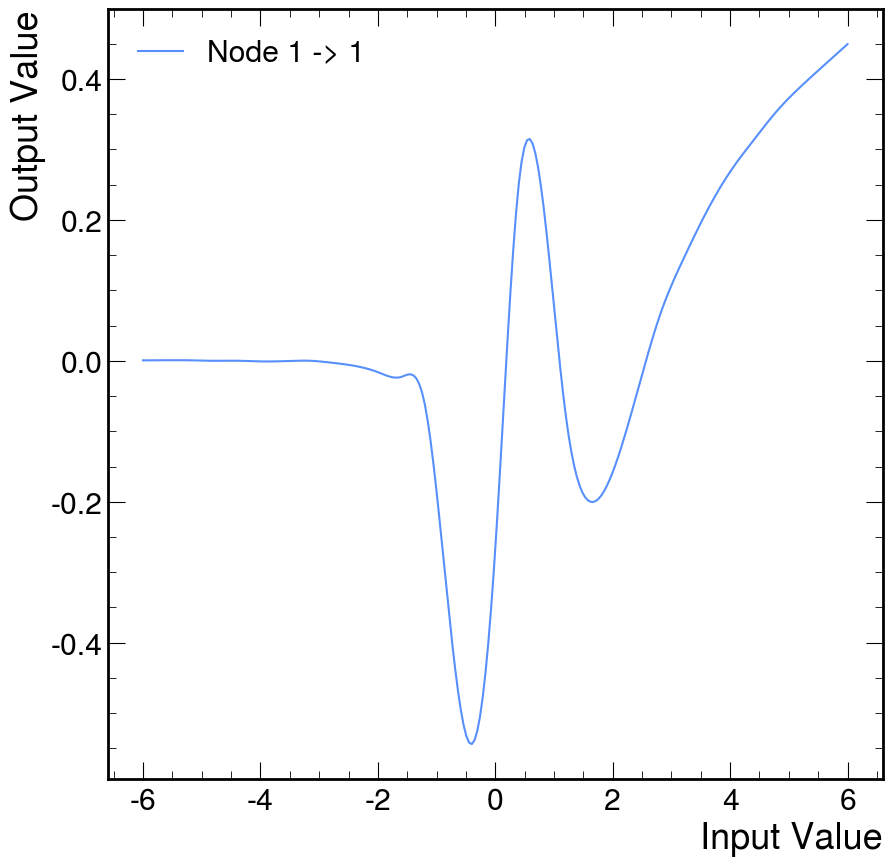

(256,)
(256, 4)


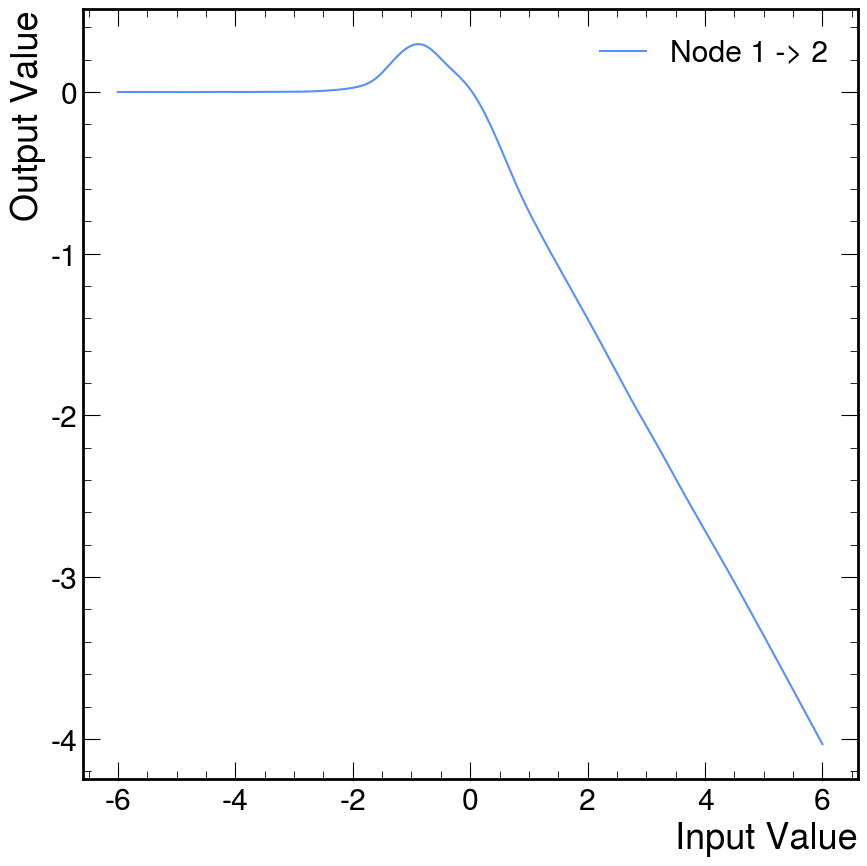

(256,)
(256, 4)


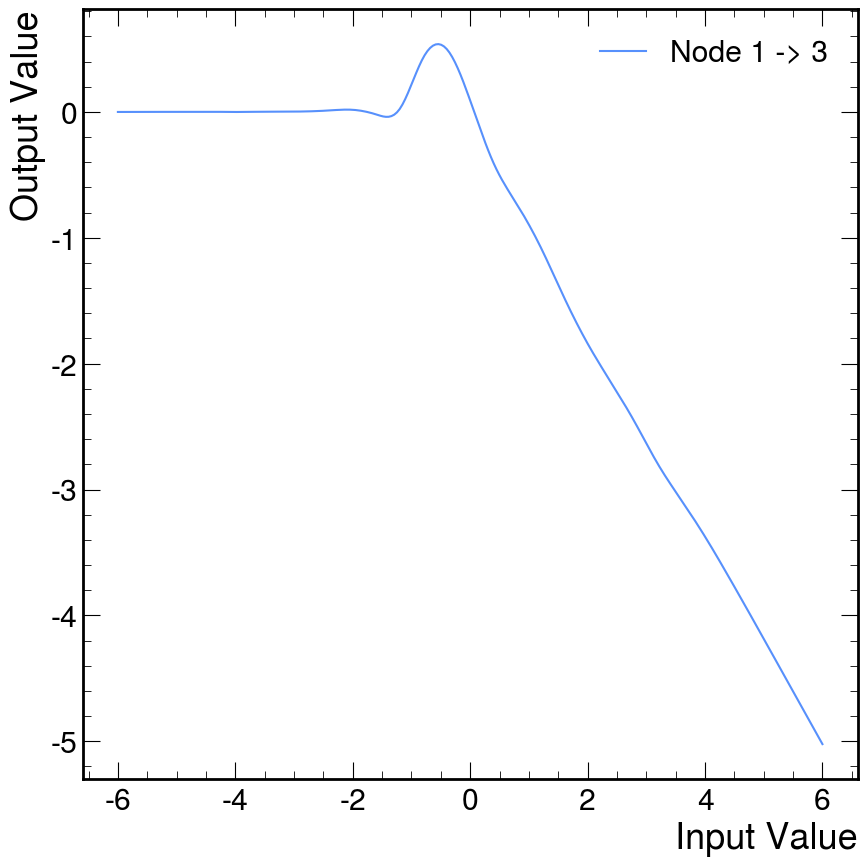

(256,)
(256, 4)


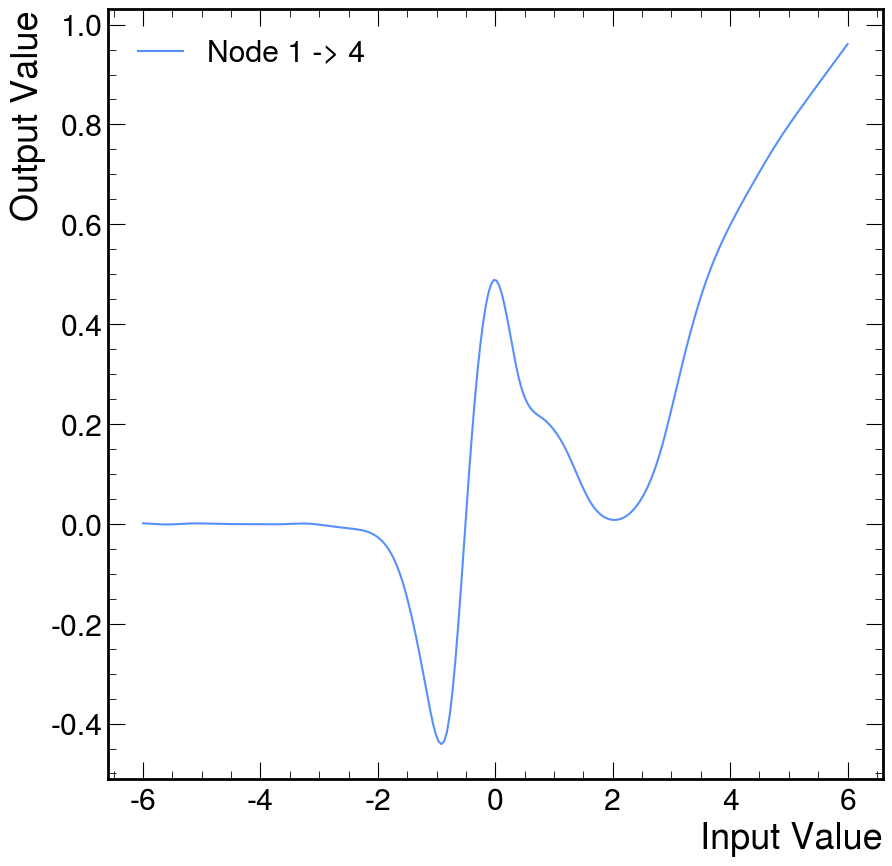

(256,)
(256, 4)


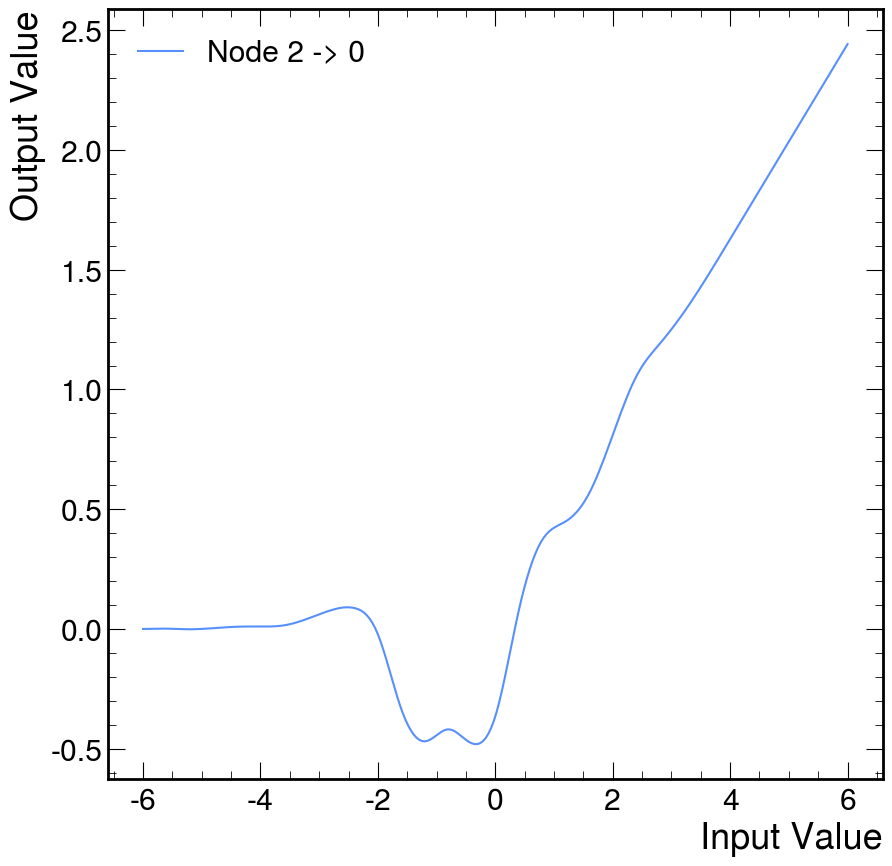

(256,)
(256, 4)


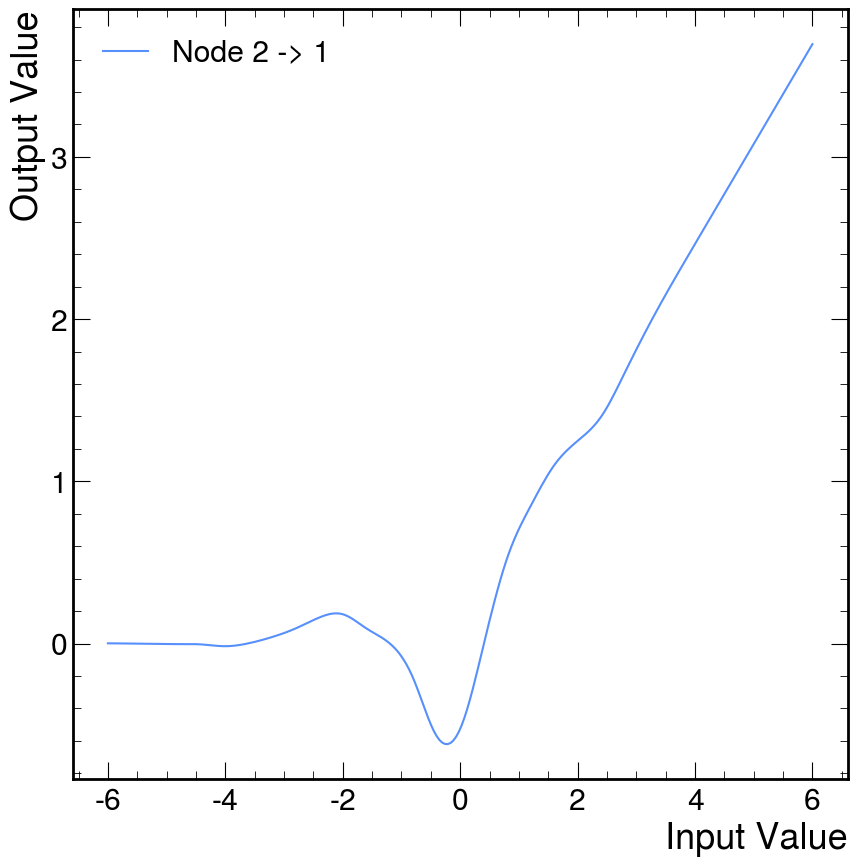

(256,)
(256, 4)


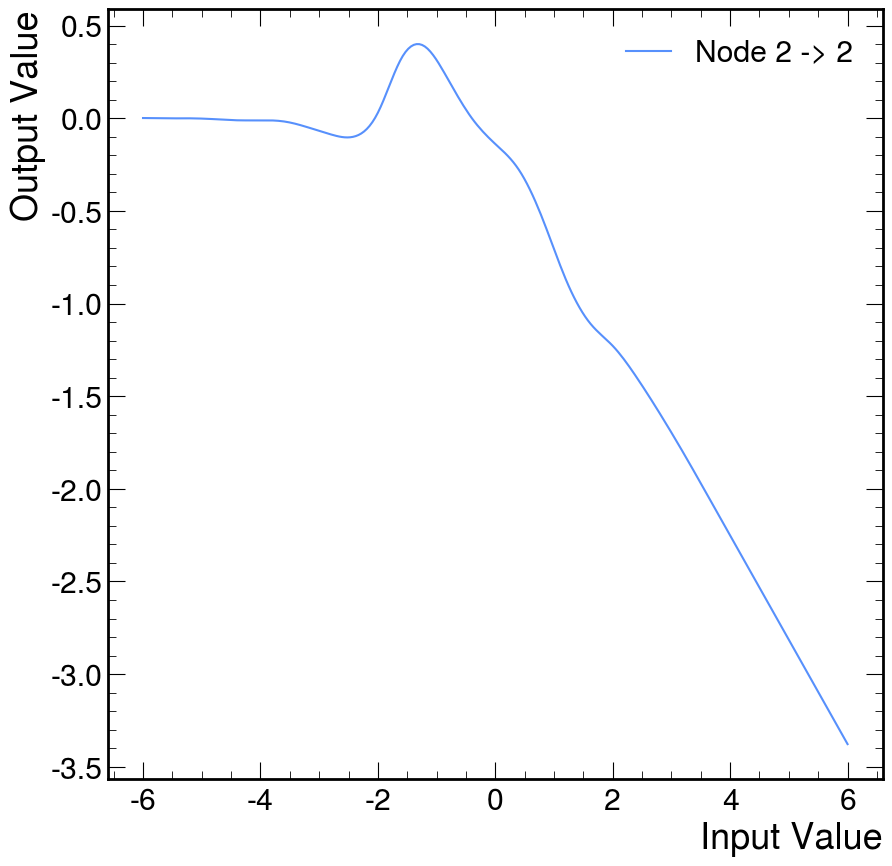

(256,)
(256, 4)


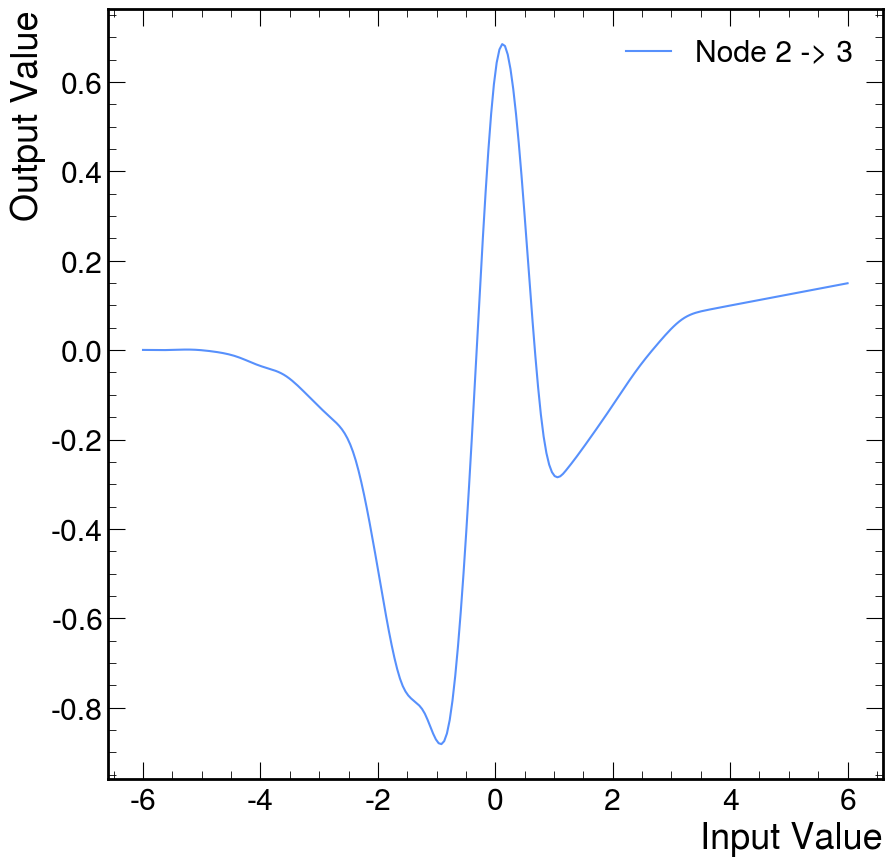

(256,)
(256, 4)


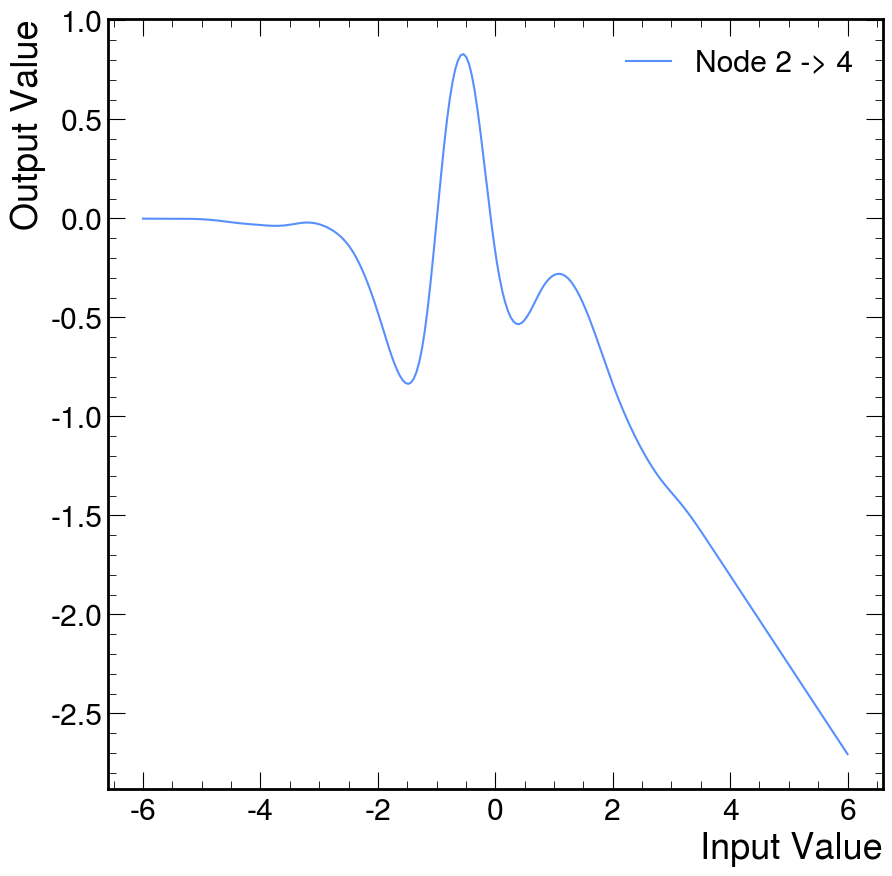

(256,)
(256, 4)


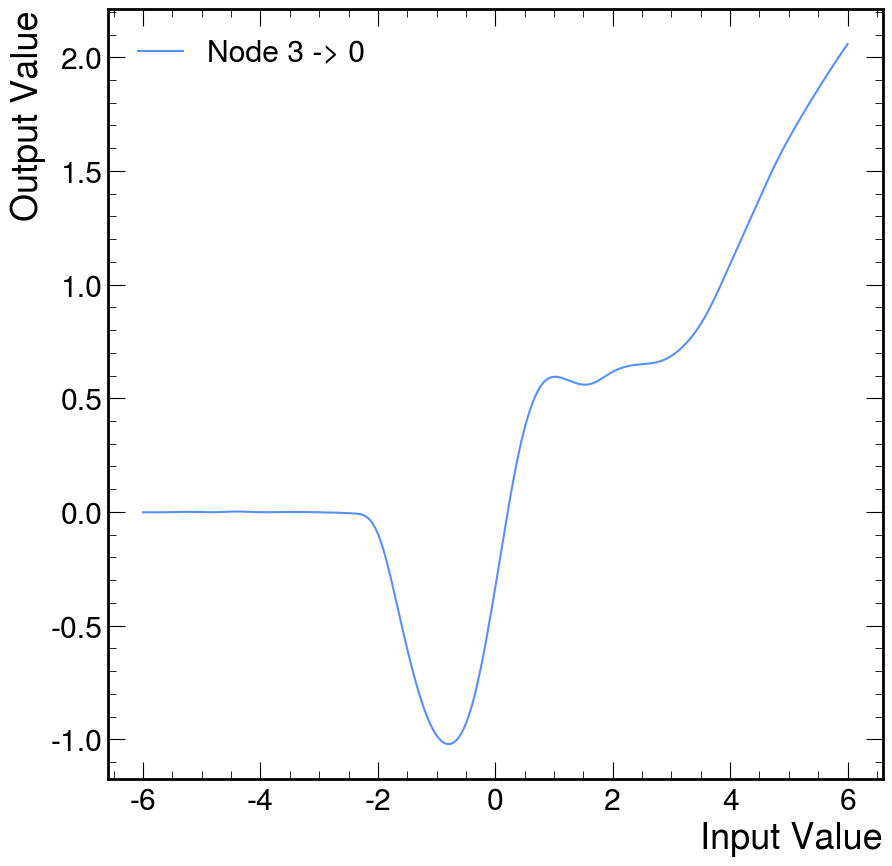

(256,)
(256, 4)


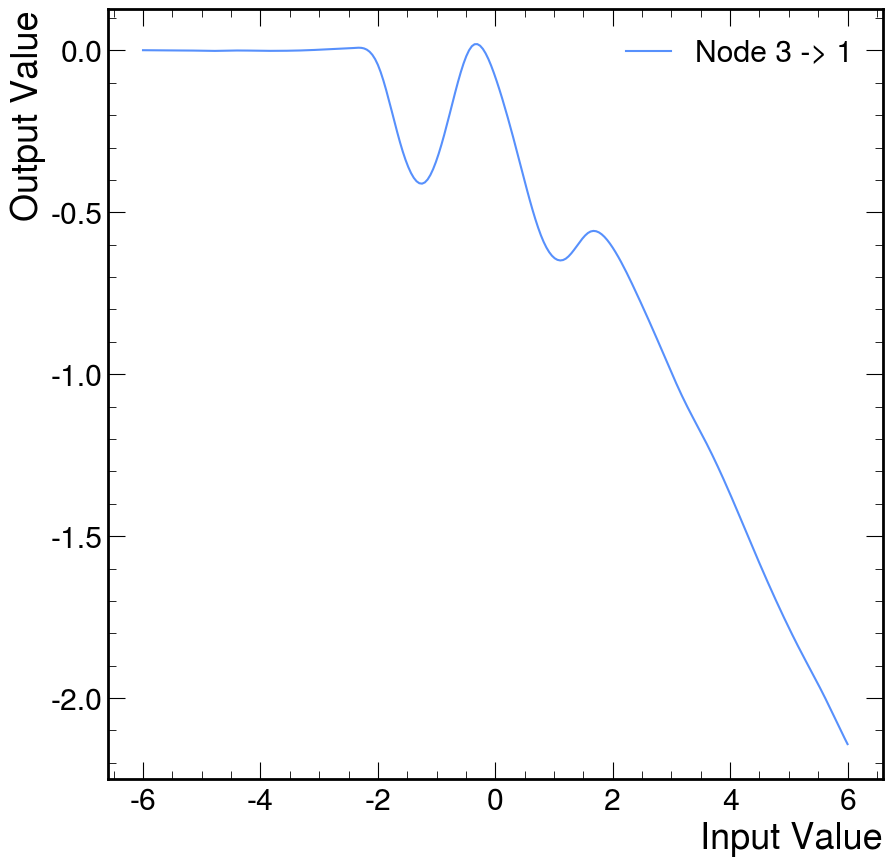

(256,)
(256, 4)


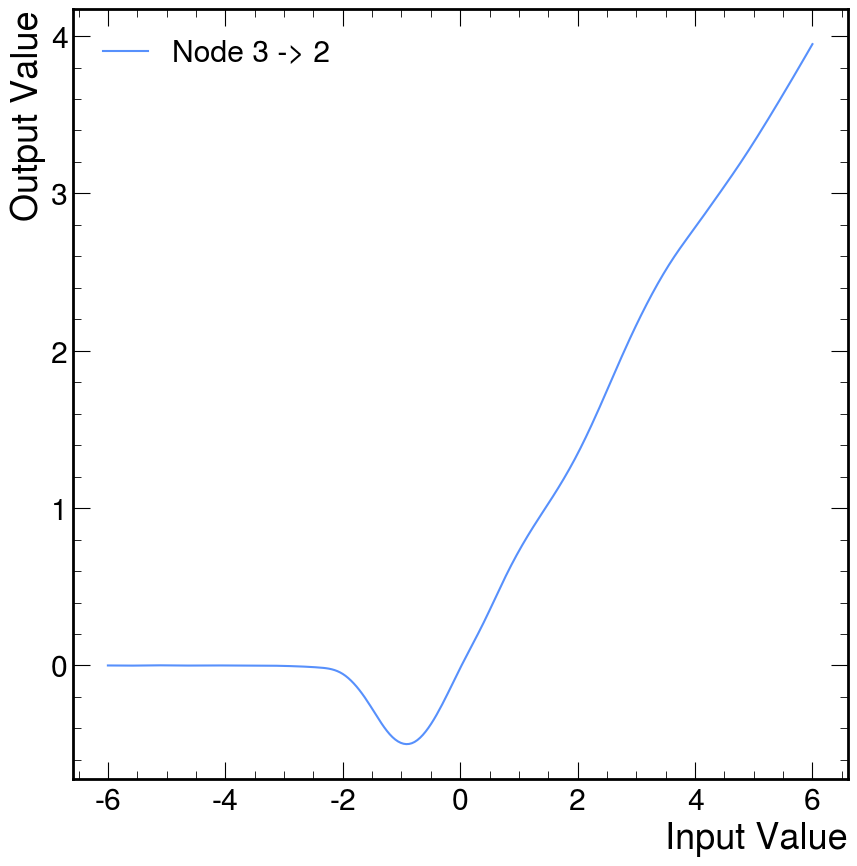

(256,)
(256, 4)


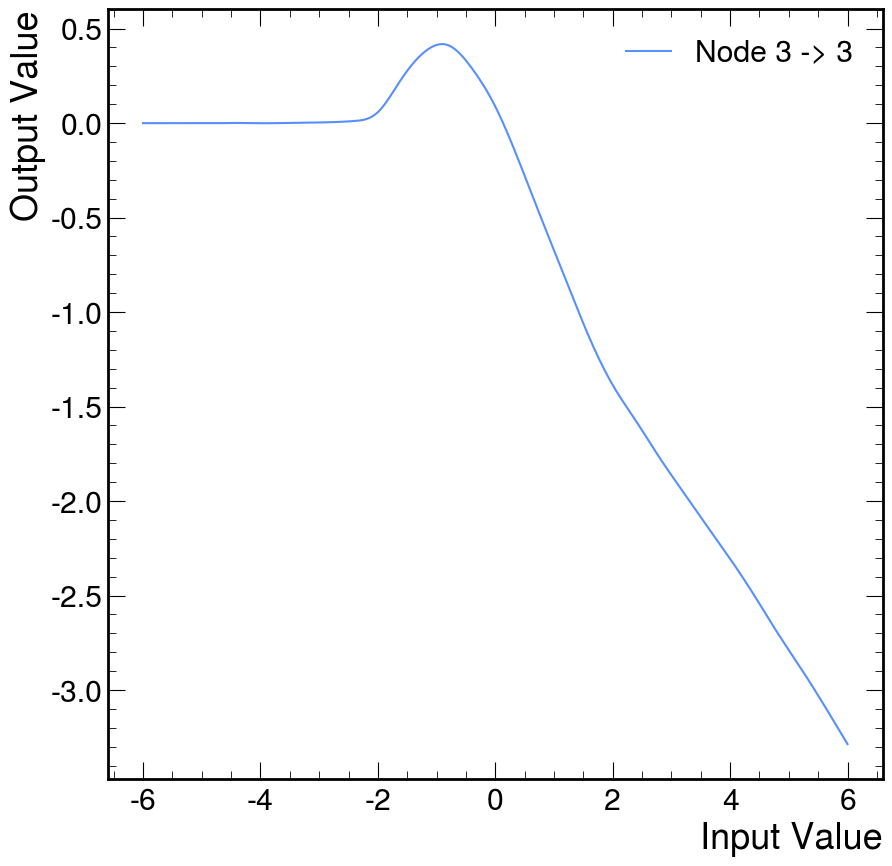

(256,)
(256, 4)


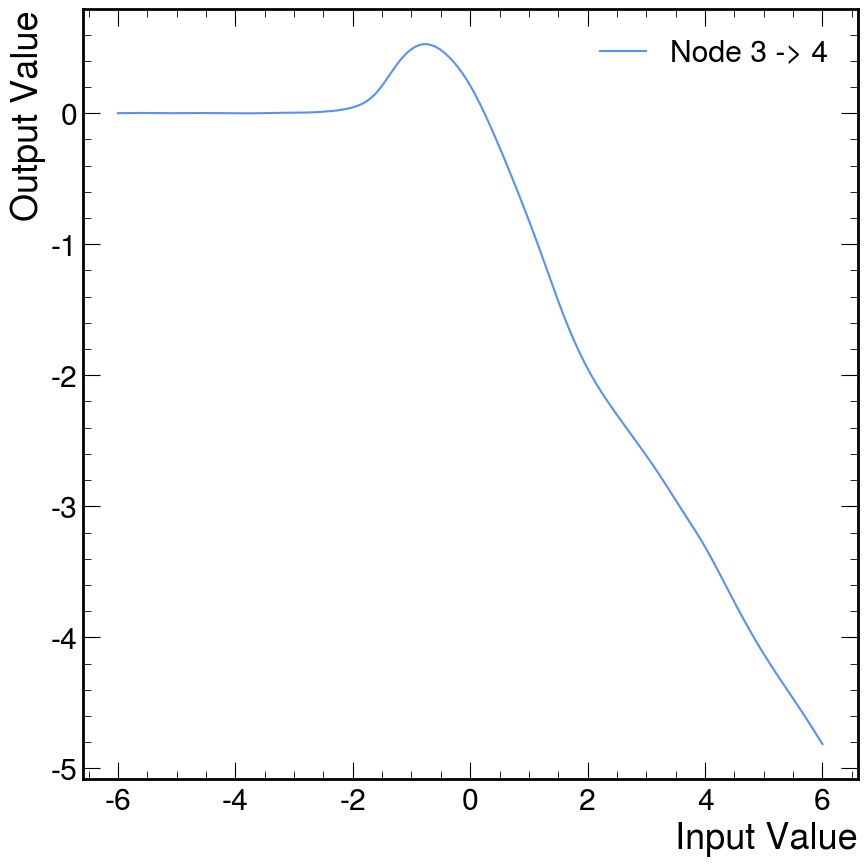

In [19]:
print("Grid Range: ", grid_range)

#Loop through each layer of the activation function
for i in range(len(model.layers)):
    layer = model.layers[i]
    print("Layer: ", i)

    #Create dummy input
    array = np.linspace(grid_range[0], grid_range[1], 256)
    stacked_array = np.hstack([[array]*layer.in_features]).T
    x=torch.from_numpy(stacked_array).float().to(device)

    #Loop through each activation function
    for j in range(layer.in_features):
        for k in range(layer.out_features):
            base_output = layer.base_activation(x)[:,j]*layer.base_weight[k,j]
            spline_output = F.linear(layer.b_splines(x)[:,j,:], layer.scaled_spline_weight[k,j,:])

            output = base_output + spline_output

            print(output.cpu().detach().numpy().flatten().shape)
            print(x.cpu().detach().numpy().shape)

            plt.plot(x[:,j].cpu().detach().numpy(), output.cpu().detach().numpy(), label=f"Layer {i}. Node {j} -> {k}")
            plt.xlabel("Input Value")
            plt.ylabel("Output Value")
            plt.legend()
            plt.show()

In [5]:
x = torch.linspace(grid_range[0], grid_range[1], 256).to(device)

In [9]:
layer.base_weight.shape

torch.Size([4, 16])

In [4]:
layer = model.layers[0]

In [6]:
layer.b_splines(x).shape

torch.Size([240, 16, 33])

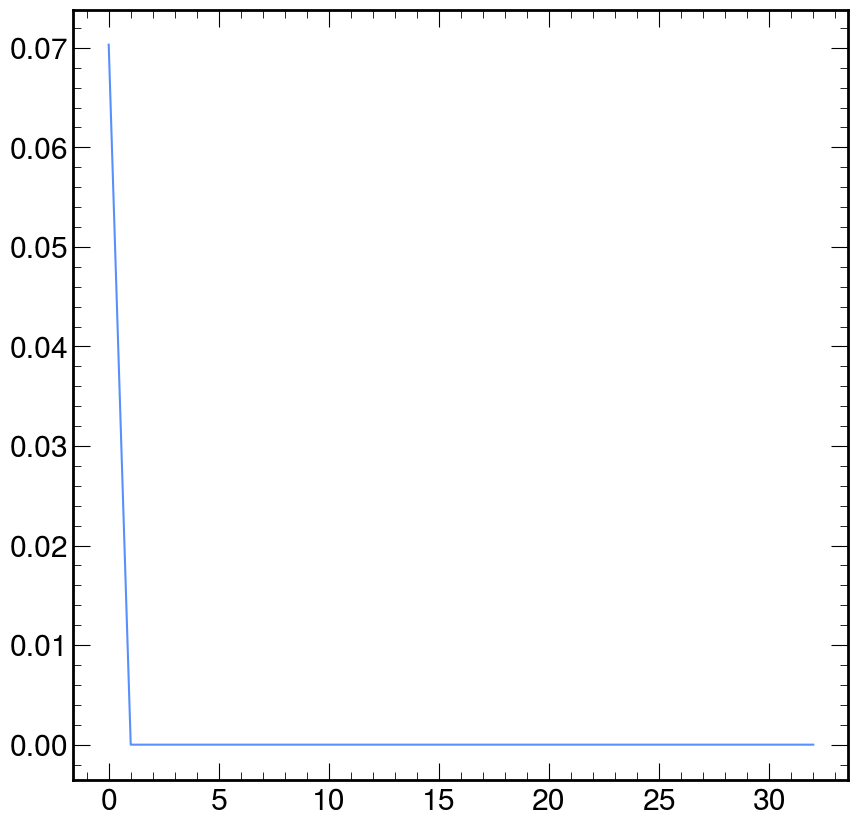

In [7]:
plt.plot(layer.b_splines(x)[5,0,:].cpu().detach().numpy())

In [36]:
layer.scaled_spline_weight.shape

torch.Size([4, 16, 33])

In [8]:
assert x.size(-1) == layer.in_features
original_shape = x.shape
x = x.view(-1, layer.in_features)

base_output = F.linear(layer.base_activation(x), layer.base_weight)
spline_output = F.linear(
    layer.b_splines(x).view(x.size(0), -1),
    layer.scaled_spline_weight.view(layer.out_features, -1),
)
# output = base_output + spline_output

# output = output.view(*original_shape[:-1], self.out_features)

In [7]:
array = np.linspace(grid_range[0], grid_range[1], 256)
stacked_array = np.hstack([[array]*16]).T
x=torch.from_numpy(stacked_array).float().to(device)

In [8]:
layer.base_activation(x).shape

torch.Size([256, 16])

In [11]:
layer.base_weight.shape

torch.Size([4, 16])

In [10]:
layer.b_splines(x).shape

torch.Size([256, 16, 33])

In [14]:
base_output_test = layer.base_activation(x)[:, 0]*layer.base_weight[0,0]
spline_output_test = F.linear(layer.b_splines(x)[:, 0, :], layer.scaled_spline_weight[0, 0, :])

In [11]:
layer.scaled_spline_weight.shape

torch.Size([4, 16, 33])

In [25]:
spline_output_test.shape

torch.Size([240])

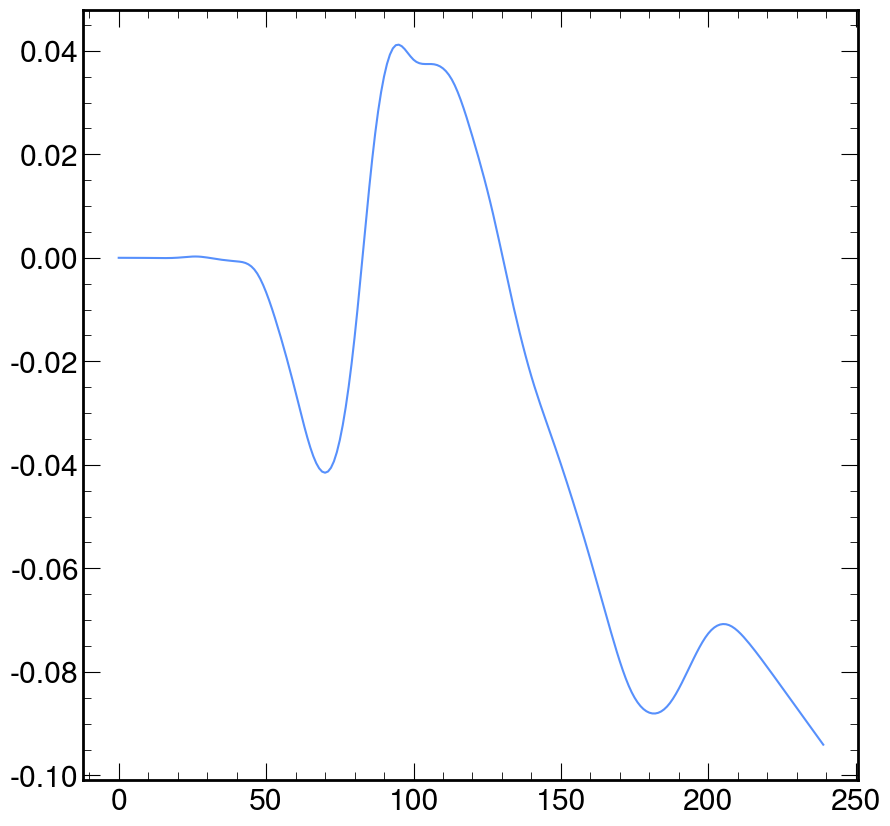

In [15]:
plt.plot(spline_output_test.cpu().detach().numpy() +base_output_test.cpu().detach().numpy()) 

In [18]:
layer.b_splines(x).shape

torch.Size([1, 16, 33])

In [19]:
layer.scaled_spline_weight.shape

torch.Size([4, 16, 33])

In [14]:
layer.base_activation(x).shape

torch.Size([240, 16])

In [13]:
layer.base_weight.shape

torch.Size([4, 16])

In [12]:
base_output.shape

torch.Size([240, 4])

In [8]:
spline_output.shape

torch.Size([240, 4])

In [10]:
layer.b_splines(x).shape

torch.Size([240, 16, 33])

In [11]:
layer.scaled_spline_weight.shape

torch.Size([4, 16, 33])

In [39]:
base_output.shape

torch.Size([240, 4])

In [25]:
x.shape

torch.Size([240, 16])

In [ ]:
#For each layer
#For each activation function
#Define a look up table over the grid points


In [15]:
y = model.layers[0](X)

In [20]:
y.shape

torch.Size([240, 4])

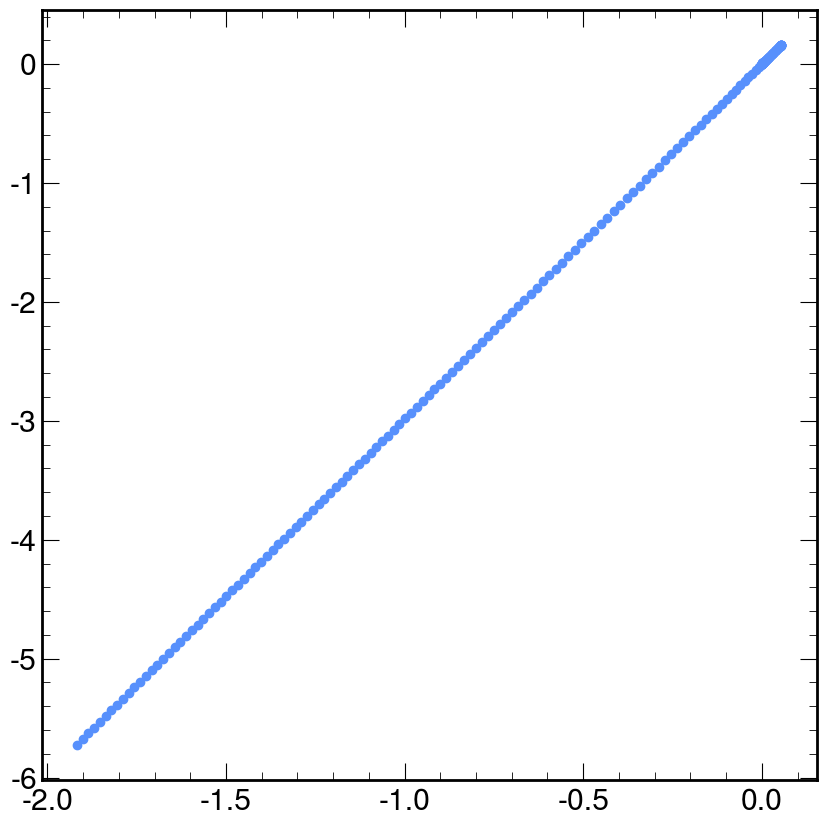

In [19]:

plt.plot(y.cpu().detach().numpy()[:,3], y.cpu().detach().numpy()[:,1], 'o')

In [10]:
X_train=torch.from_numpy(np.load('data/X_train_val.npy')).float().to(device)

In [11]:
y = model.layers[0](X)

In [17]:
plt.plot(y.cpu().detach().numpy()[:,4], y.cpu().detach().numpy()[:,1], 'o')

IndexError: index 4 is out of bounds for axis 1 with size 4

In [33]:
y1 = model.layers[1](torch.from_numpy(y).float().to(device)).detach().cpu().numpy()

(array([2.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 5.0000e+00, 5.0000e+00, 8.0000e+00, 1.4000e+01,
        2.4000e+01, 2.3000e+01, 4.9000e+01, 7.9000e+01, 1.0900e+02,
        1.5400e+02, 2.4700e+02, 2.8100e+02, 3.8400e+02, 5.3800e+02,
        6.9300e+02, 9.3200e+02, 1.1920e+03, 1.5970e+03, 2.0700e+03,
        2.6860e+03, 3.5710e+03, 4.5970e+03, 6.0990e+03, 7.1670e+03,
        8.4630e+03, 9.1330e+03, 1.0008e+04, 1.0561e+04, 1.1023e+04,
        1.1798e+04, 1.2486e+04, 1.3221e+04, 1.4104e+04, 1.5002e+04,
        1.6056e+04, 1.7657e+04, 1.8974e+04, 2.2000e+04, 2.6639e+04,
        3.6245e+04, 9.5143e+04, 9.7917e+04, 3.4917e+04, 2.1636e+04,
        1.7342e+04, 1.4904e+04, 1.3087e+04, 1.1213e+04, 9.5400e+03,
        8.1080e+03, 6.7160e+03, 5.7000e+03, 4.9530e+03, 4.3400e+03,
        3.9130e+03, 3.4810e+03, 3.0340e+03, 2.7920e+03, 2.4700e+03,
        2.2310e+03, 1.9350e+03, 1.8330e+03, 1.5820e+03, 1.3940e+03,
        1.2330e+03, 1.1150e+03, 8.8700e+02, 8.06

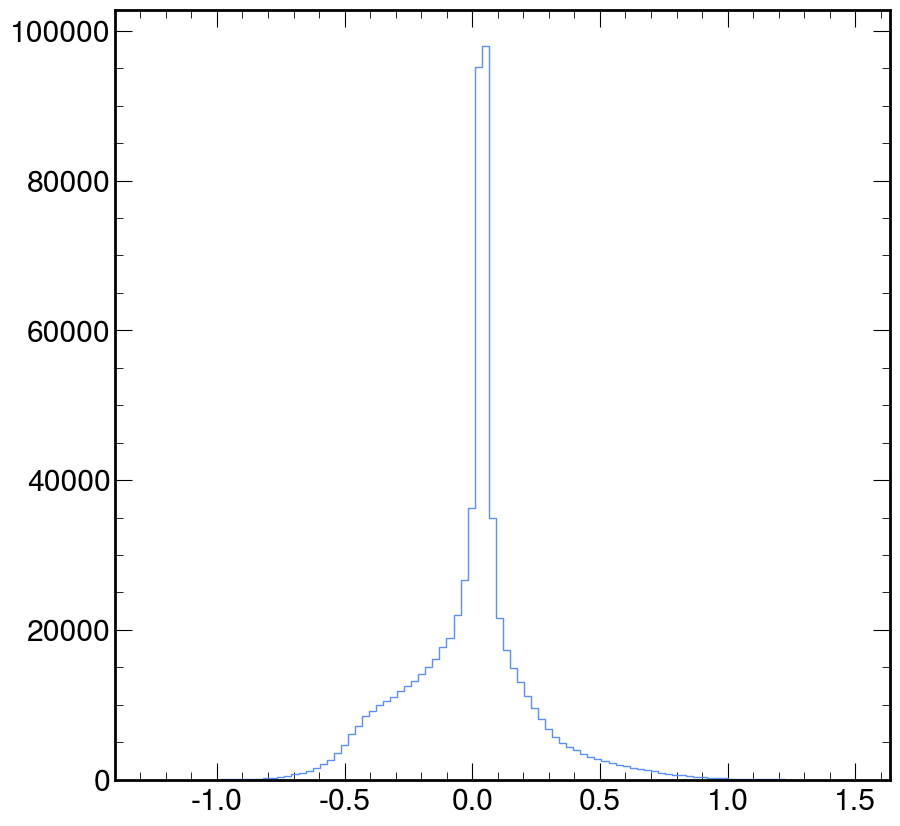

In [28]:
plt.hist(y[:,3], bins=100, histtype='step', label='0')

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        8.0000e+00, 3.0000e+00, 8.0000e+00, 4.0000e+00, 1.8000e+01,
        2.0000e+01, 2.8000e+01, 3.4000e+01, 4.1000e+01, 3.5000e+01,
        5.5000e+01, 5.9000e+01, 6.5000e+01, 8.6000e+01, 9.6000e+01,
        1.1700e+02, 1.3000e+02, 1.5000e+02, 2.0100e+02, 2.1200e+02,
        2.1500e+02, 2.7700e+02, 3.2600e+02, 3.5300e+02, 3.7300e+02,
        4.4700e+02, 5.0800e+02, 5.5700e+02, 6.4500e+02, 6.6000e+02,
        7.3800e+02, 8.0000e+02, 8.7400e+02, 9.6600e+02, 1.0640e+03,
        1.1270e+03, 1.2770e+03, 1.2650e+03, 1.4510e+03, 1.5720e+03,
        1.6660e+03, 1.7570e+03, 1.9600e+03, 2.0240e+03, 2.1160e+03,
        2.2730e+03, 2.4670e+03, 2.6730e+03, 2.7730e+03, 2.9230e+03,
        3.1910e+03, 3.4210e+03, 3.6890e+03, 4.0440e+03, 4.3480e+03,
        4.6700e+03, 5.0560e+03, 5.6100e+03, 5.9910e+03, 6.7880e+03,
        7.4740e+03, 8.3570e+03, 9.5770e+03, 1.06

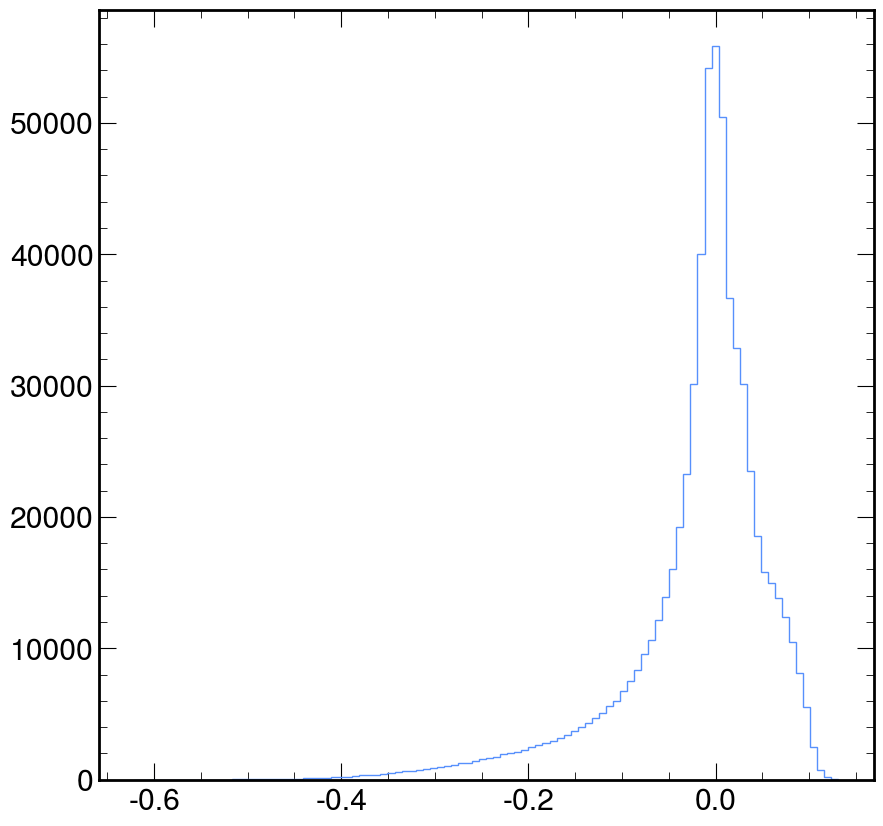

In [36]:
plt.hist(y1[:,0], bins=100, histtype='step', label='0')

In [8]:
model.layers[1].grid

tensor([[-1.8000, -1.4000, -1.0000, -0.6000, -0.2000,  0.2000,  0.6000,  1.0000,
          1.4000,  1.8000],
        [-1.8000, -1.4000, -1.0000, -0.6000, -0.2000,  0.2000,  0.6000,  1.0000,
          1.4000,  1.8000],
        [-1.8000, -1.4000, -1.0000, -0.6000, -0.2000,  0.2000,  0.6000,  1.0000,
          1.4000,  1.8000],
        [-1.8000, -1.4000, -1.0000, -0.6000, -0.2000,  0.2000,  0.6000,  1.0000,
          1.4000,  1.8000]])

In [33]:
dir(model.layers[0])

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [4]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se